<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Urinary essential elements of young children with autism spectrum disorder and their mothers

- [Mendeley Reference](https://data.mendeley.com/datasets/79fk29dvk6/1)
- [Science Direct Reference](https://www.sciencedirect.com/science/article/abs/pii/S1750946720300088?via%3Dihub)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="PANR_toc"></a>

* [Table of Contents](#PANR_toc)
    * [1. Abstract](#PANR_page_1)
    * [2. Imported Libraries](#PANR_page_2)
    * [3. Import the Dataset](#PANR_page_3)
    * [4. Setting Notebook Options](#PANR_page_4)
    * [5. Looking at the Data](#PANR_page_5)
    * [6. Checking the Column Names](#PANR_page_6)
    * [7. Cleaning the Column Names](#PANR_page_7)
    * [8. Creating a new Cleaned Dataset](#PANR_page_8)
    * [9. Counting Columns](#PANR_page_9)
    * [10. Get Info about the Dataset](#PANR_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#PANR_page_11)
    * [12. Counting Rows and Removing any NANs](#PANR_page_12)
    * [13. Correlation Analysis](#PANR_page_13)
    * [14. Boxplots of numerical variables grouped by Status](#PANR_page_14)
    * [15. Boxplots of numerical variables grouped by Type](#PANR_page_15)
    * [16. 16. Combined Boxplots of numerical variables grouped by Status and Type](#PANR_page_16)
    * [17. Histograms of Aluminum, Arsenic, and Lead Levels](#PANR_page_17)
    * [18. Scatterplot of Aluminum vs. Arsenic](#PANR_page_18)
    * [19. Scatterplot of Mercury vs. Lead](#PANR_page_19)
    * [20. Scatterplot of Calcium vs. Magnesium](#PANR_page_20)
    * [21. Principal Component Analysis (PCA)](#PANR_page_21)
    * [22. Conduct feature selection after PCA](#PANR_page_22)
    * [23. Group Comparison using MANOVA after PCA](#PANR_page_23)
    * [24. Group Comparison using ttest after PCA](#PANR_page_24)
    * [25. Group Comparison using ANOVA after PCA](#PANR_page_25)
    * [26. Group Comparison using ANOVA for Aluminum, Lead, Arsenic](#PANR_page_26)
    * [27. Fisher's Discriminant Analysis and Support Vector Machines (SVM)](#PANR_page_27)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 1. Abstract <a class="anchor" id="PANR_page_1"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Background
Even though the cause of autism spectrum disorders (ASD) remains unknown, the current understanding points towards complex interactions between environmental and genetic factors. One important environmental factor to consider is intake of toxic and essential elements, and their role in metabolism. Essential elements have received considerably less attention in the literature than the presence of toxins in urine.

### Method
The purpose of this investigation is to comprehensively assess the association between urinary element compositions of 28 mothers who had young children with ASD and 29 mothers who had young typically developing (TD) children, and in a subset of their children (21 with ASD and 26 TD).

### Results
The results show that there are significant differences between the ASD and TD children cohorts’ concentrations for four specific elements (sulfur, phosphorous, molybdenum, and tin). Utilizing multivariate statistical techniques (Fisher’s discriminant analysis and support vector machines), it was possible to distinguish the ASD from the TD children groups with an 81 % accuracy after cross-validation utilizing the four significantly different elements. However, among the mother cohorts assessed, there were no significant differences between those that had children with ASD and those with TD children. There was a significant correlation of levels of phosphorus and sulfur in the children with ASD (r = 0.63, p = 3.0E-3) and in the TD children (r = 0.47, p = 0.02).

### Conclusions
Notable differences were observed between the elemental concentration in urine of children with ASD and their TD peers. Analyzing cellular pathways related to these elements are promising areas of future research.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 2. Imported Libraries<a class="anchor" id="PANR_page_2"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [80]:
# Here's a function in R that checks if the required packages are installed, 
# and installs them if they are not already installed.
# this function then loads the required packages

install_and_load_packages <- function() {
  required_packages <- c("mvnormtest", "car", "IDPmisc", "multcomp", "dplyr", "readxl", "corrplot", "repr", "tidyr", "ggplot2", "caret", "ggrepel", "klaR", "e1071", "ggfortify", "FactoMineR", "glmnet", "boot")
  missing_packages <- setdiff(required_packages, installed.packages()[, "Package"])
  
  if (length(missing_packages) > 0) {
    message(paste0("The following packages will be installed: ", paste(missing_packages, collapse = ", ")))
    install.packages(missing_packages)
  } else {
    message("All required packages are already installed.")
  }
  
  loaded_packages <- character(length = length(required_packages))
  for (i in seq_along(required_packages)) {
    if (!require(required_packages[i], character.only = TRUE)) {
      stop(paste0("Package '", required_packages[i], "' not found. Please install it first."))
    }
    loaded_packages[i] <- required_packages[i]
  }
  
  return(loaded_packages)
}

In [81]:
# To use this above function, simply call install_required_packages() in your Jupyter notebook. 
install_and_load_packages()

All required packages are already installed.

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


The following object is masked from ‘package:survival’:

    aml


The following object is masked from ‘package:car’:

    logit




[1] "mvnormtest" "car"        "IDPmisc"    "multcomp"   "dplyr"     
 [6] "readxl"     "corrplot"   "repr"       "tidyr"      "ggplot2"   
[11] "caret"      "ggrepel"    "klaR"       "e1071"      "ggfortify" 
[16] "FactoMineR" "glmnet"     "boot"

In [94]:
# use required library packages as needed
#library("conflicted")                  #solves for conflicted files https://conflicted.r-lib.org/
#library(mvnormtest)                   #test for multivariate normality
#library(car)                          #run the MANOVA test and other assumption testing
#library(IDPmisc)                      #remove missing data for Shapiro test
#library(multcomp)                     #conducting post hocs for ANCOVAs
#library(dplyr)                        #calculate means
#library(readxl)                       #import xl file
#library(corrplot)
#library(repr)
#library(tidyr)
#library(ggplot2) # PCA example
#library(caret)
#library(ggrepel)
#library(klaR)
#library(e1071)
#library(FactoMineR)# for PCA
#library(ggfortify)
#library("tidyverse")                    #used for cleaner summary statistics
#library("broom")                        #used for cleaner summary statisticsli

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 3. Import the Dataset <a class="anchor" id="PAN_page_3"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [4]:
#import data from Data folder
data <- read_excel("../Data/DATA.xlsx")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 4. Setting Notebook Options<a class="anchor" id="PANR_page_4"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [5]:
# set max columns and rows
options(repr.matrix.max.cols=1000)
options(max.print = 105) # set the maximum number of rows to 105
options(repr.matrix.max.rows=105)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 5. Looking at the Data<a class="anchor" id="PANR_page_5"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [6]:
data

'ID Number','Status','Type','Aluminum','Antimony','Arsenic','Barium','Beryllium','Bismuth','Cadmium','Cesium','Gadolinium','Lead','Mercury','Nickel','Palladium','Platinum','Tellurium','Thallium','Thorium','Tin','Tungsten','Uranium','Boron','Calcium','Chromium','Cobalt','Copper','Iron','Lithium','Magnesium','Manganese','Molybdenum','Phosphorus','Potassium','Selenium','Sodium','Strontium','Sulfur','Vanadium','Zinc','Creatinine'
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,'ASD','Child',7.000000000,2.000000e-01,1.100000e+01,2.100000e+00,0.0007071068,1.131371e-04,1.414214e-04,4.3,9.899495e-05,2.000000e-01,0.0004242641,4.900000e+00,0.0008485281,1.131371e-04,0.0005656854,1.000000e-01,4.242641e-05,1.600000e+00,3.000000e-01,7.071068e-05,2.30,140.0,0.0004242641,0.0011313708,0.014,0.24000000,0.083,200,0.0007000000,0.130,1180,24,0.110,56,0.130,680,0.0002828427,0.660,175.0
3,'ASD','Child',19.000000000,2.000000e-01,8.100000e+00,8.000000e+00,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,1.000000e+00,0.0002121320,2.900000e+00,0.0004242641,5.656854e-05,0.0002828427,6.000000e-01,2.121320e-05,1.000000e+00,2.000000e-01,3.535534e-05,4.90,81.0,0.0002121320,0.0005656854,0.018,0.20000000,0.170,170,0.0050000000,0.180,360,120,0.094,290,0.170,860,0.0005000000,0.480,76.0
5,'ASD','Child',9.200000000,5.656854e-05,5.900000e+00,4.700000e+00,0.0003535534,2.000000e-01,7.071068e-05,11.0,4.949747e-05,5.000000e-01,0.0002121320,9.400000e+00,0.0004242641,5.656854e-05,0.0002828427,3.000000e-01,2.121320e-05,8.400000e+00,6.000000e-01,3.535534e-05,2.90,300.0,0.0006000000,0.0030000000,0.021,0.60000000,0.170,310,0.0040000000,0.170,1860,120,0.110,240,0.370,1050,0.0006000000,0.750,58.6
6,'ASD','Child',8.400000000,5.656854e-05,1.400000e+01,3.000000e+00,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,9.000000e-01,0.0002121320,1.500000e+01,0.0004242641,5.656854e-05,0.0002828427,4.000000e-01,2.121320e-05,1.400000e+00,3.000000e-01,3.535534e-05,8.60,200.0,0.0010000000,0.0005656854,0.024,0.43000000,0.061,390,0.0050000000,0.043,150,120,0.069,190,0.330,630,0.0004000000,0.240,54.3
8,'ASD','Child',5.600000000,2.828427e-05,1.100000e+01,3.800000e+00,0.0001767767,2.828427e-05,3.535534e-05,4.5,2.474874e-05,4.000000e-01,1.0000000000,2.500000e+00,0.0002121320,2.828427e-05,0.0001414214,4.000000e-01,1.060660e-05,6.000000e-01,3.000000e-01,1.767767e-05,1.30,62.0,0.0010000000,0.0002828427,0.022,0.03535534,0.220,170,0.0070000000,0.085,910,180,0.140,190,0.120,1290,0.0008000000,0.270,30.6
10,'ASD','Child',17.000000000,6.000000e-01,1.500000e+01,3.100000e+00,0.0003535534,5.656854e-05,7.071068e-05,10.0,4.949747e-05,5.000000e-01,0.0002121320,5.200000e+00,0.0004242641,5.656854e-05,0.0002828427,2.000000e-01,2.121320e-05,5.000000e-01,1.000000e-01,3.535534e-05,4.50,250.0,0.0010000000,0.0005656854,0.019,0.53000000,0.120,180,0.0020000000,0.110,1200,54,0.180,330,0.240,800,0.0005000000,1.100,70.6
12,'ASD','Child',9.500000000,5.656854e-05,1.200000e+02,4.200000e+00,0.0003535534,5.656854e-05,2.000000e-01,5.7,4.949747e-05,3.000000e-01,0.0002121320,6.700000e+00,0.0004242641,5.656854e-05,0.0002828427,3.000000e-01,2.121320e-05,2.000000e-01,3.000000e-01,3.535534e-05,3.80,340.0,0.0005000000,0.0010000000,0.018,0.63000000,0.083,230,0.0020000000,0.100,1320,45,0.130,120,0.290,1090,0.0001414214,0.660,82.1
17,'ASD','Child',6.800000000,2.000000e-01,3.500000e+01,4.000000e+00,0.0007071068,1.131371e-04,1.414214e-04,3.3,3.300000e+01,4.000000e-01,0.0004242641,9.700000e+00,0.0008485281,1.131371e-04,0.0005656854,9.000000e-02,4.242641e-05,4.000000e+00,1.200000e+00,7.071068e-05,2.20,170.0,0.0010000000,0.0009000000,0.018,0.30000000,0.140,120,0.0004000000,0.140,260,14,0.089,91,0.350,670,0.0009000000,0.690,172.0
19,'ASD','Child',24.000000000,2.000000e-01,1.400000e+01,2.600000e+00,0.0003535534,5.656854e-05,7.071

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 6. Checking the Column Names<a class="anchor" id="PANR_page_6"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [7]:
# check the column names - notice the extra ' single quote
names(data)

[1] "'ID Number'"  "'Status'"     "'Type'"       "'Aluminum'"   "'Antimony'"  
 [6] "'Arsenic'"    "'Barium'"     "'Beryllium'"  "'Bismuth'"    "'Cadmium'"   
[11] "'Cesium'"     "'Gadolinium'" "'Lead'"       "'Mercury'"    "'Nickel'"    
[16] "'Palladium'"  "'Platinum'"   "'Tellurium'"  "'Thallium'"   "'Thorium'"   
[21] "'Tin'"        "'Tungsten'"   "'Uranium'"    "'Boron'"      "'Calcium'"   
[26] "'Chromium'"   "'Cobalt'"     "'Copper'"     "'Iron'"       "'Lithium'"   
[31] "'Magnesium'"  "'Manganese'"  "'Molybdenum'" "'Phosphorus'" "'Potassium'" 
[36] "'Selenium'"   "'Sodium'"     "'Strontium'"  "'Sulfur'"     "'Vanadium'"  
[41] "'Zinc'"       "'Creatinine'"

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 7. Cleaning the Column Names<a class="anchor" id="PANR_page_7"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [8]:
# Remove the extra quotes from the column names
colnames(data) <- gsub("'", "", colnames(data))

# Print the cleaned data frame with the updated column names
names(data)

[1] "ID Number"  "Status"     "Type"       "Aluminum"   "Antimony"  
 [6] "Arsenic"    "Barium"     "Beryllium"  "Bismuth"    "Cadmium"   
[11] "Cesium"     "Gadolinium" "Lead"       "Mercury"    "Nickel"    
[16] "Palladium"  "Platinum"   "Tellurium"  "Thallium"   "Thorium"   
[21] "Tin"        "Tungsten"   "Uranium"    "Boron"      "Calcium"   
[26] "Chromium"   "Cobalt"     "Copper"     "Iron"       "Lithium"   
[31] "Magnesium"  "Manganese"  "Molybdenum" "Phosphorus" "Potassium" 
[36] "Selenium"   "Sodium"     "Strontium"  "Sulfur"     "Vanadium"  
[41] "Zinc"       "Creatinine"

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 8. Creating a new Cleaned Dataset<a class="anchor" id="PANR_page_8"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [9]:
# This code will save the data object to a CSV file named "clean_data.csv" in the "Data" folder,
# located one level above the current working directory. The row.names=FALSE argument ensures 
# that the row names (index) are not included in the output file, similar to index=False in 
# Python.

write.csv(data, "../Data/clean_data.csv", row.names=FALSE)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 9. Counting Columns<a class="anchor" id="PANR_page_9"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [10]:
# To count the number of columns in an R dataset, you can use the ncol() function 

num_columns <- ncol(data)
num_columns

[1] 42

In [11]:
# or use the dim() function
num_columns <- dim(data)[2]
num_columns

[1] 42

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 10. Get Info about the Dataset<a class="anchor" id="PANR_page_10"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [12]:
# you can use the str() function to get similar information about a dataset as you would get 
# from the info() method in Python. The str() function provides a compact, human-readable 
# description of the structure of an R object, such as a dataset. Notice that Status and 
# Type of "chr" and the rest of "num" correlation matrix can only work on numeric

str(data)

tibble [105 × 42] (S3: tbl_df/tbl/data.frame)
 $ ID Number : num [1:105] 1 3 5 6 8 10 12 17 19 20 ...
 $ Status    : chr [1:105] "'ASD'" "'ASD'" "'ASD'" "'ASD'" ...
 $ Type      : chr [1:105] "'Child'" "'Child'" "'Child'" "'Child'" ...
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 11. Get Descriptive Statistics about the Dataset<a class="anchor" id="PANR_page_11"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Descriptive statistics:
basic descriptive statistics such as mean, median, mode, standard deviation, variance, range, and percentiles can be computed for each element to summarize its distribution.

In [13]:
# In R, you can use the summary() function to calculate summary statistics for each 
# variable in a dataset, similar to the describe() function in Python. 

# Drop the first column since we don't need ID Number
dataset_filtered <- data %>% select(-c(1))

# Calculate summary statistics for each element
summary_statistics <- dataset_filtered %>% summary()

# Print the summary statistics
print(summary_statistics)

    Status              Type              Aluminum           Antimony        
 Length:105         Length:105         Min.   : 0.00141   Min.   :0.0000283  
 Class :character   Class :character   1st Qu.: 2.50000   1st Qu.:0.0000566  
    Arsenic              Barium            Beryllium        
 Min.   :  0.00106   Min.   : 0.000071   Min.   :0.0001768  
 1st Qu.:  5.00000   1st Qu.: 1.100000   1st Qu.:0.0003536  
    Bismuth             Cadmium              Cesium         Gadolinium      
 Min.   : 0.000028   Min.   :0.0000354   Min.   : 1.200   Min.   : 0.00002  
 1st Qu.: 0.000057   1st Qu.:0.0000707   1st Qu.: 3.000   1st Qu.: 0.00005  
      Lead              Mercury              Nickel           Palladium        
 Min.   :0.0000707   Min.   :0.0001061   Min.   :3.54e-04   Min.   :0.0002121  
 1st Qu.:0.2000000   1st Qu.:0.0002121   1st Qu.:2.10e+00   1st Qu.:0.0004243  
    Platinum           Tellurium            Thallium        
 Min.   :2.828e-05   Min.   :0.0001414   Min.   :0.

In [14]:
# Distribution of Status variable
table(data$Status)


'ASD'  'TD' 
   50    55 

In [15]:
# Distribution of Type variable
table(data$Type)


 'Child' 'Mother' 
      47       58 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 12. Counting Rows and Removing any NANs<a class="anchor" id="PANR_page_12"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [16]:
# This is a function called count_rows that takes a data frame or matrix as input. 
# It calculates the number of rows using the nrow() function and stores the result in the variable
# num_rows. Then, it prints the result with a description using the cat() function.

count_rows <- function(data) {
  num_rows <- nrow(data)
  cat("Number of rows:", num_rows, "\n")
}

count_rows(data)

Number of rows: 105 


In [17]:
# Assuming 'data' is a data frame with some NaN values
clean_data <- na.omit(data)

In [18]:
# we run our count rows function on the clean data and notice there weren't any NaNs
count_rows(clean_data)

Number of rows: 105 


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 13. Correlation Analysis<a class="anchor" id="PANR_page_13"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Correlation analysis: 
correlation analysis can be used to determine the strength and direction of the relationship between different elements. This can help identify the elements that are strongly related to each other and may have a common source.

In [19]:
str(data)

tibble [105 × 42] (S3: tbl_df/tbl/data.frame)
 $ ID Number : num [1:105] 1 3 5 6 8 10 12 17 19 20 ...
 $ Status    : chr [1:105] "'ASD'" "'ASD'" "'ASD'" "'ASD'" ...
 $ Type      : chr [1:105] "'Child'" "'Child'" "'Child'" "'Child'" ...
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 

In [20]:
# Notice we do not need and can't use the ID Number, Status or Type 
# use `data[ , 4:42]` with the range of columns that you want to include in the correlation 
# matrix. In this case, we included columns 4 to 42, which correspond to the elements in 
# the dataset. The code calculates the correlation matrix for the selected columns and 
# prints the result. 

corr_matrix <- cor(data[ , 4:42])
corr_matrix

,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
Aluminum,1.00000000,0.53229586,0.031023401,0.56118574,-0.31349531,-0.087200690,-0.18232064,0.453143365,-0.021330114,0.725450973,-0.177115135,0.295885031,-0.31349531,-0.31349531,-0.31349531,0.39452115,-0.31349531,0.320741707,0.21486379,0.291031162,0.60361252,0.271929639,0.18296826,-0.106710595,0.37869884,0.247919542,0.188301973,0.37305450,0.60413106,0.19998710,0.32070566,0.34263271,0.30372234,0.30259975,0.341868015,0.29226727,0.38446425,0.43795353,-0.32119881
Antimony,0.53229586,1.00000000,-0.010959669,0.48442691,-0.20975231,-0.084805146,-0.21831741,0.513796337,0.102337402,0.449559951,-0.161072080,0.214893790,-0.20975231,-0.20975231,-0.20975231,0.35066581,-0.20975231,0.238305257,0.22286789,0.110500915,0.49155516,0.161992985,0.15607347,-0.203784290,0.36678099,0.067553242,0.195353571,0.30242481,0.37649446,0.24970452,0.42034186,0.28034283,0.47268970,0.40566289,0.248953602,0.28816706,0.34551879,0.33590537,-0.20424923
Arsenic,0.03102340,-0.01095967,1.000000000,0.16106636,-0.13115725,0.198149540,0.03191274,0.128611828,0.125721698,0.128677341,0.206378567,0.260091977,-0.13115725,-0.13115725,-0.13115725,0.15422315,-0.13115725,0.074626351,0.15114054,0.007994440,0.21052918,0.305217110,0.06090234,0.009817084,0.23695309,0.316600715,0.189788862,0.15808973,0.09987361,0.23769308,0.07208094,0.05514923,0.23678525,0.11426679,0.305293131,0.19504574,0.06372606,0.16711420,-0.15985180
Barium,0.56118574,0.48442691,0.161066359,1.00000000,-0.38523878,-0.066116387,-0.27142479,0.588355515,0.049607132,0.700279300,-0.047585987,0.524873623,-0.38523878,-0.38523878,-0.38523878,0.41373123,-0.38523878,0.311581302,0.26453226,0.200960680,0.56606086,0.607971394,-0.03750986,-0.086024584,0.53984503,0.566208032,0.348844044,0.53656193,0.55936831,0.32234596,0.38812853,0.36485855,0.39244698,0.54039972,0.707208566,0.37820464,0.33402606,0.40700677,-0.39971066
Beryllium,-0.31349531,-0.20975231,-0.131157249,-0.38523878,1.00000000,-0.085160590,0.30365354,-0.477926858,0.147322026,-0.374315091,-0.089416020,-0.272355152,1.00000000,1.00000000,1.00000000,-0.42857094,1.00000000,-0.198651066,-0.12186173,-0.124036243,-0.40011856,-0.284207981,0.17956412,0.245150632,-0.46231953,-0.229203241,-0.356544651,-0.42558445,-0.41403686,-0.18431841,-0.30165449,-0.41675178,-0.44529691,-0.45673685,-0.380233478,-0.48620462,-0.11156699,-0.29689232,0.86501461
Bismuth,-0.08720069,-0.08480515,0.198149540,-0.06611639,-0.08516059,1.000000000,0.11126643,-0.068445744,-0.019243337,-0.028829267,0.404030359,-0.035272471,-0.08516059,-0.08516059,-0.08516059,0.06328871,-0.08516059,-0.091176785,-0.12015140,-0.044087099,-0.04936365,0.026305754,-0.07418382,-0.109473426,-0.06235462,0.019323988,0.004628092,-0.12306663,-0.06031103,-0.07991556,-0.10285680,-0.09159056,-0.08514280,-0.03787125,-0.006127565,-0.08531031,-0.10867193,-0.02117480,-0.08931061
Cadmium,-0.18232064,-0.21831741,0.031912744,-0.27142479,0.30365354,0.111266431,1.00000000,-0.250934430,-0.066168766,-0.250877166,0.285645158,-0.108824813,0.30365354,0.30365354,0.30365354,-0.17338335,0.30365354,-0.272819385,-0.15371152,-0.123585381,-0.22140198,-0.054788149,-0.03943362,0.269230720,-0.27325703,-0.043512505,-0.285935142,-0.29841566,-0.21719165,-0.23231087,-0.25454825,-0.29906224,-0.31136961,-0.24935974,-0.188337822,-0.30253957,-0.20652188,-0.15540561,0.33225759
Cesium,0.45314337,0.51379634,0.128611828,0.58835551,-0.47792686,-0.068445744,-0.25093443,1.000000000,-0.060729809,0.662180639,-0.008568788,0.512829270,-0.47792686,-0.47792686,-0.47792686,0.65661334,-0.47792686,0.352597172,0.27194797,0.060689730,0.75442531,0.347427838,0.04976218,-0.076757306,0.57001383,0.316971202,0.392595400,0.58672672,0.69123837,0.36431546,0.46638046,0.65163340,0.563

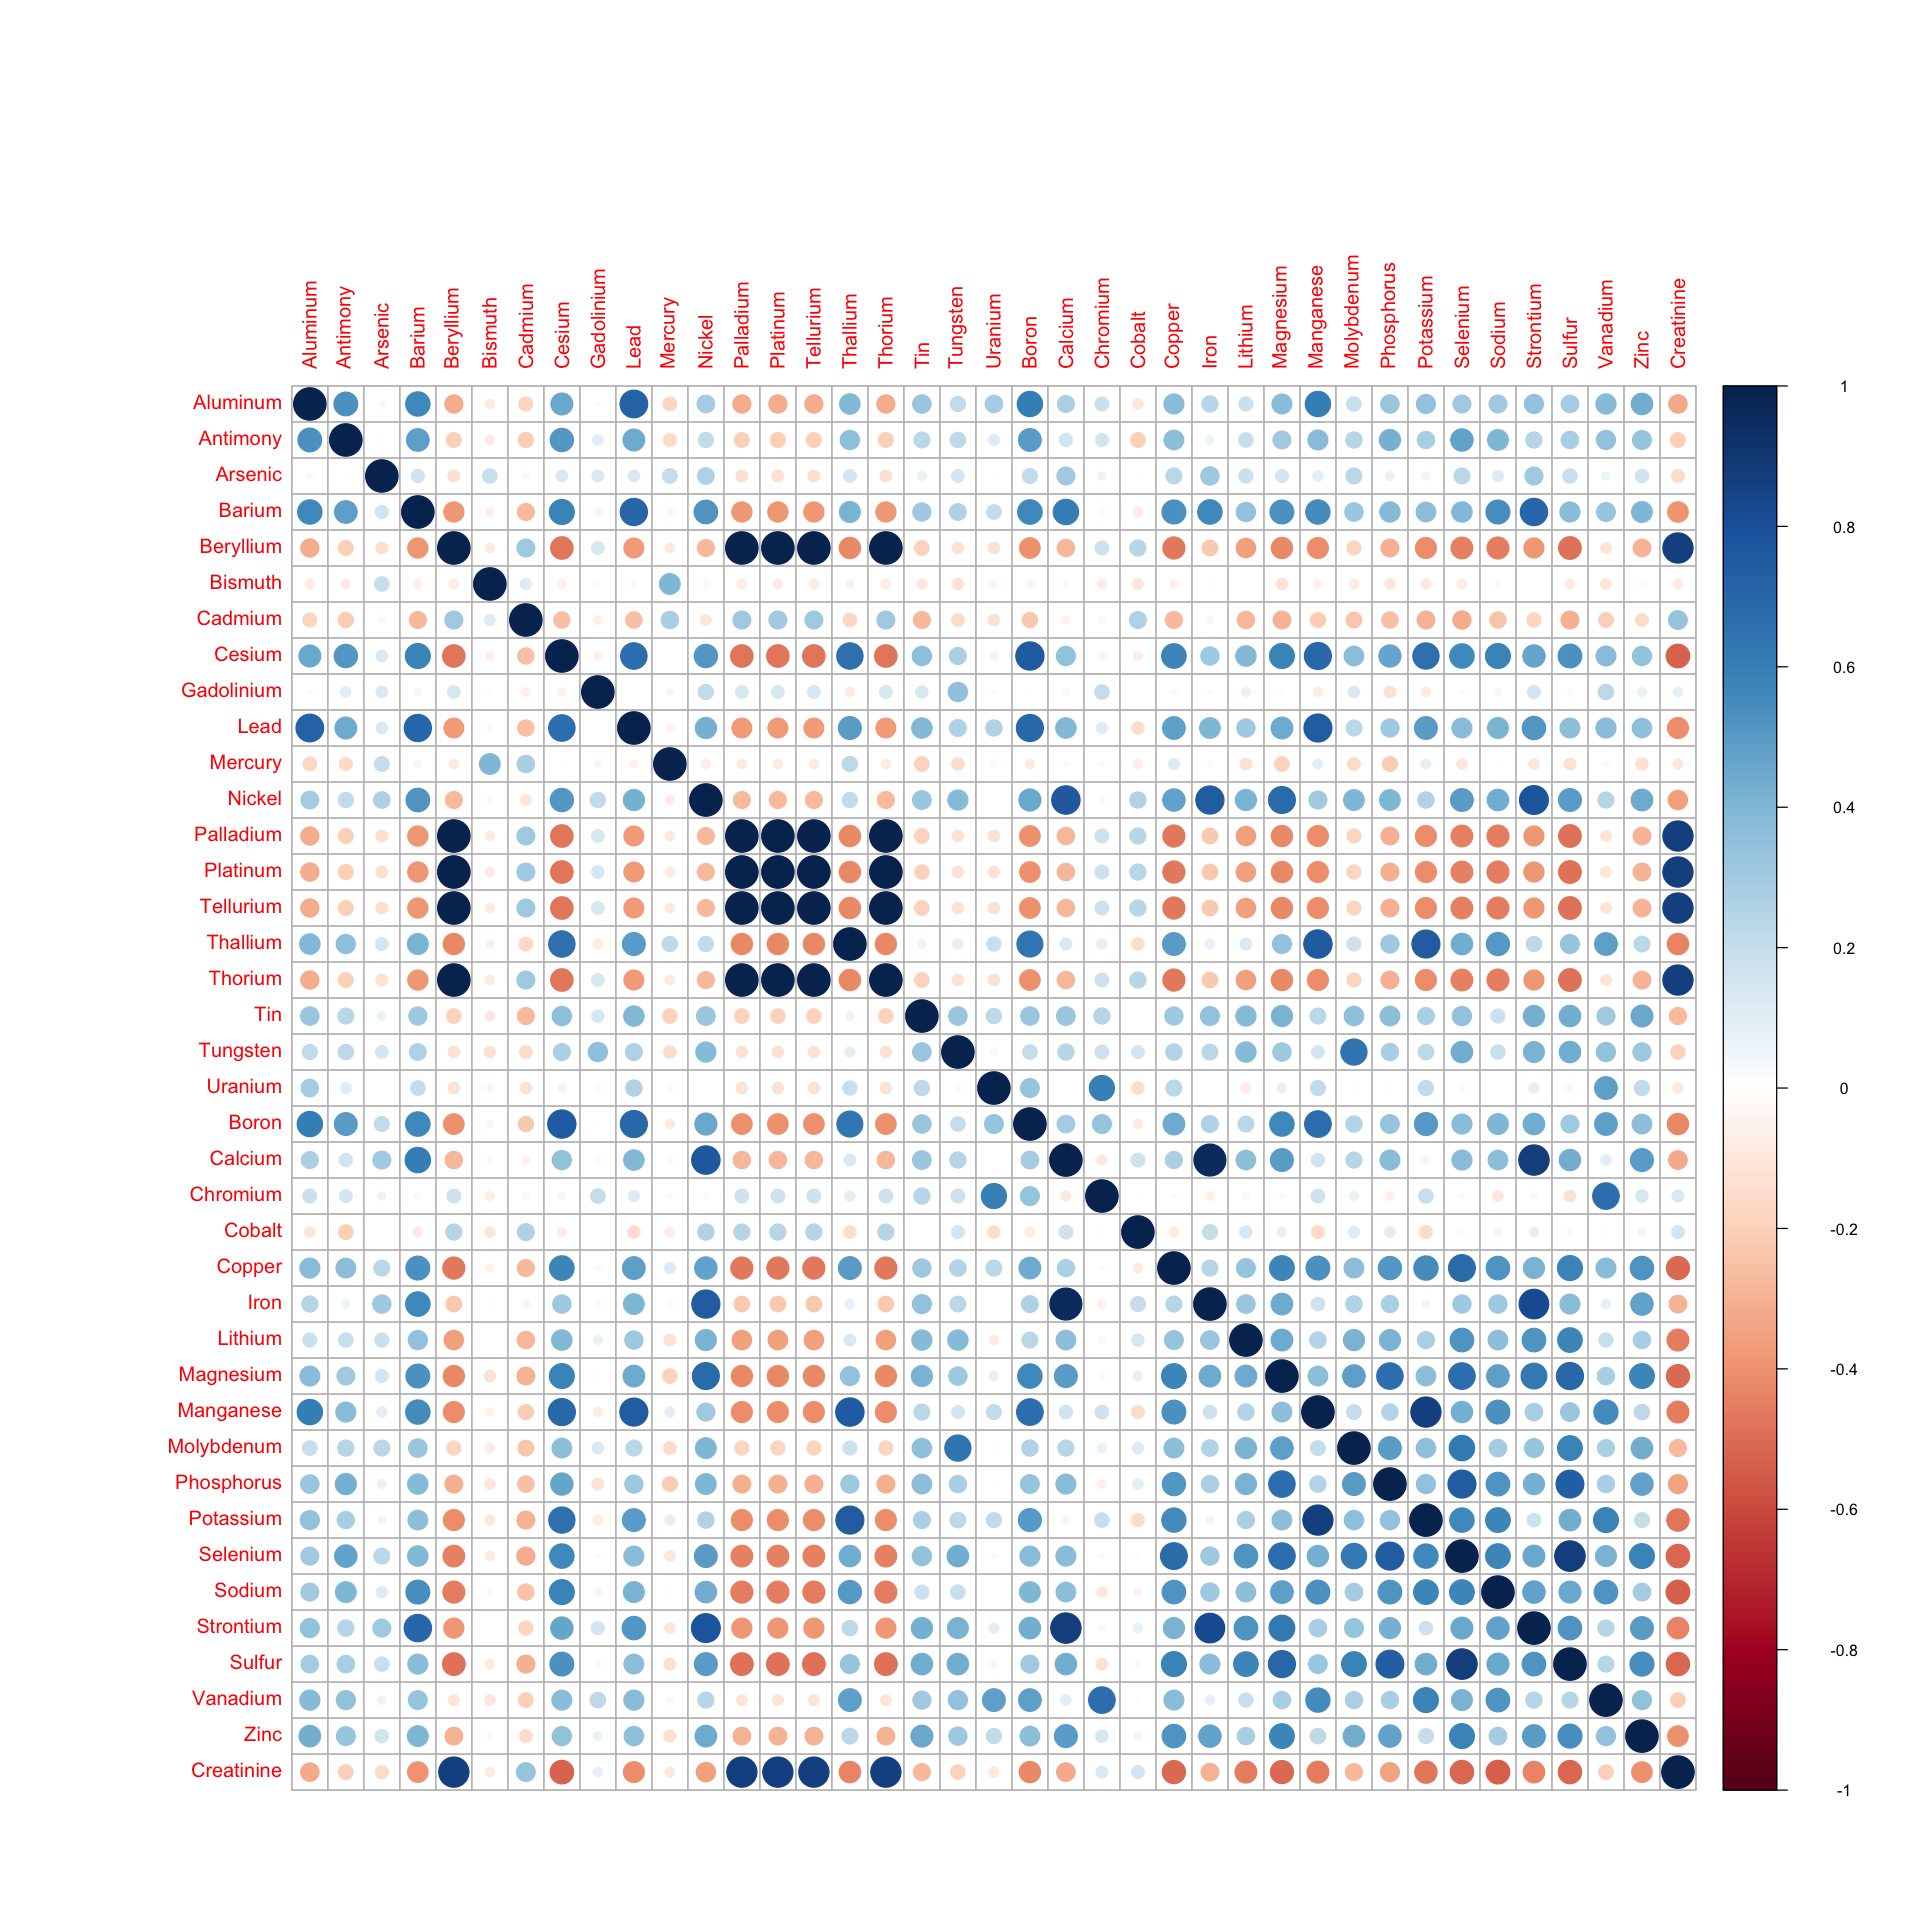

In [21]:
# In an R Jupyter Notebook, you can adjust the plot size by setting the plot size options within the repr package. 
# First, ensure that the repr package is installed and loaded. Then, set the plot size options before calling corrplot.

# Set the plot size options (width and height in inches)
options(repr.plot.width = 16, repr.plot.height = 16)

# Plot the correlation matrix
corrplot(corr_matrix, method = "circle")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 14. Boxplots of numerical variables grouped by Status<a class="anchor" id="PANR_page_14"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


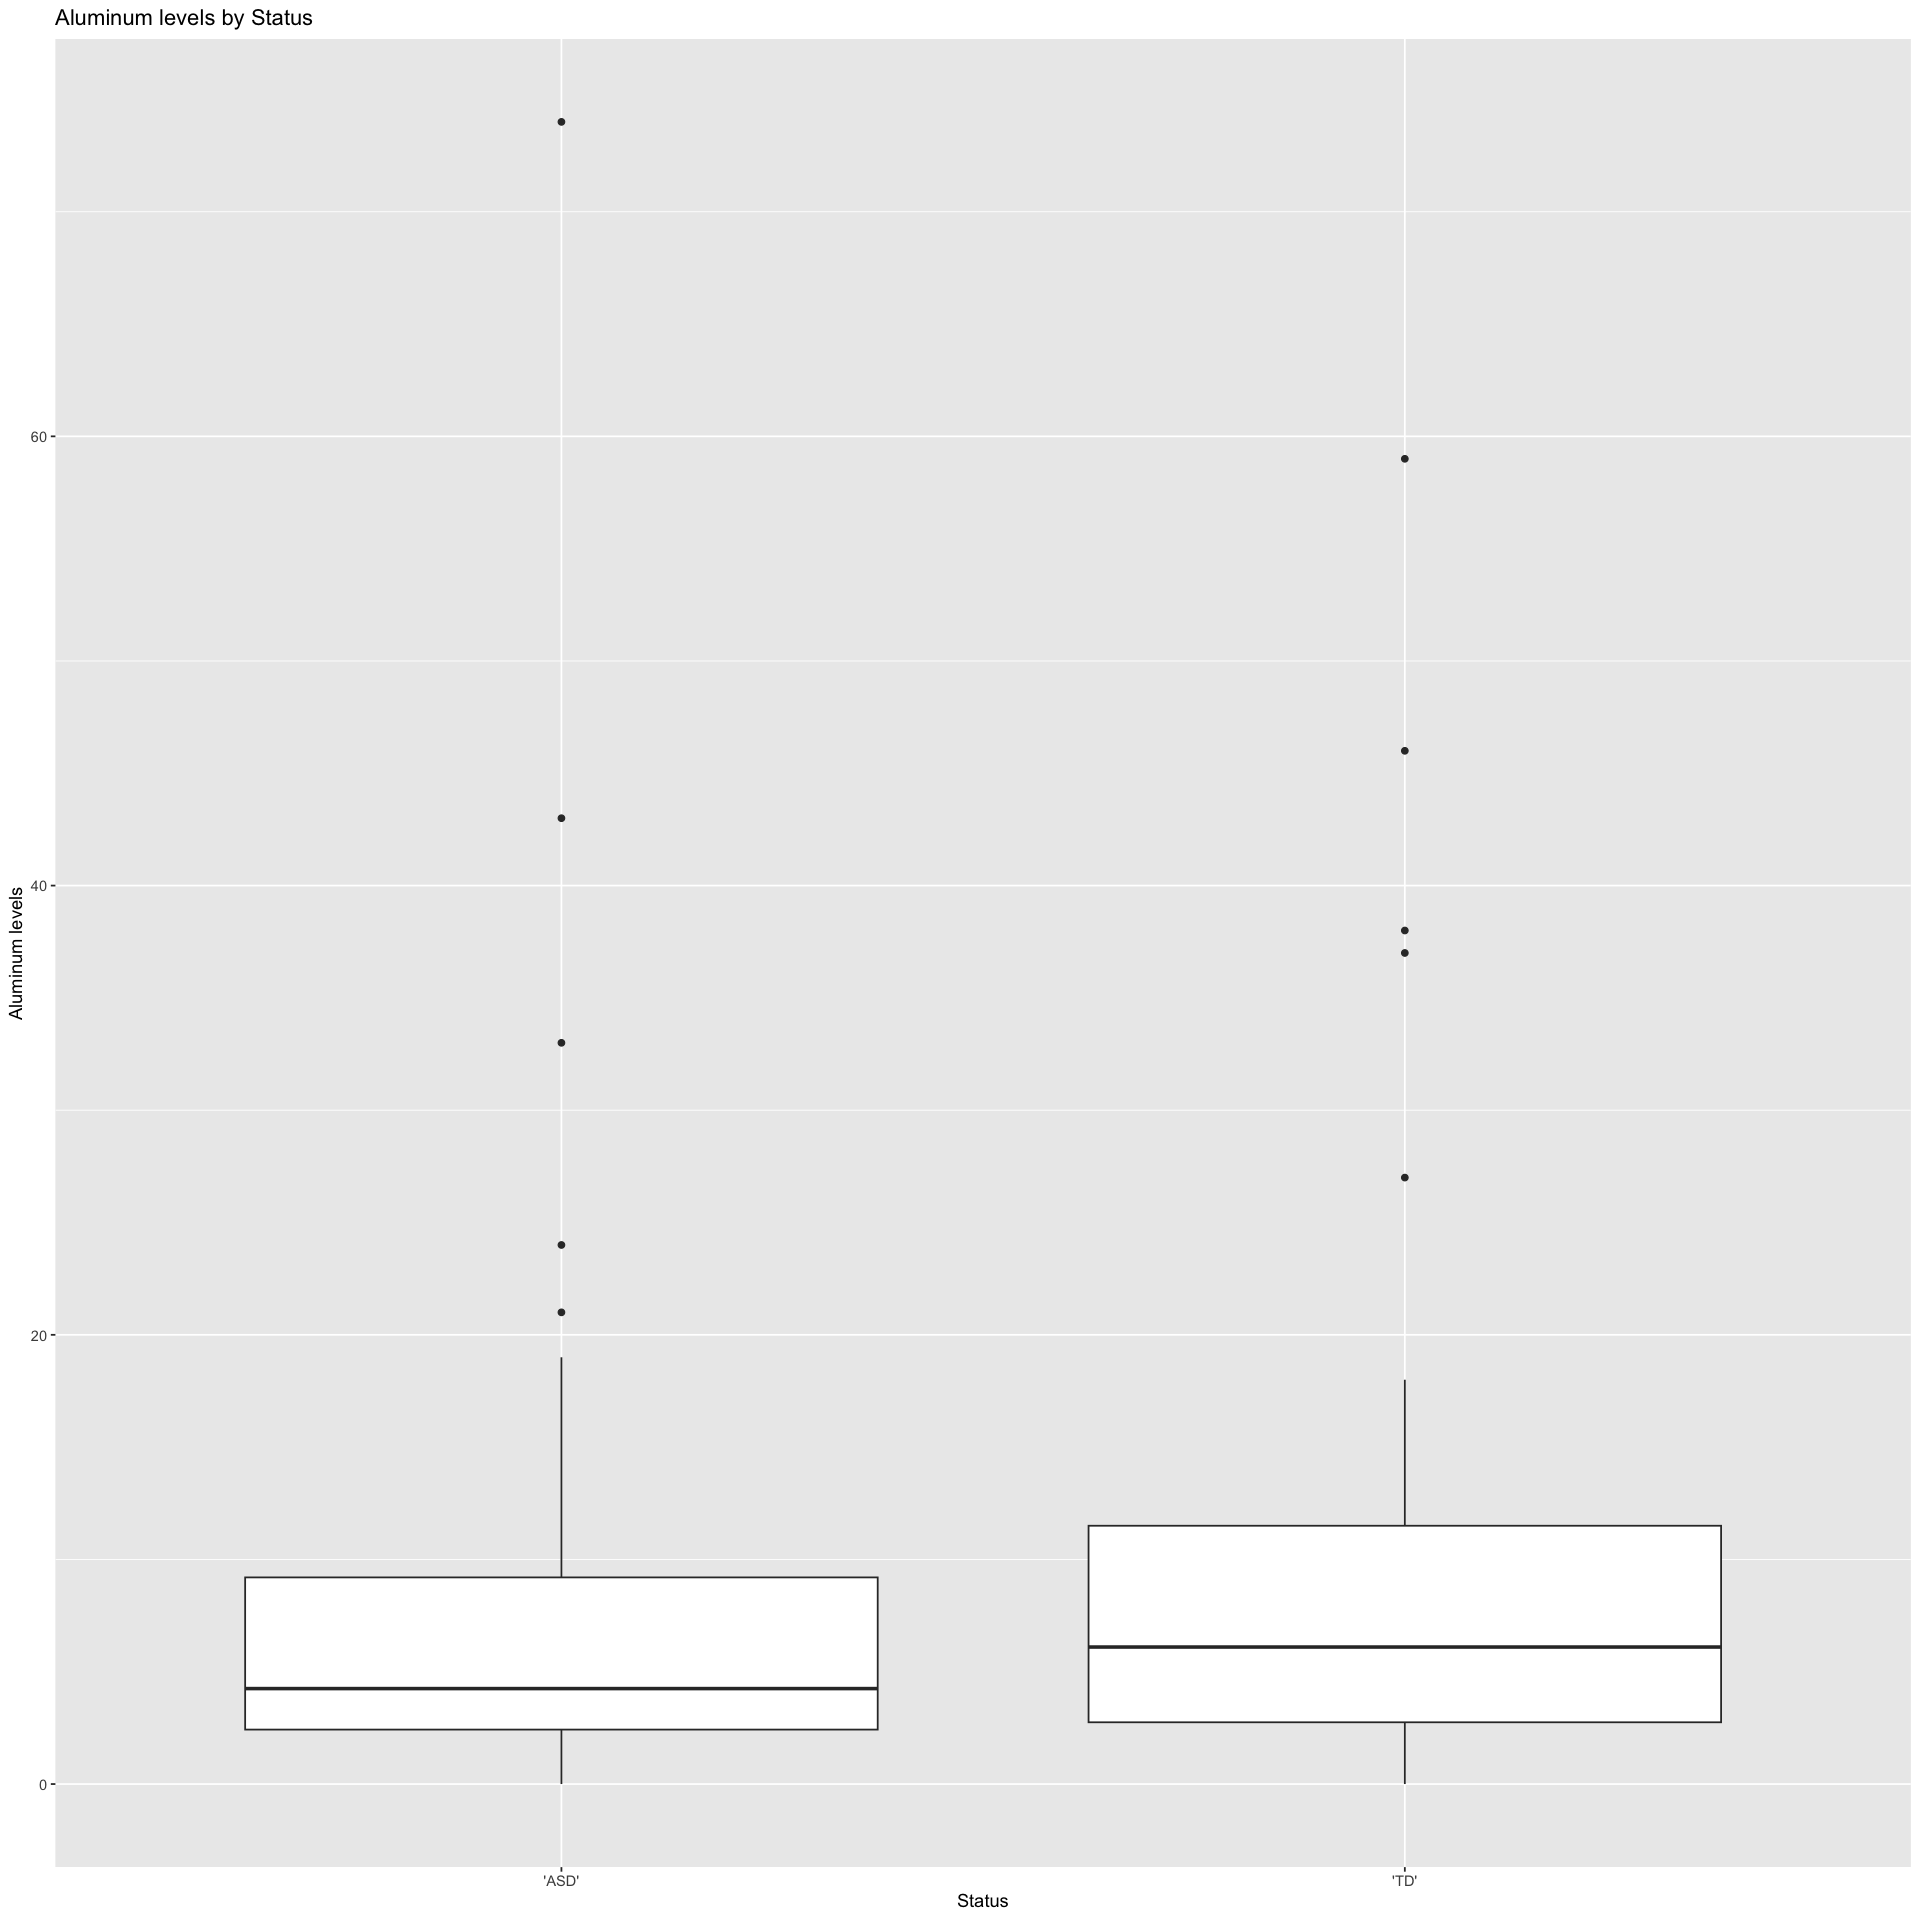

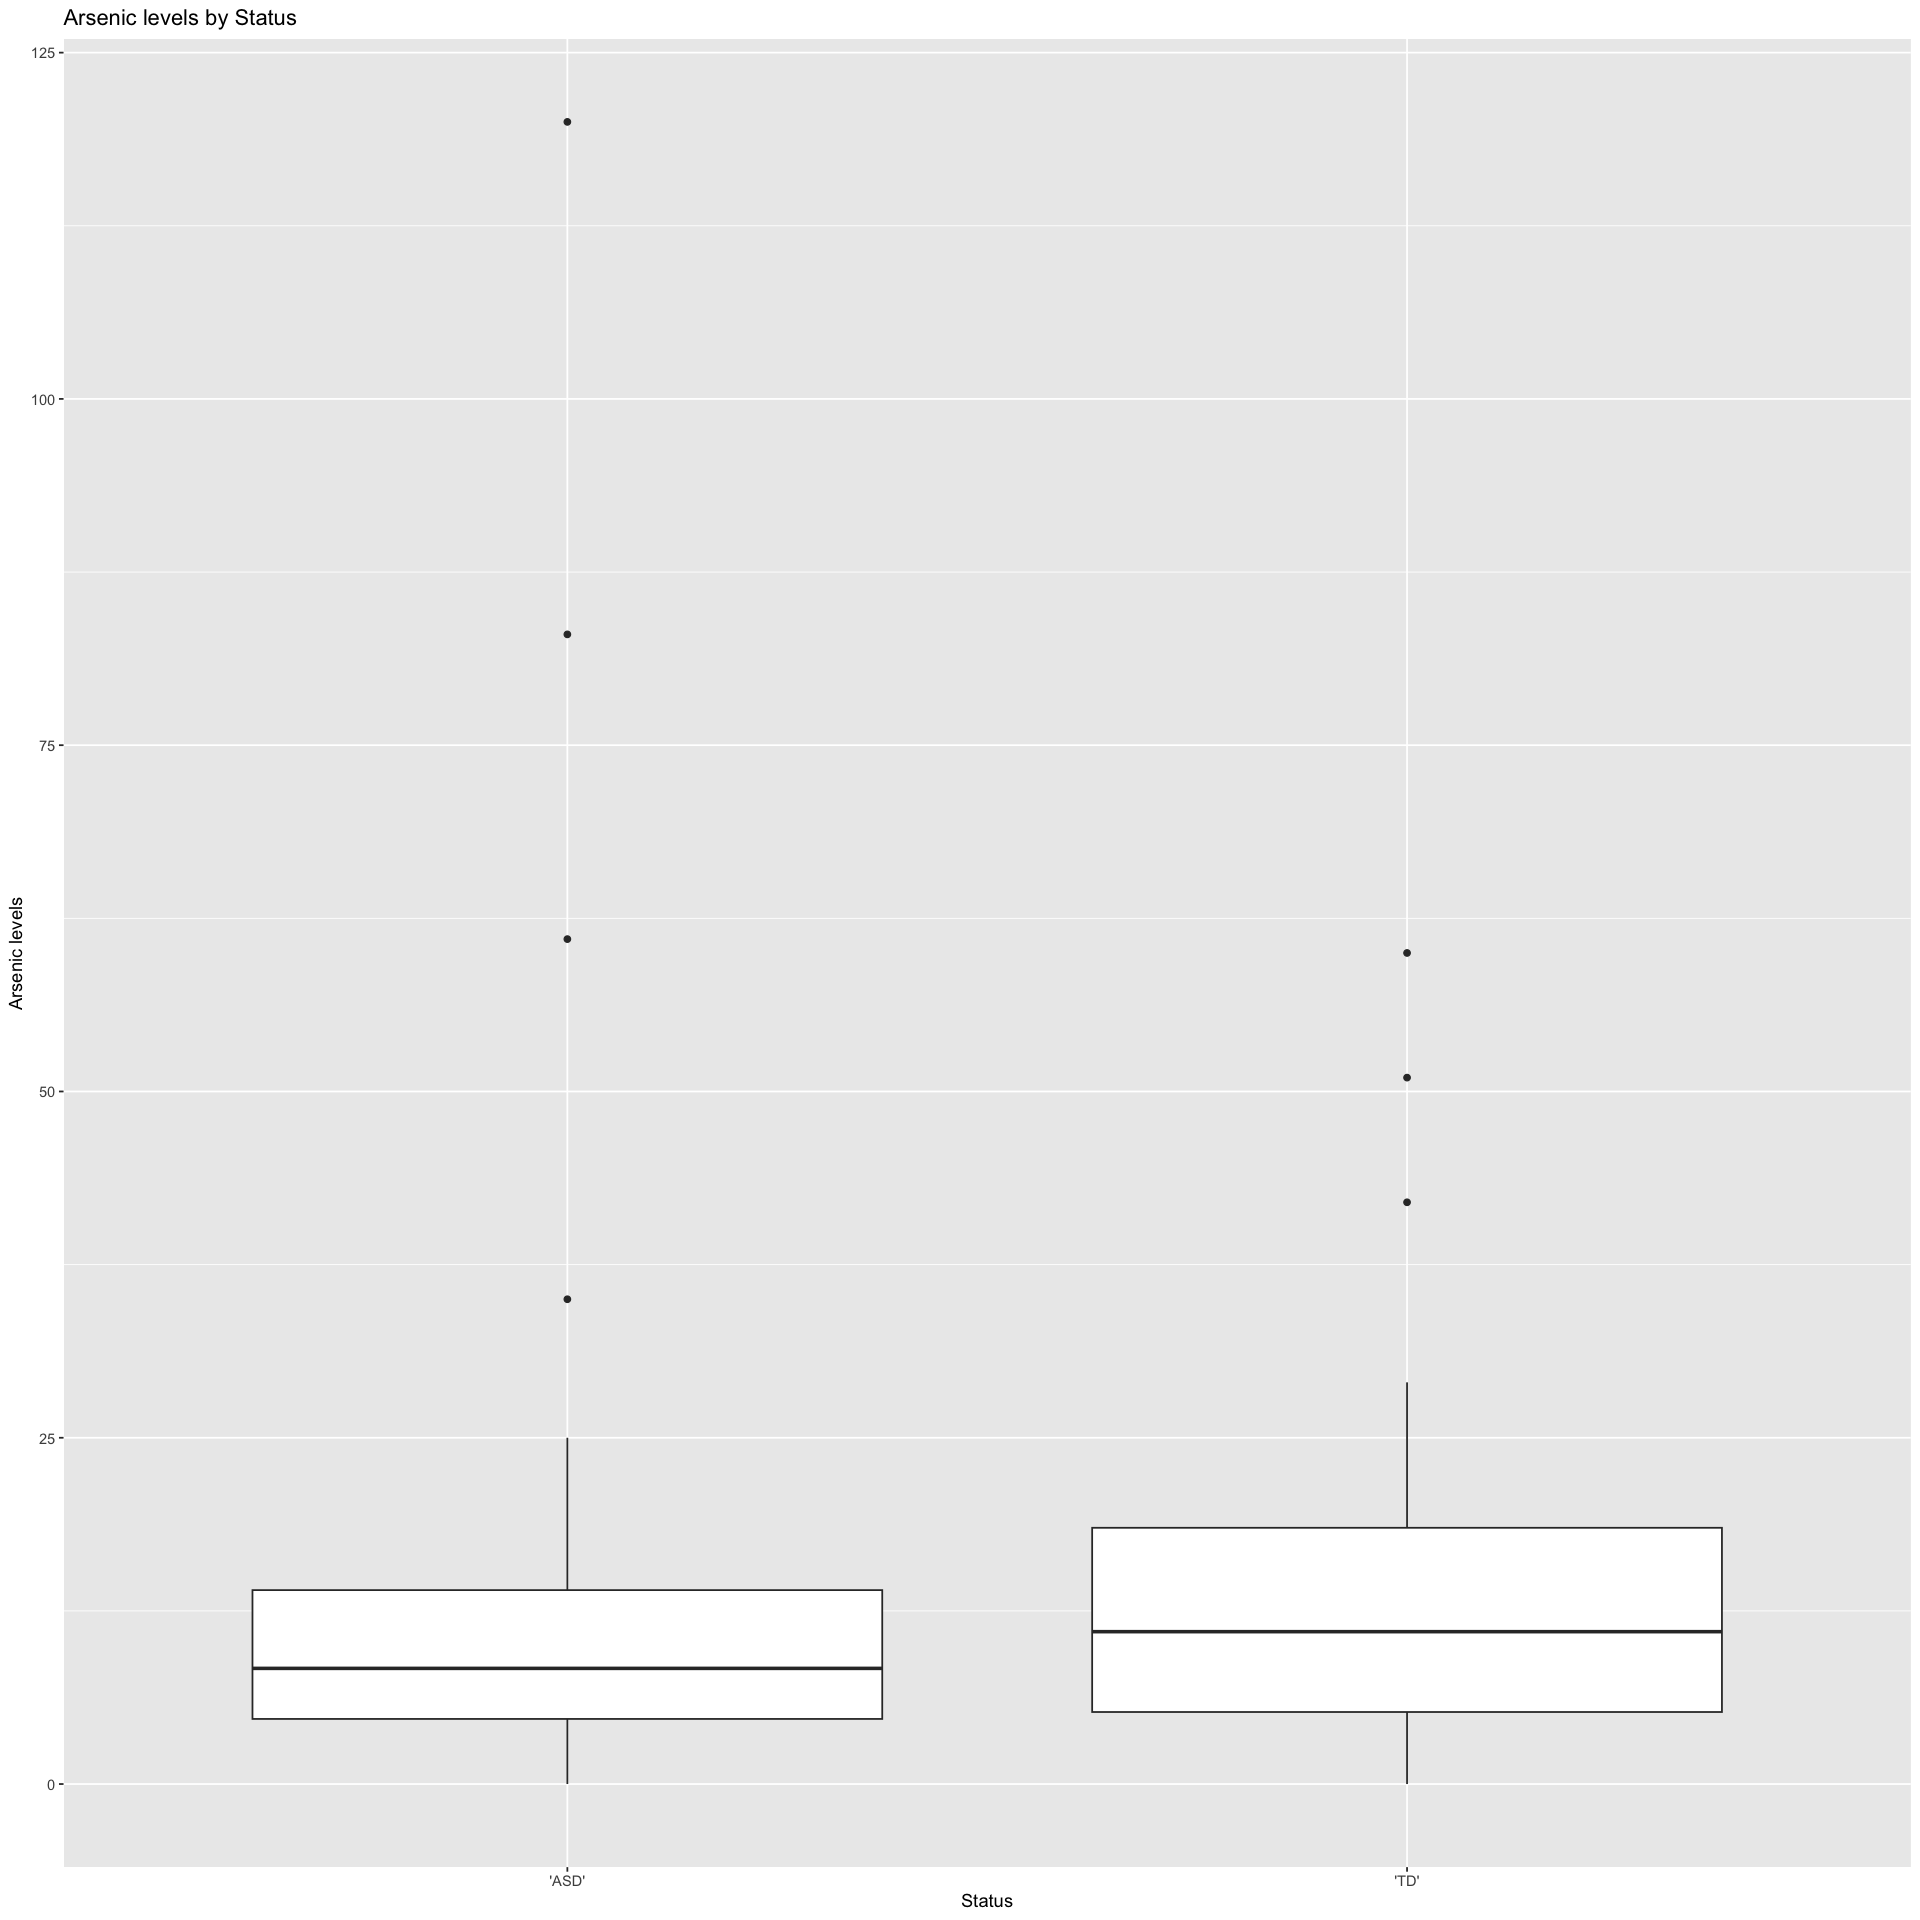

In [22]:
# Create boxplots of numerical variables grouped by Status
ggplot(data, aes(x = Status, y = Aluminum)) + 
  geom_boxplot() + 
  ggtitle("Aluminum levels by Status") +
  ylab("Aluminum levels") +
  xlab("Status")

ggplot(data, aes(x = Status, y = Arsenic)) + 
  geom_boxplot() + 
  ggtitle("Arsenic levels by Status") +
  ylab("Arsenic levels") +
  xlab("Status")


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 15. Boxplots of numerical variables grouped by Type<a class="anchor" id="PANR_page_15"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


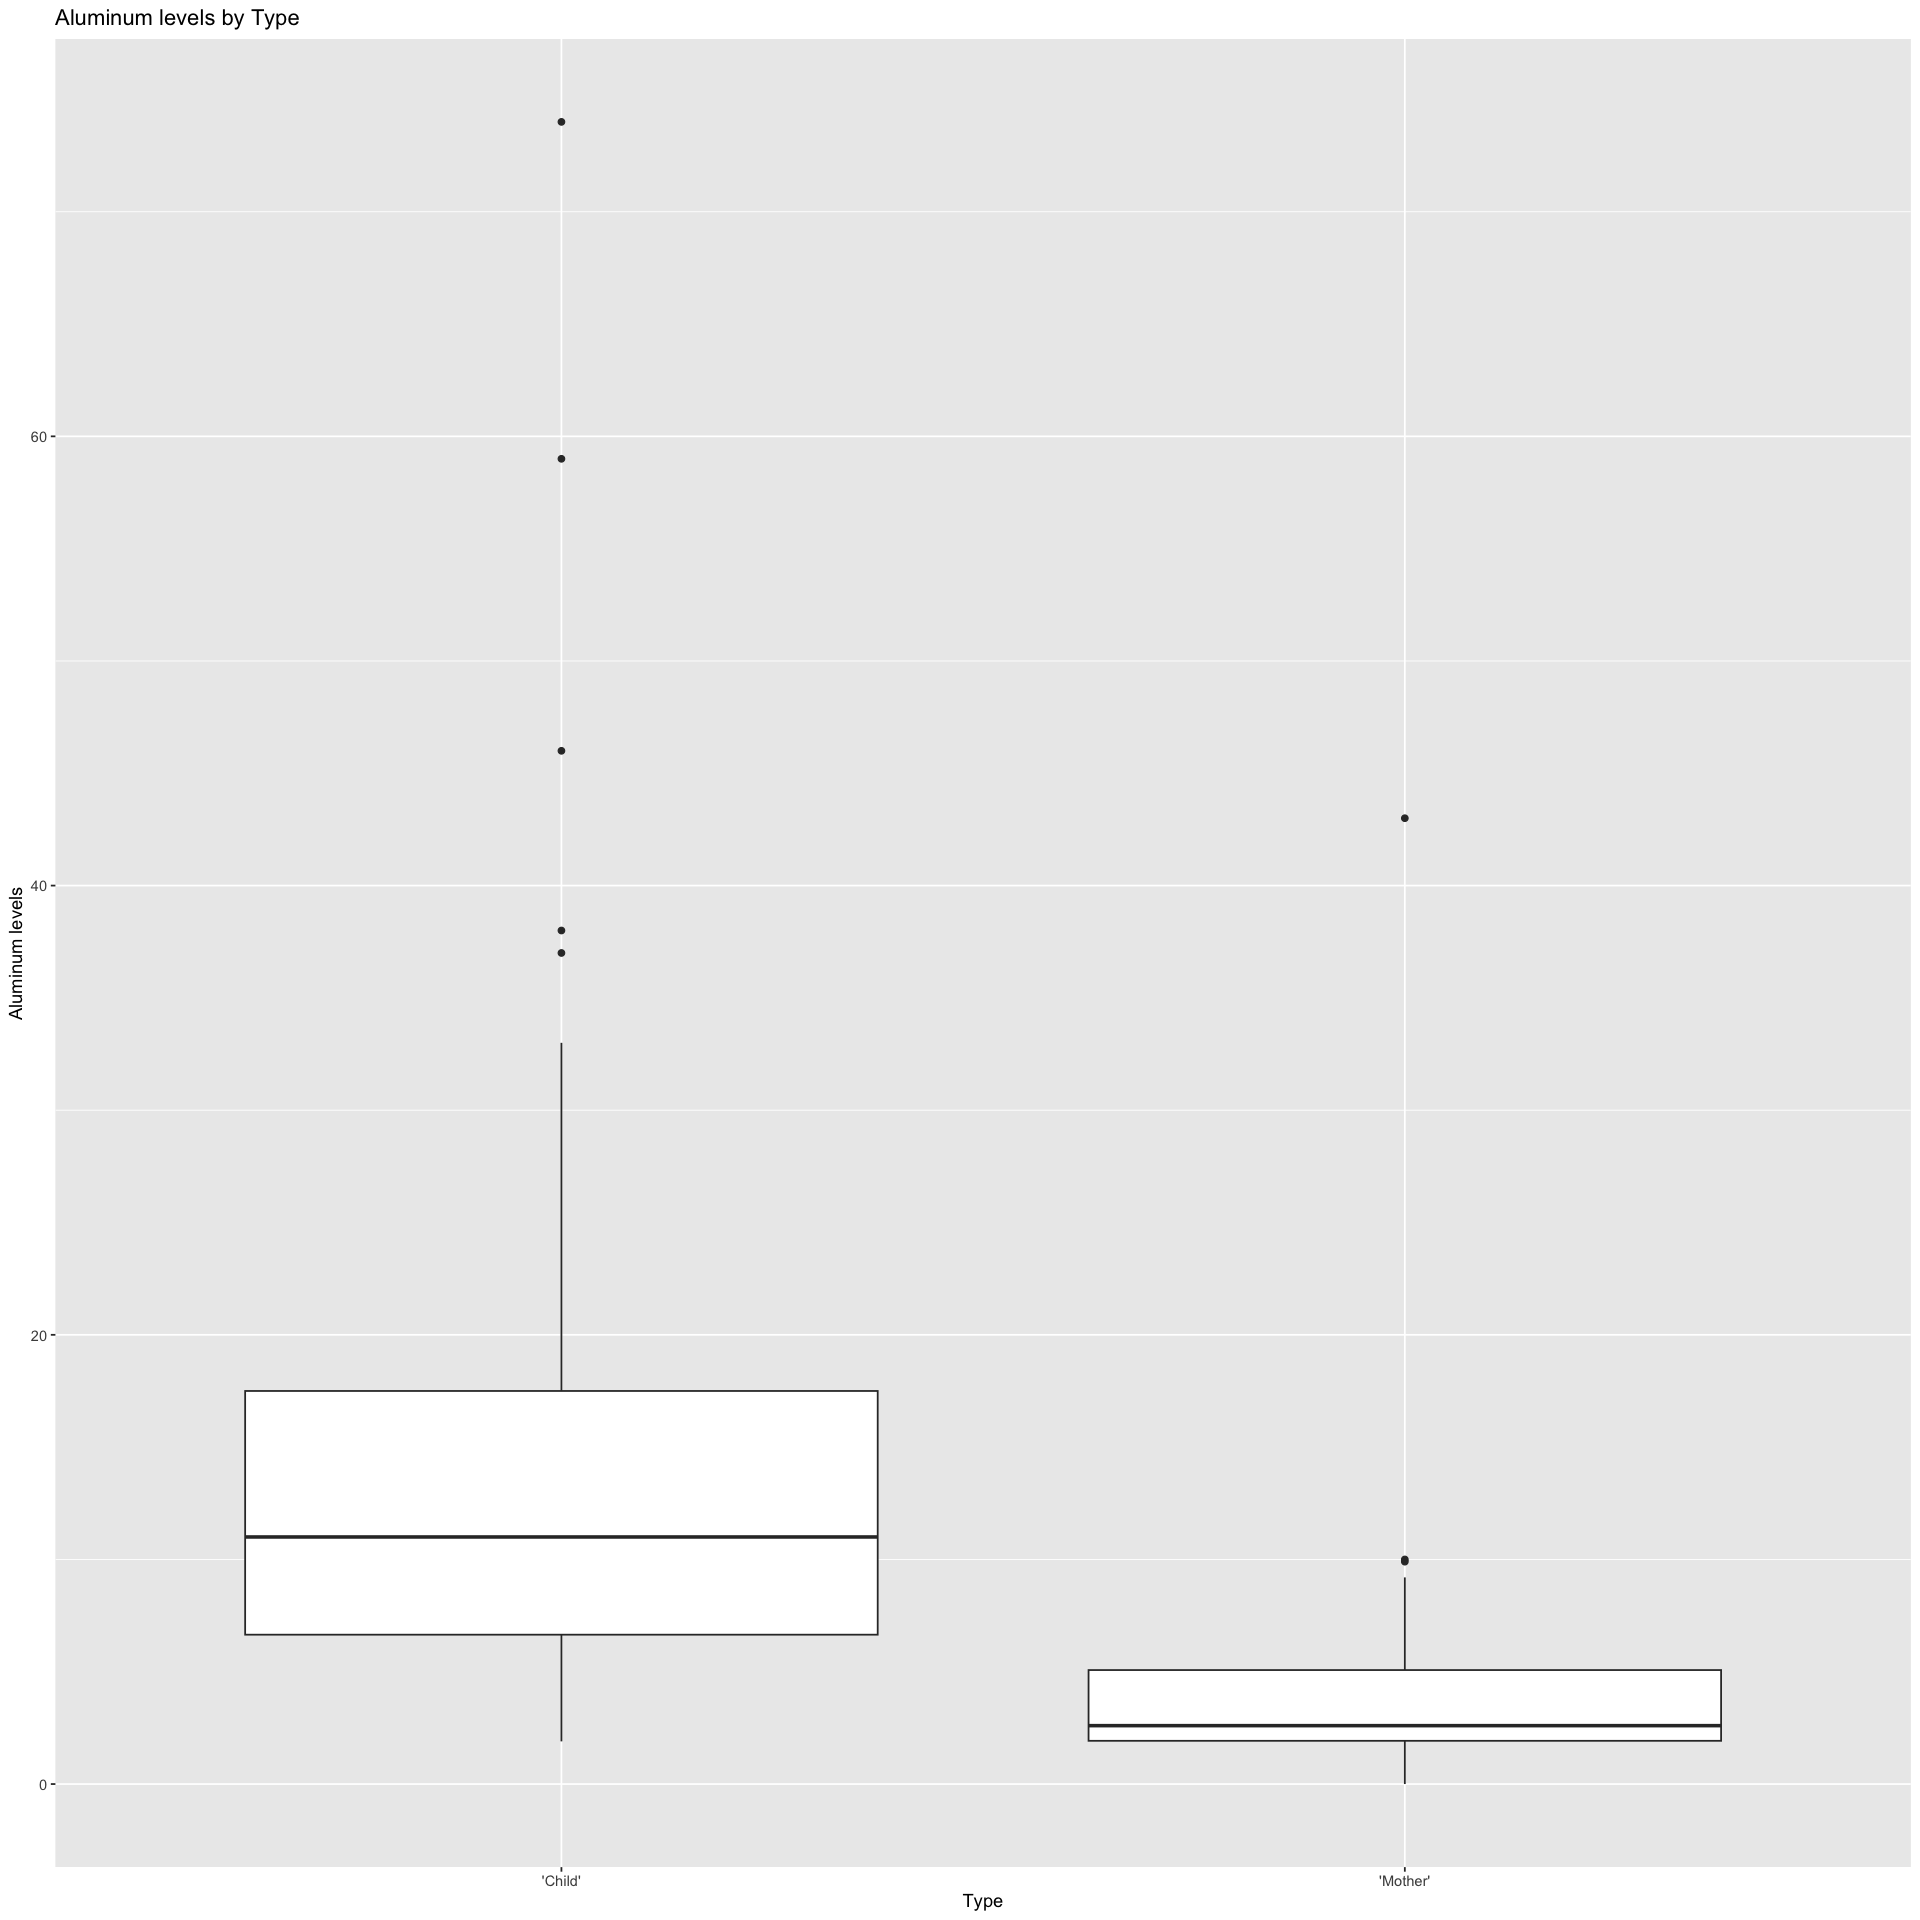

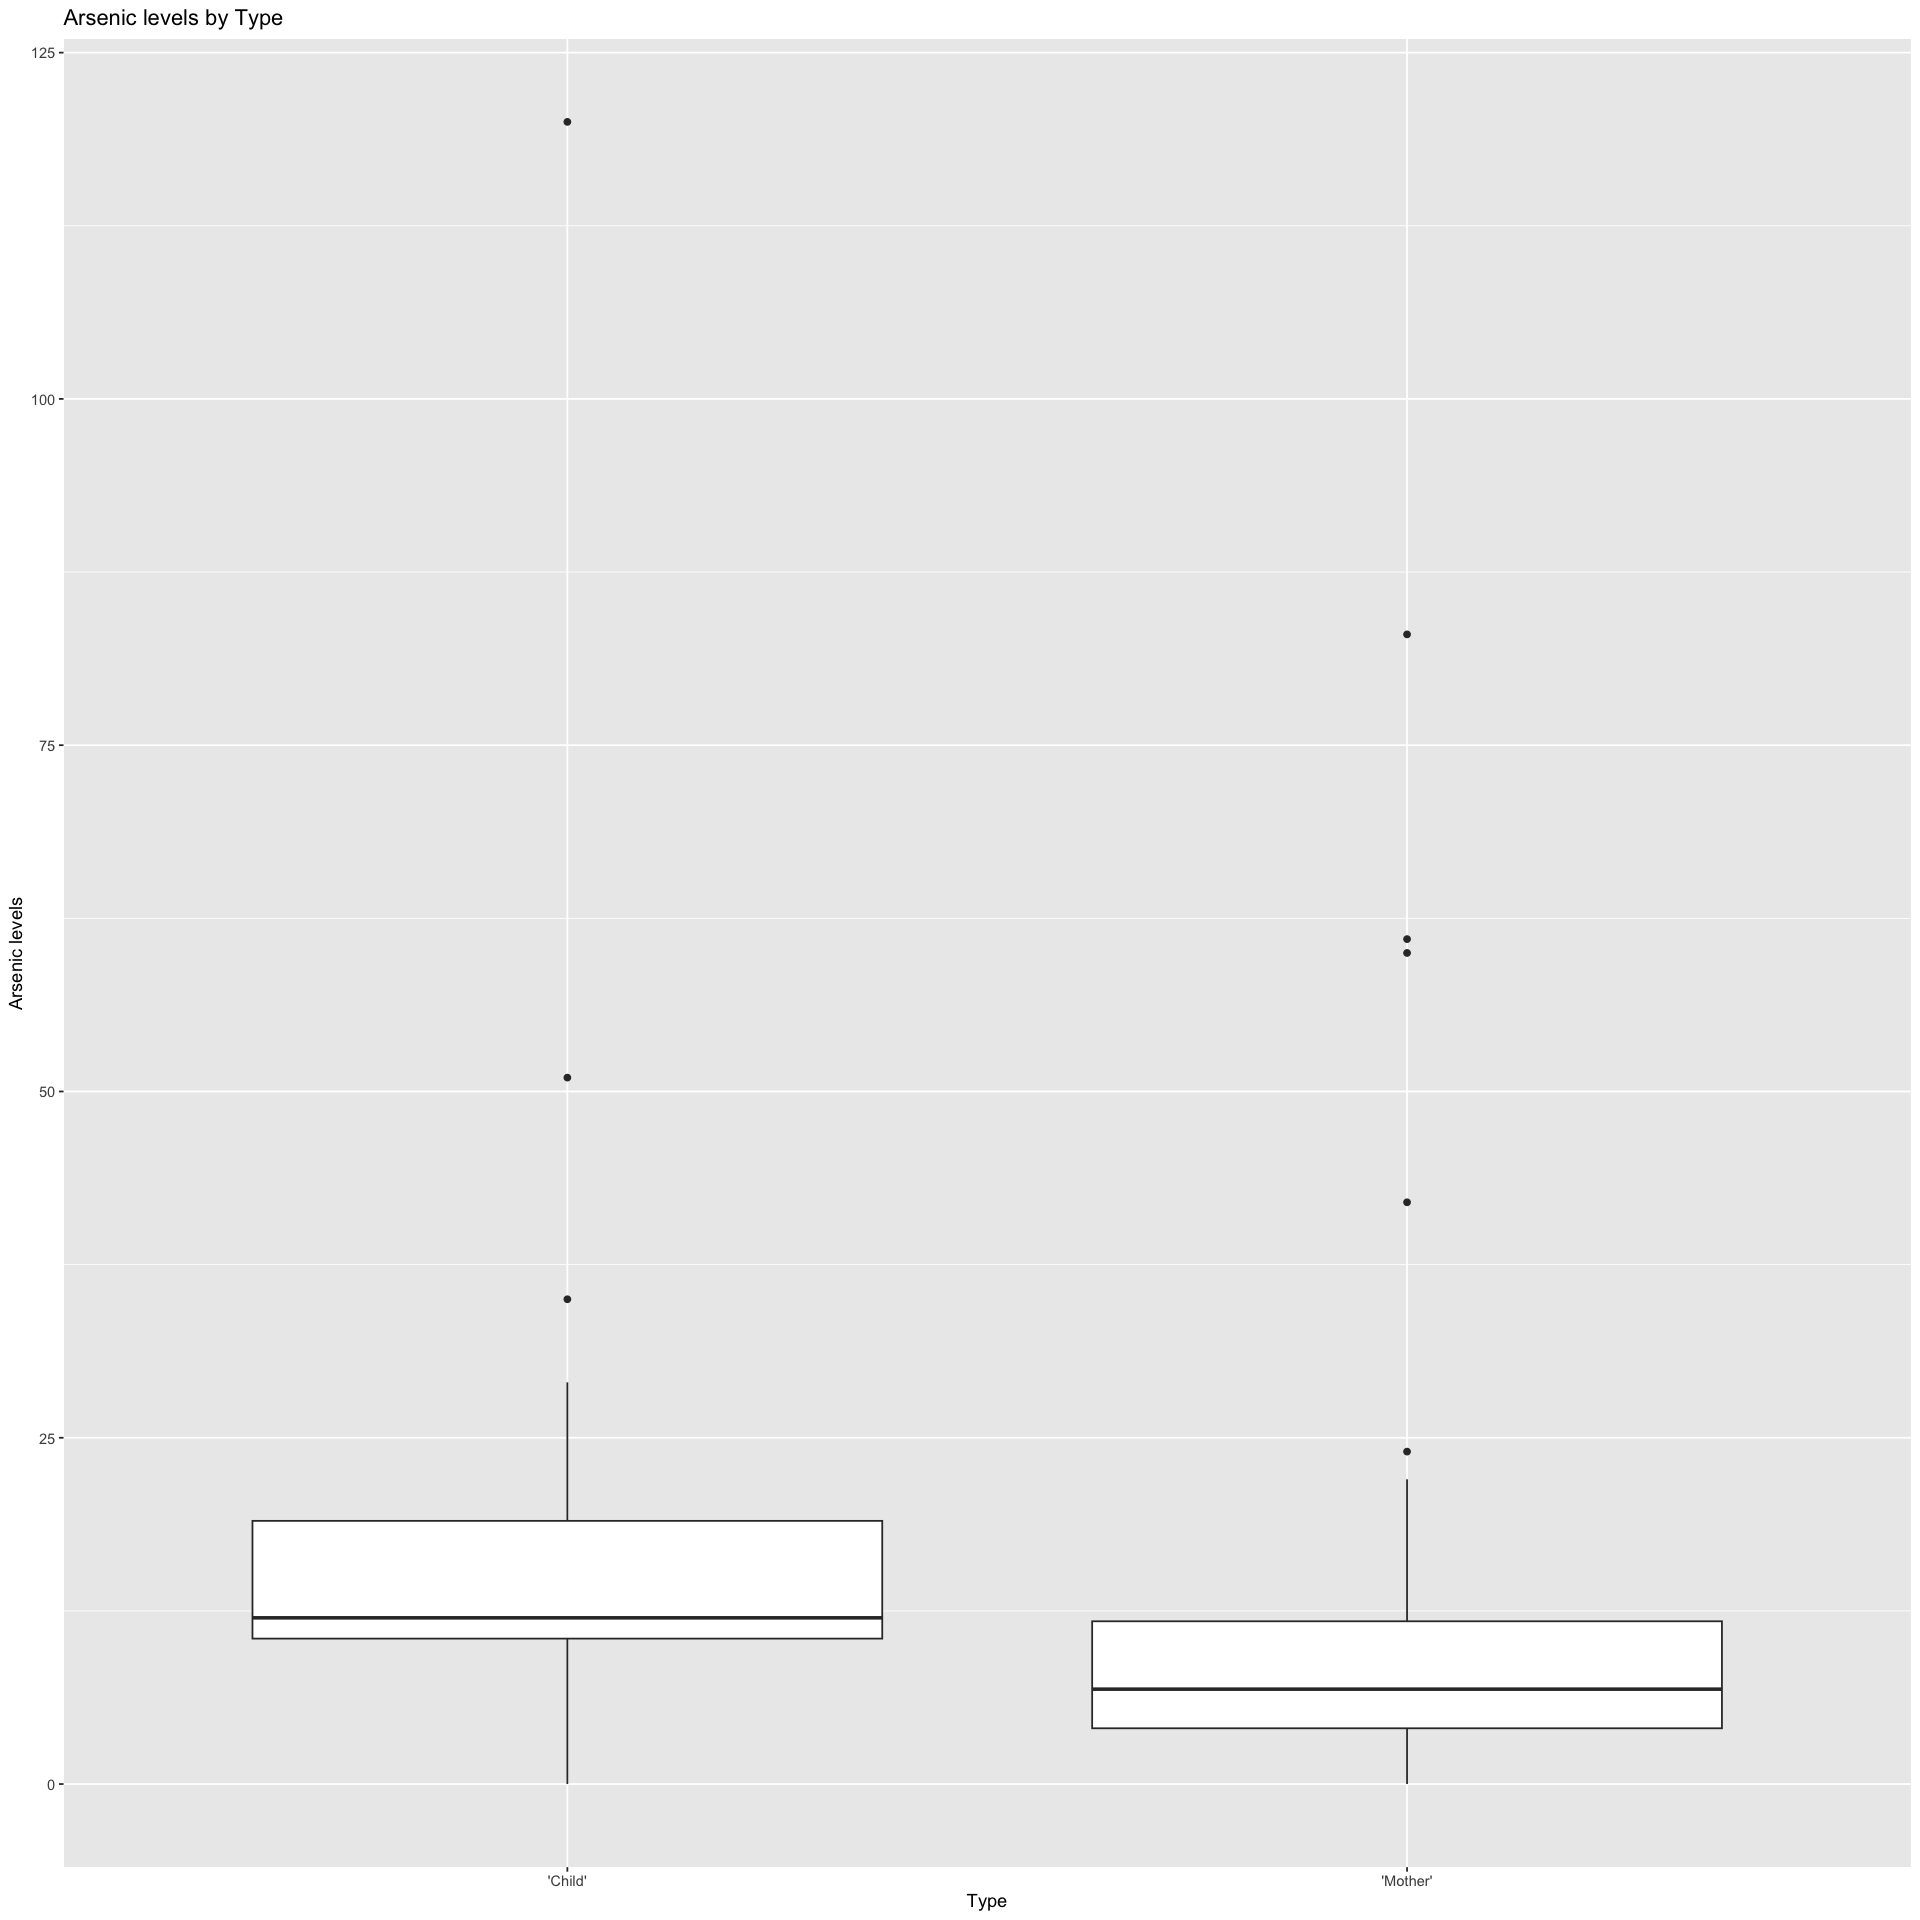

In [23]:
# Create boxplots of numerical variables grouped by Type
ggplot(data, aes(x = Type, y = Aluminum)) + 
  geom_boxplot() + 
  ggtitle("Aluminum levels by Type") +
  ylab("Aluminum levels") +
  xlab("Type")

ggplot(data, aes(x = Type, y = Arsenic)) + 
  geom_boxplot() + 
  ggtitle("Arsenic levels by Type") +
  ylab("Arsenic levels") +
  xlab("Type")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 16. Combined Boxplots of numerical variables grouped by Status and Type<a class="anchor" id="PANR_page_16"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


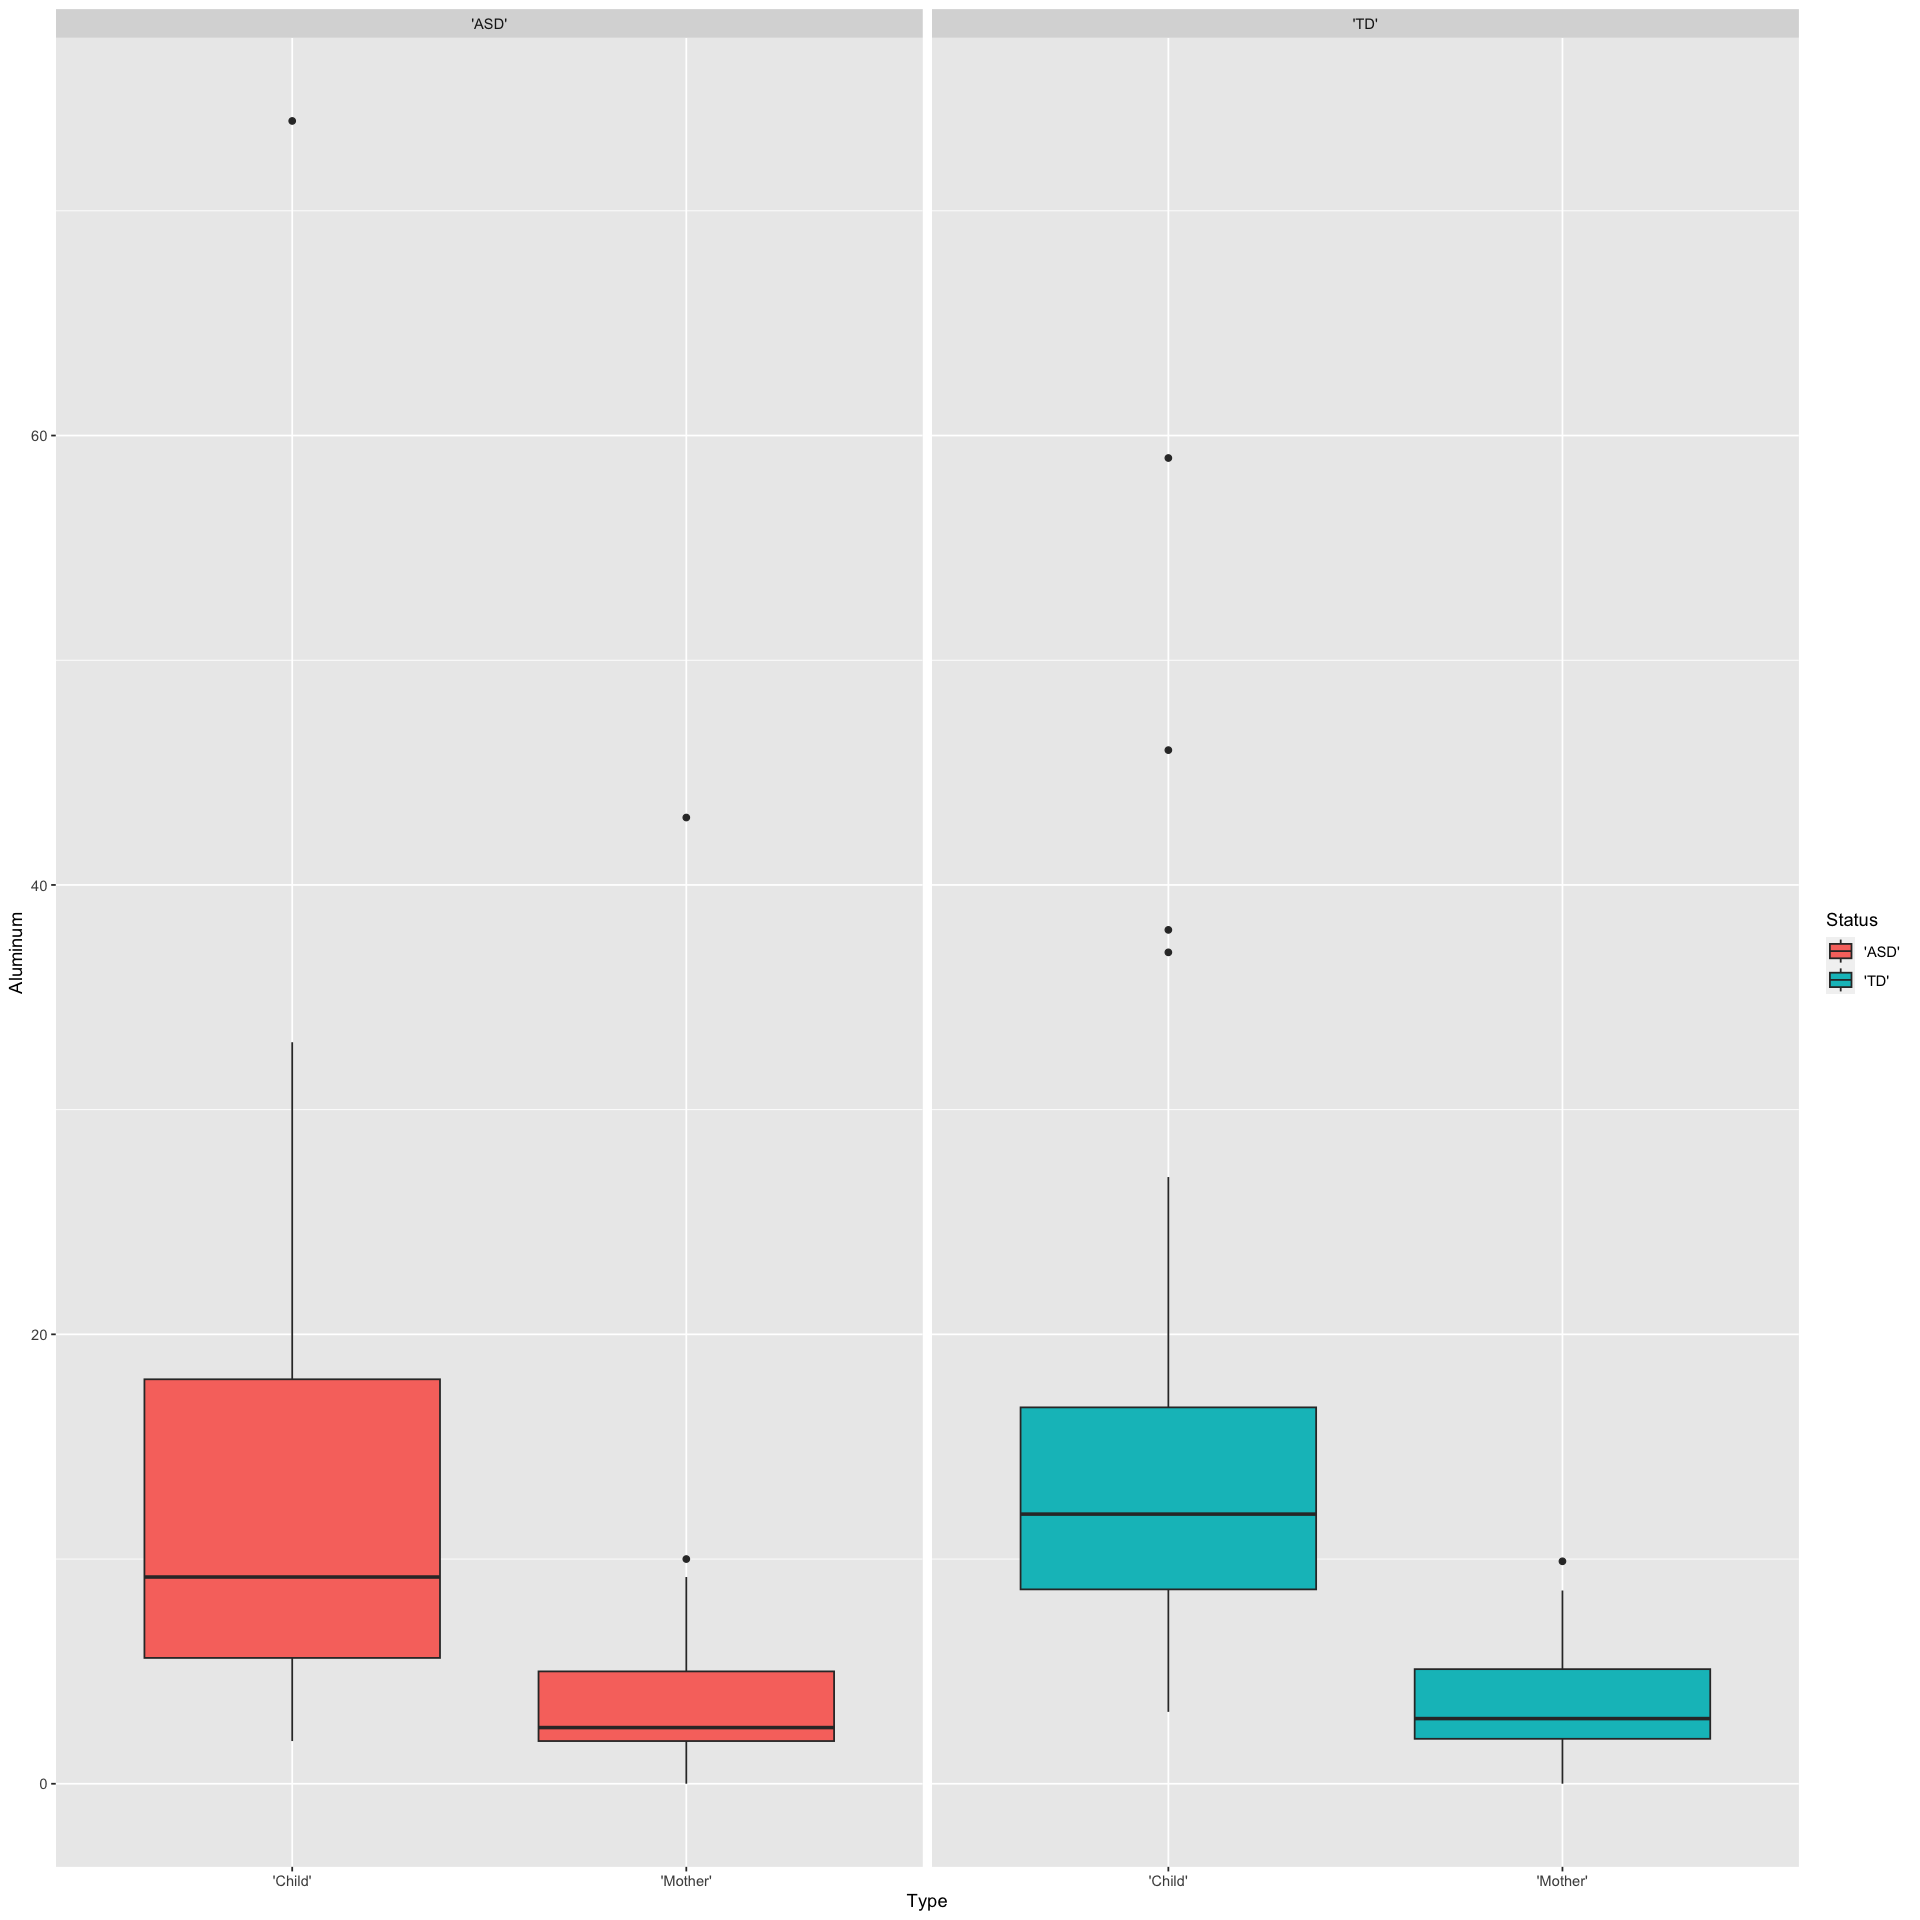

In [24]:
# plot the Status and Types boxplots together
ggplot(data, aes(x = Type, y = Aluminum, fill = Status)) +
  geom_boxplot() +
  facet_wrap(~ Status)

# create a plot with boxplots of Aluminum levels grouped by Type and colored by Status, with one facet for 
# each Status group. You can modify the code to plot other numerical variables and categorical variables as well.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 17. Histograms of Aluminum, Arsenic, and Lead Levels<a class="anchor" id="PANR_page_17"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


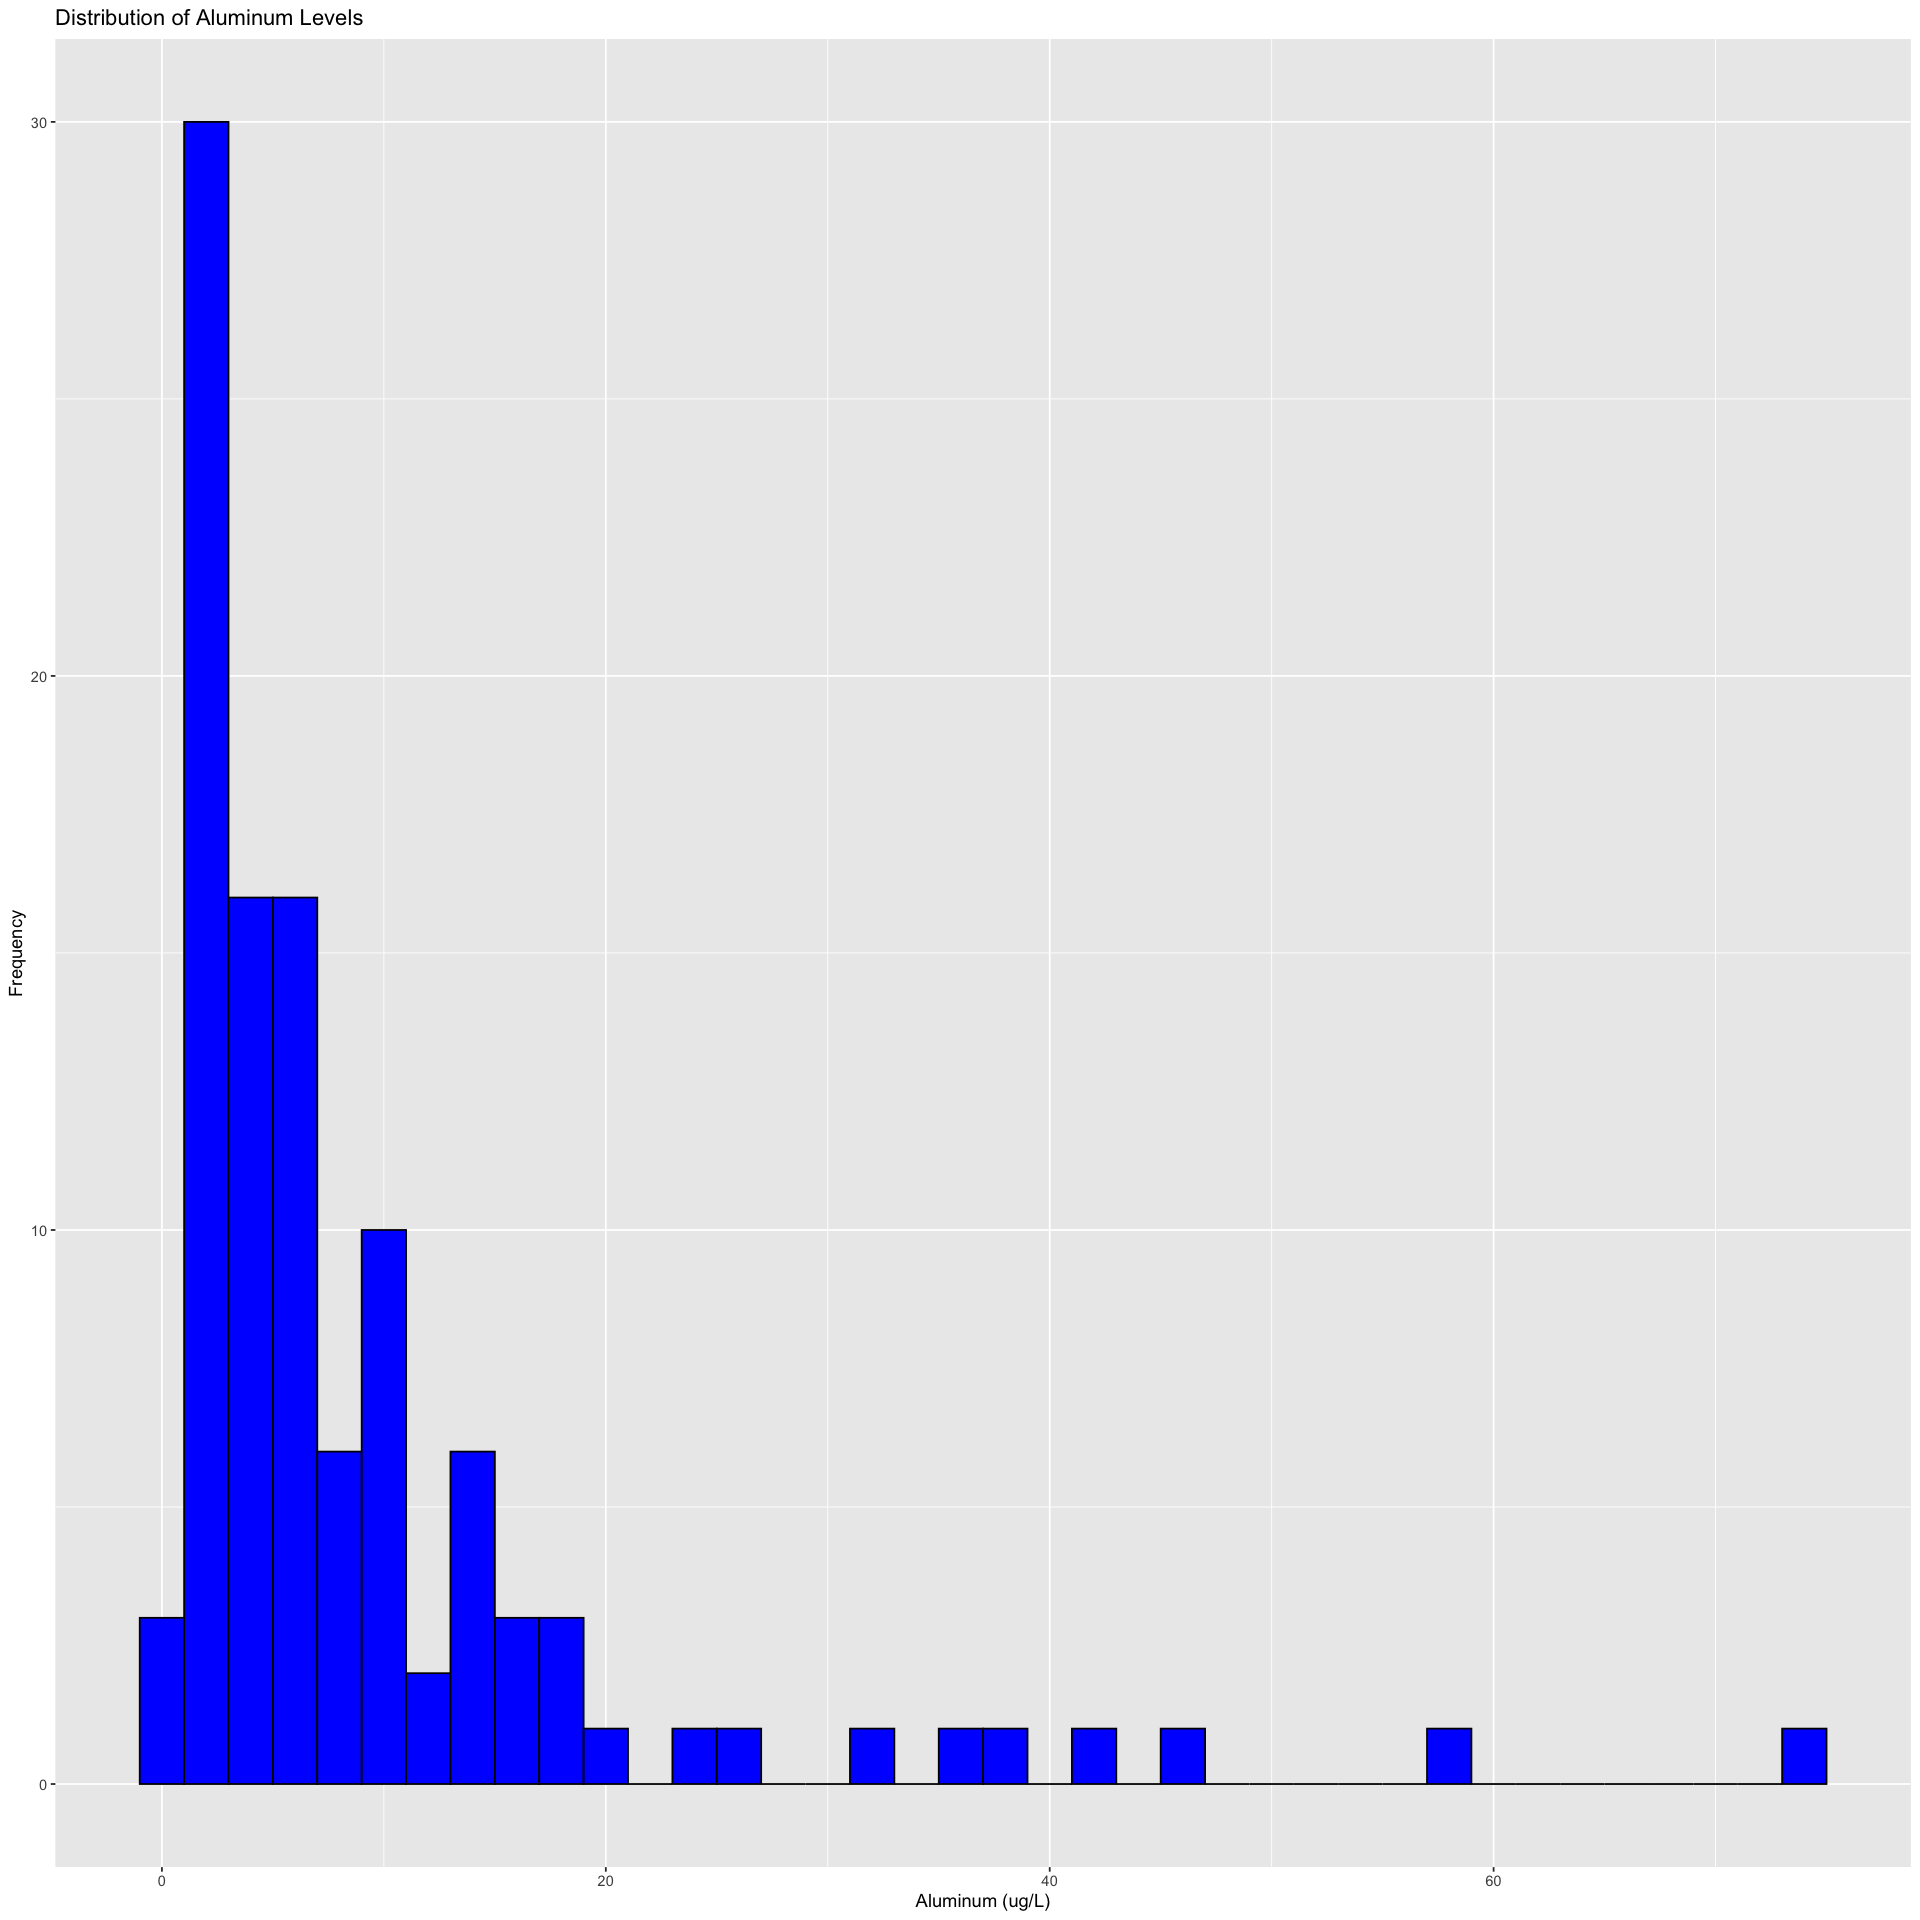

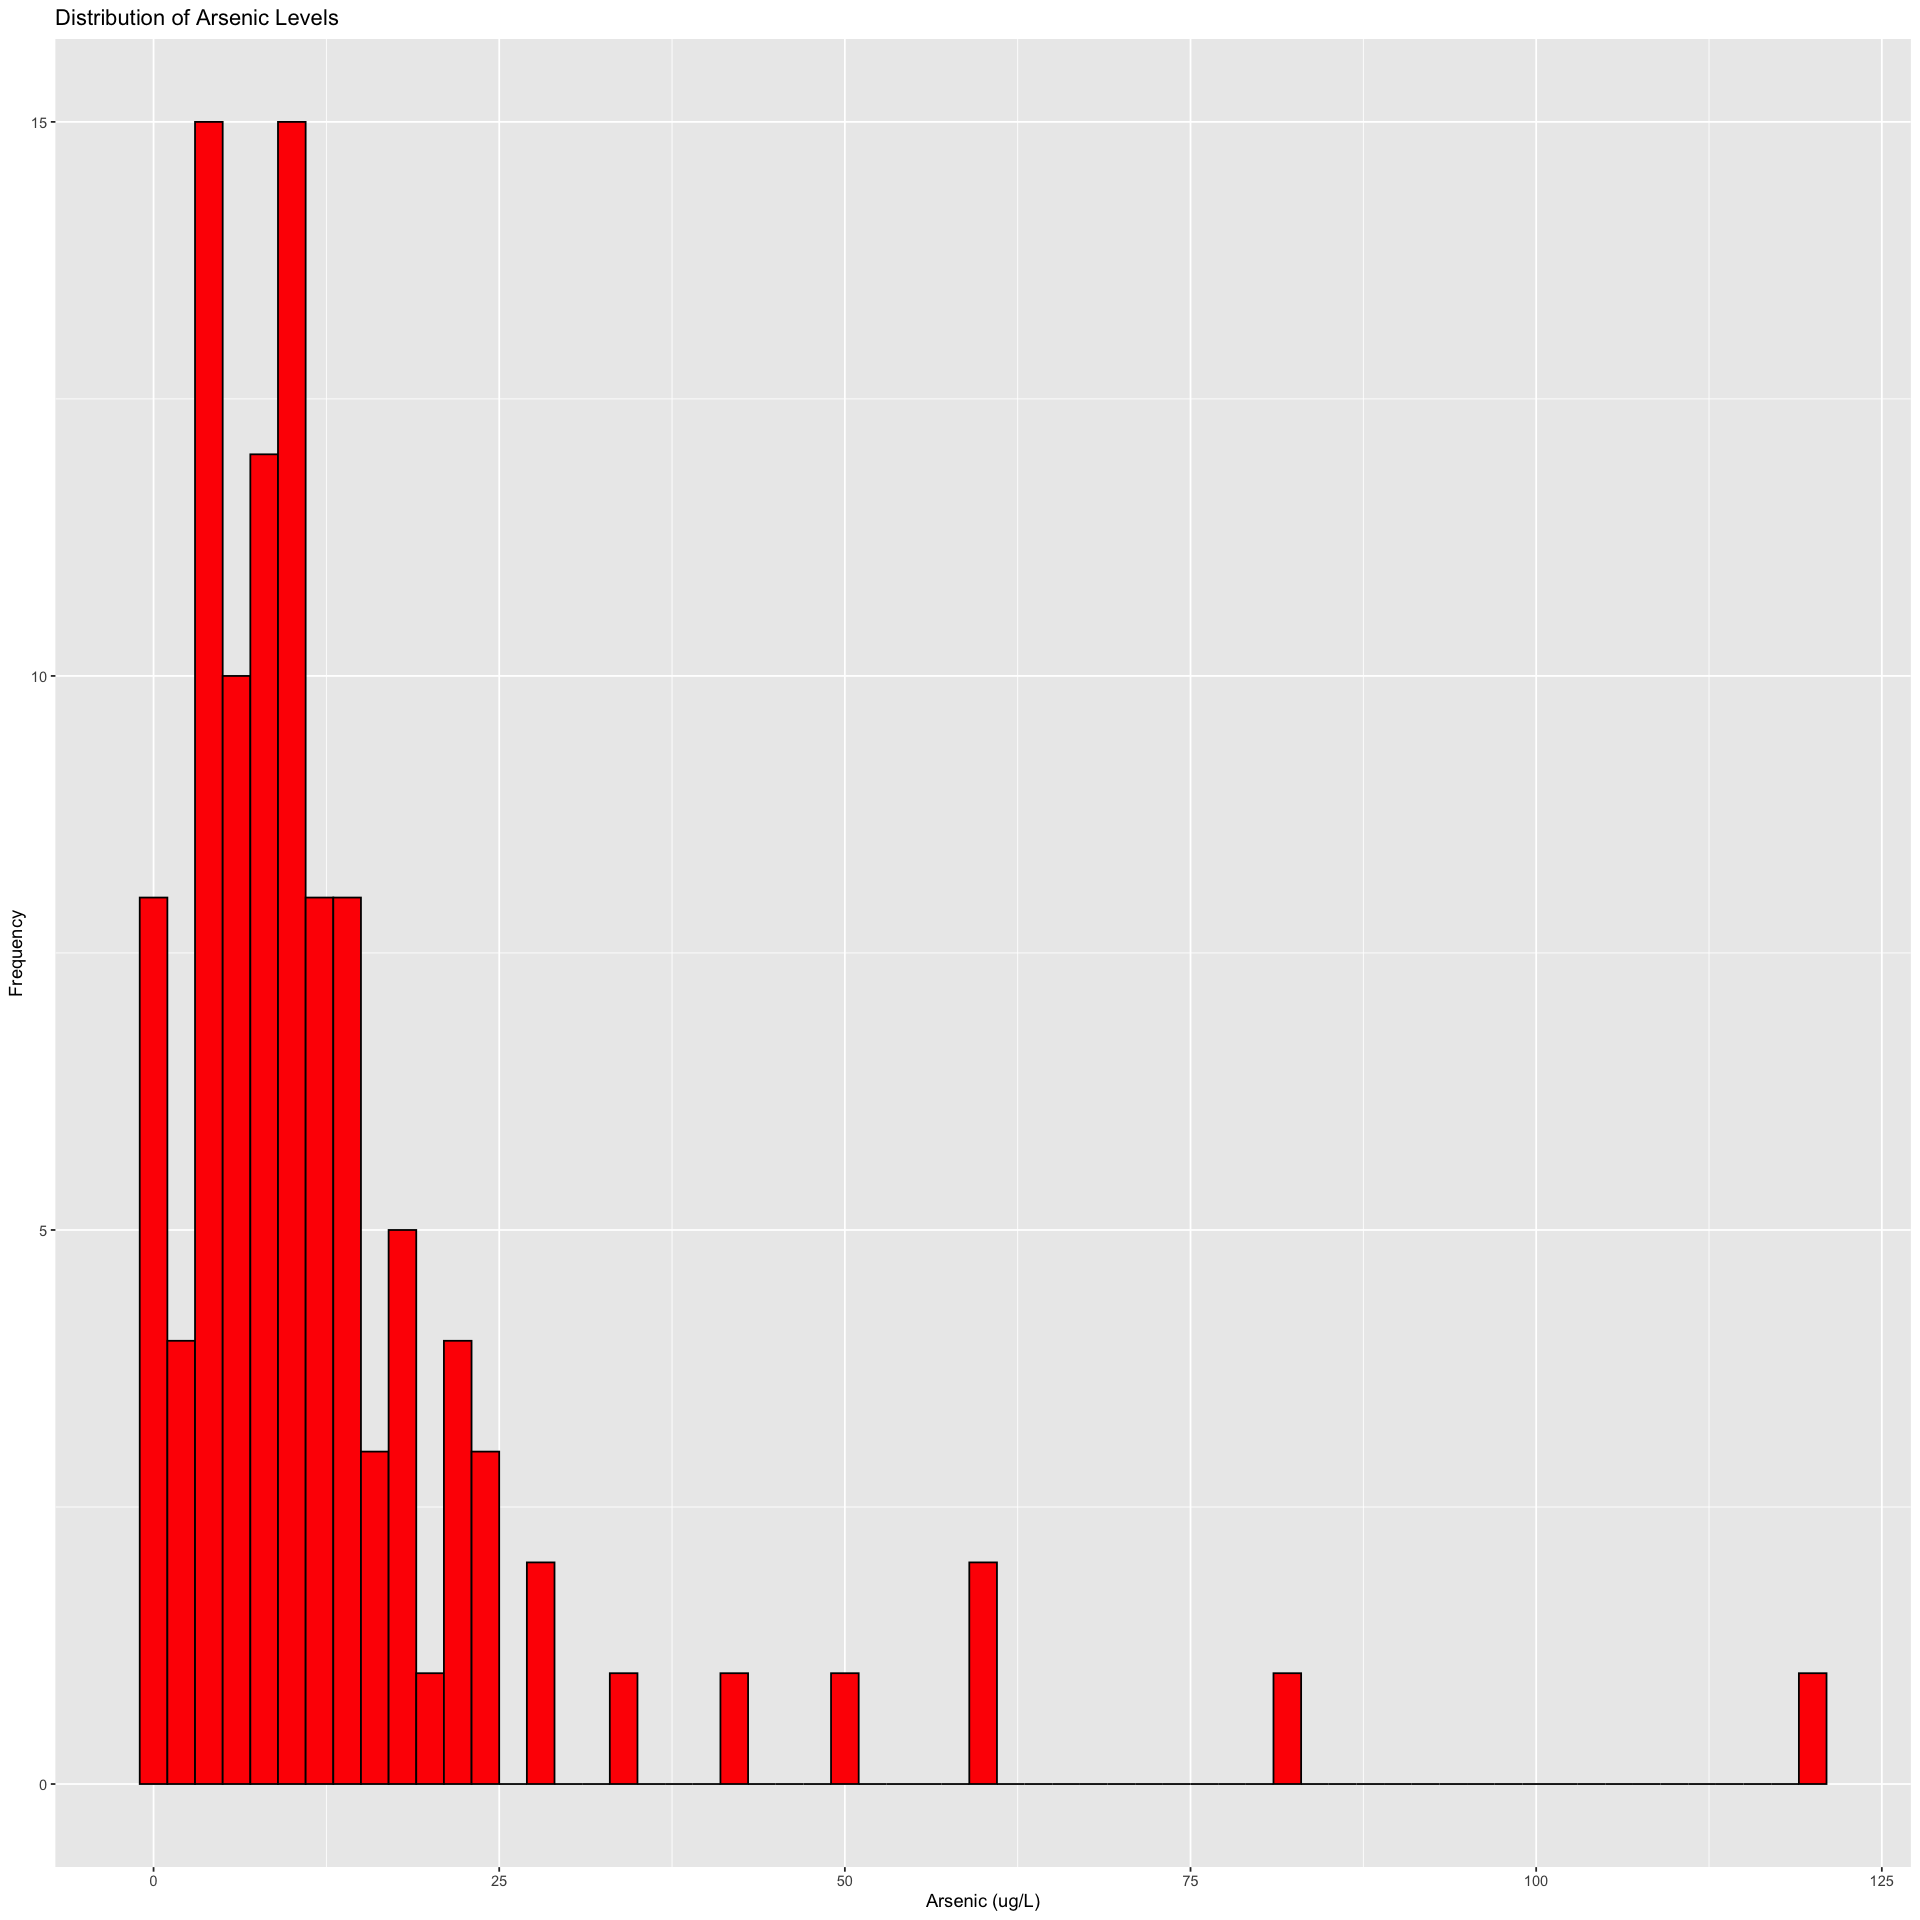

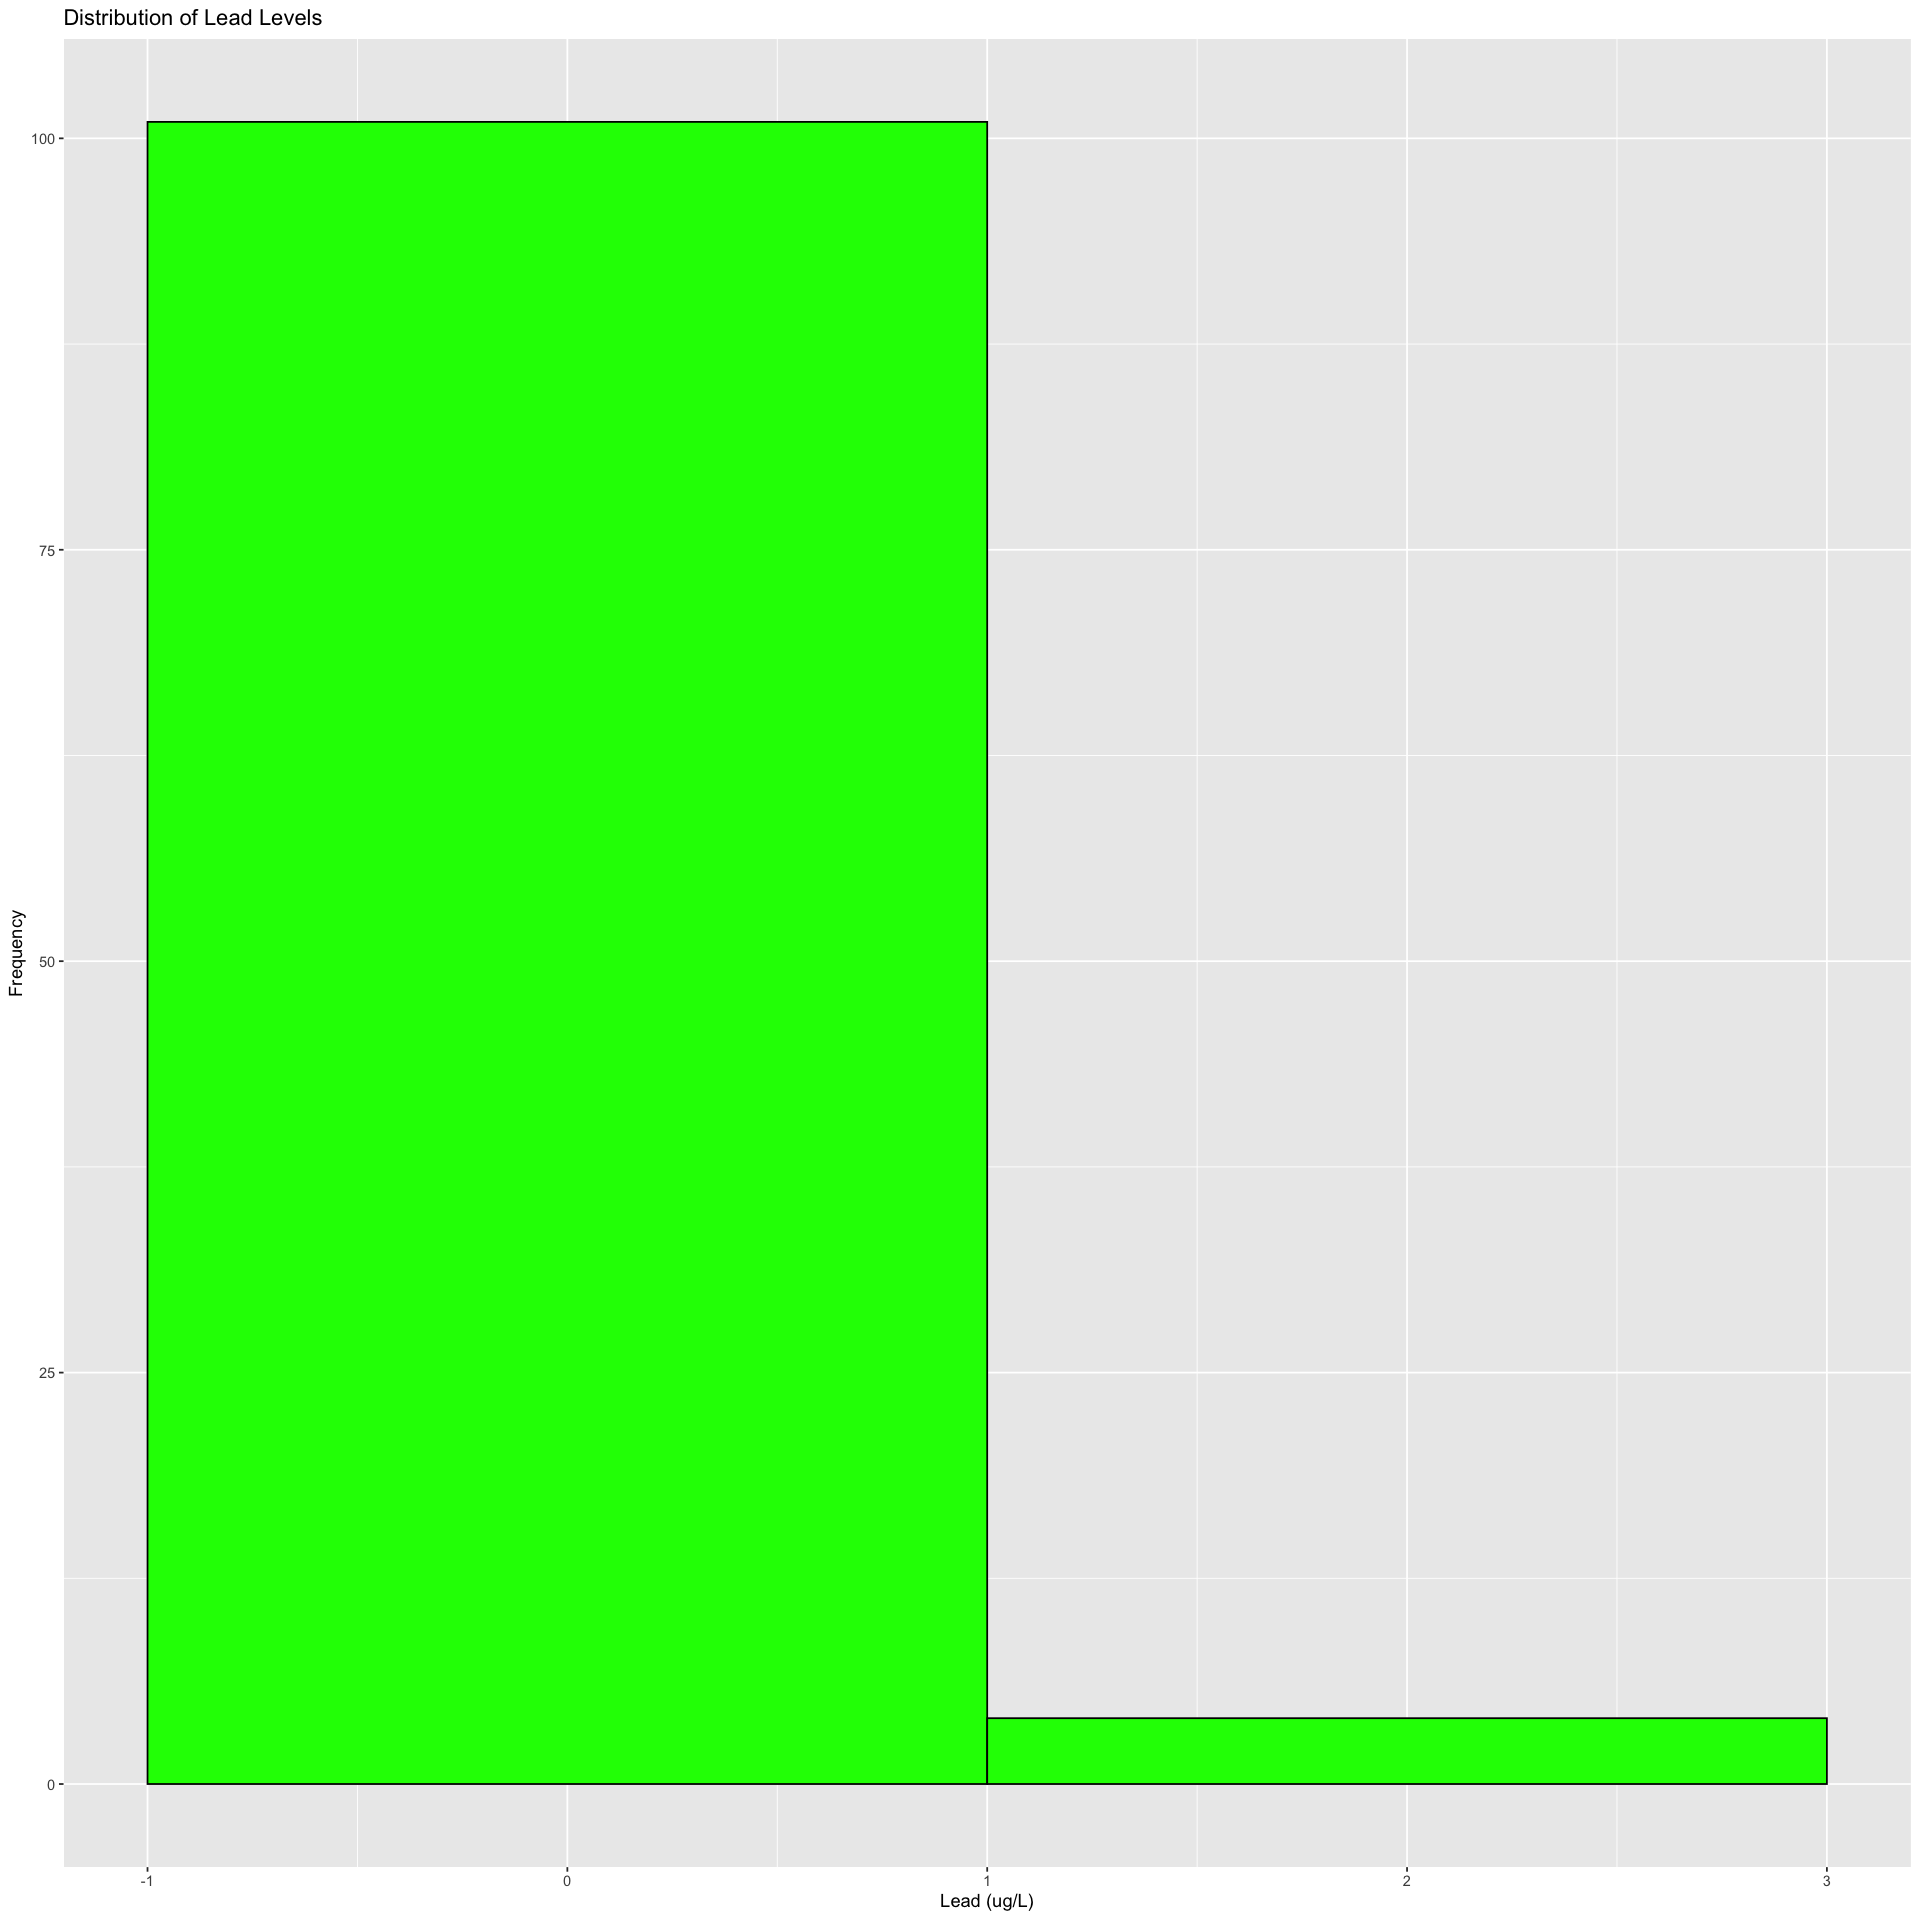

In [25]:
# Histogram of Aluminum levels
ggplot(data, aes(x = Aluminum)) + 
  geom_histogram(binwidth = 2, fill = "blue", color = "black") + 
  ggtitle("Distribution of Aluminum Levels") + 
  xlab("Aluminum (ug/L)") + 
  ylab("Frequency")

# Histogram of Arsenic levels
ggplot(data, aes(x = Arsenic)) + 
  geom_histogram(binwidth = 2, fill = "red", color = "black") + 
  ggtitle("Distribution of Arsenic Levels") + 
  xlab("Arsenic (ug/L)") + 
  ylab("Frequency")

# Histogram of Lead levels
ggplot(data, aes(x = Lead)) + 
  geom_histogram(binwidth = 2, fill = "green", color = "black") + 
  ggtitle("Distribution of Lead Levels") + 
  xlab("Lead (ug/L)") + 
  ylab("Frequency")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 18. Scatterplot of Aluminum vs. Arsenic<a class="anchor" id="PANR_page_18"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


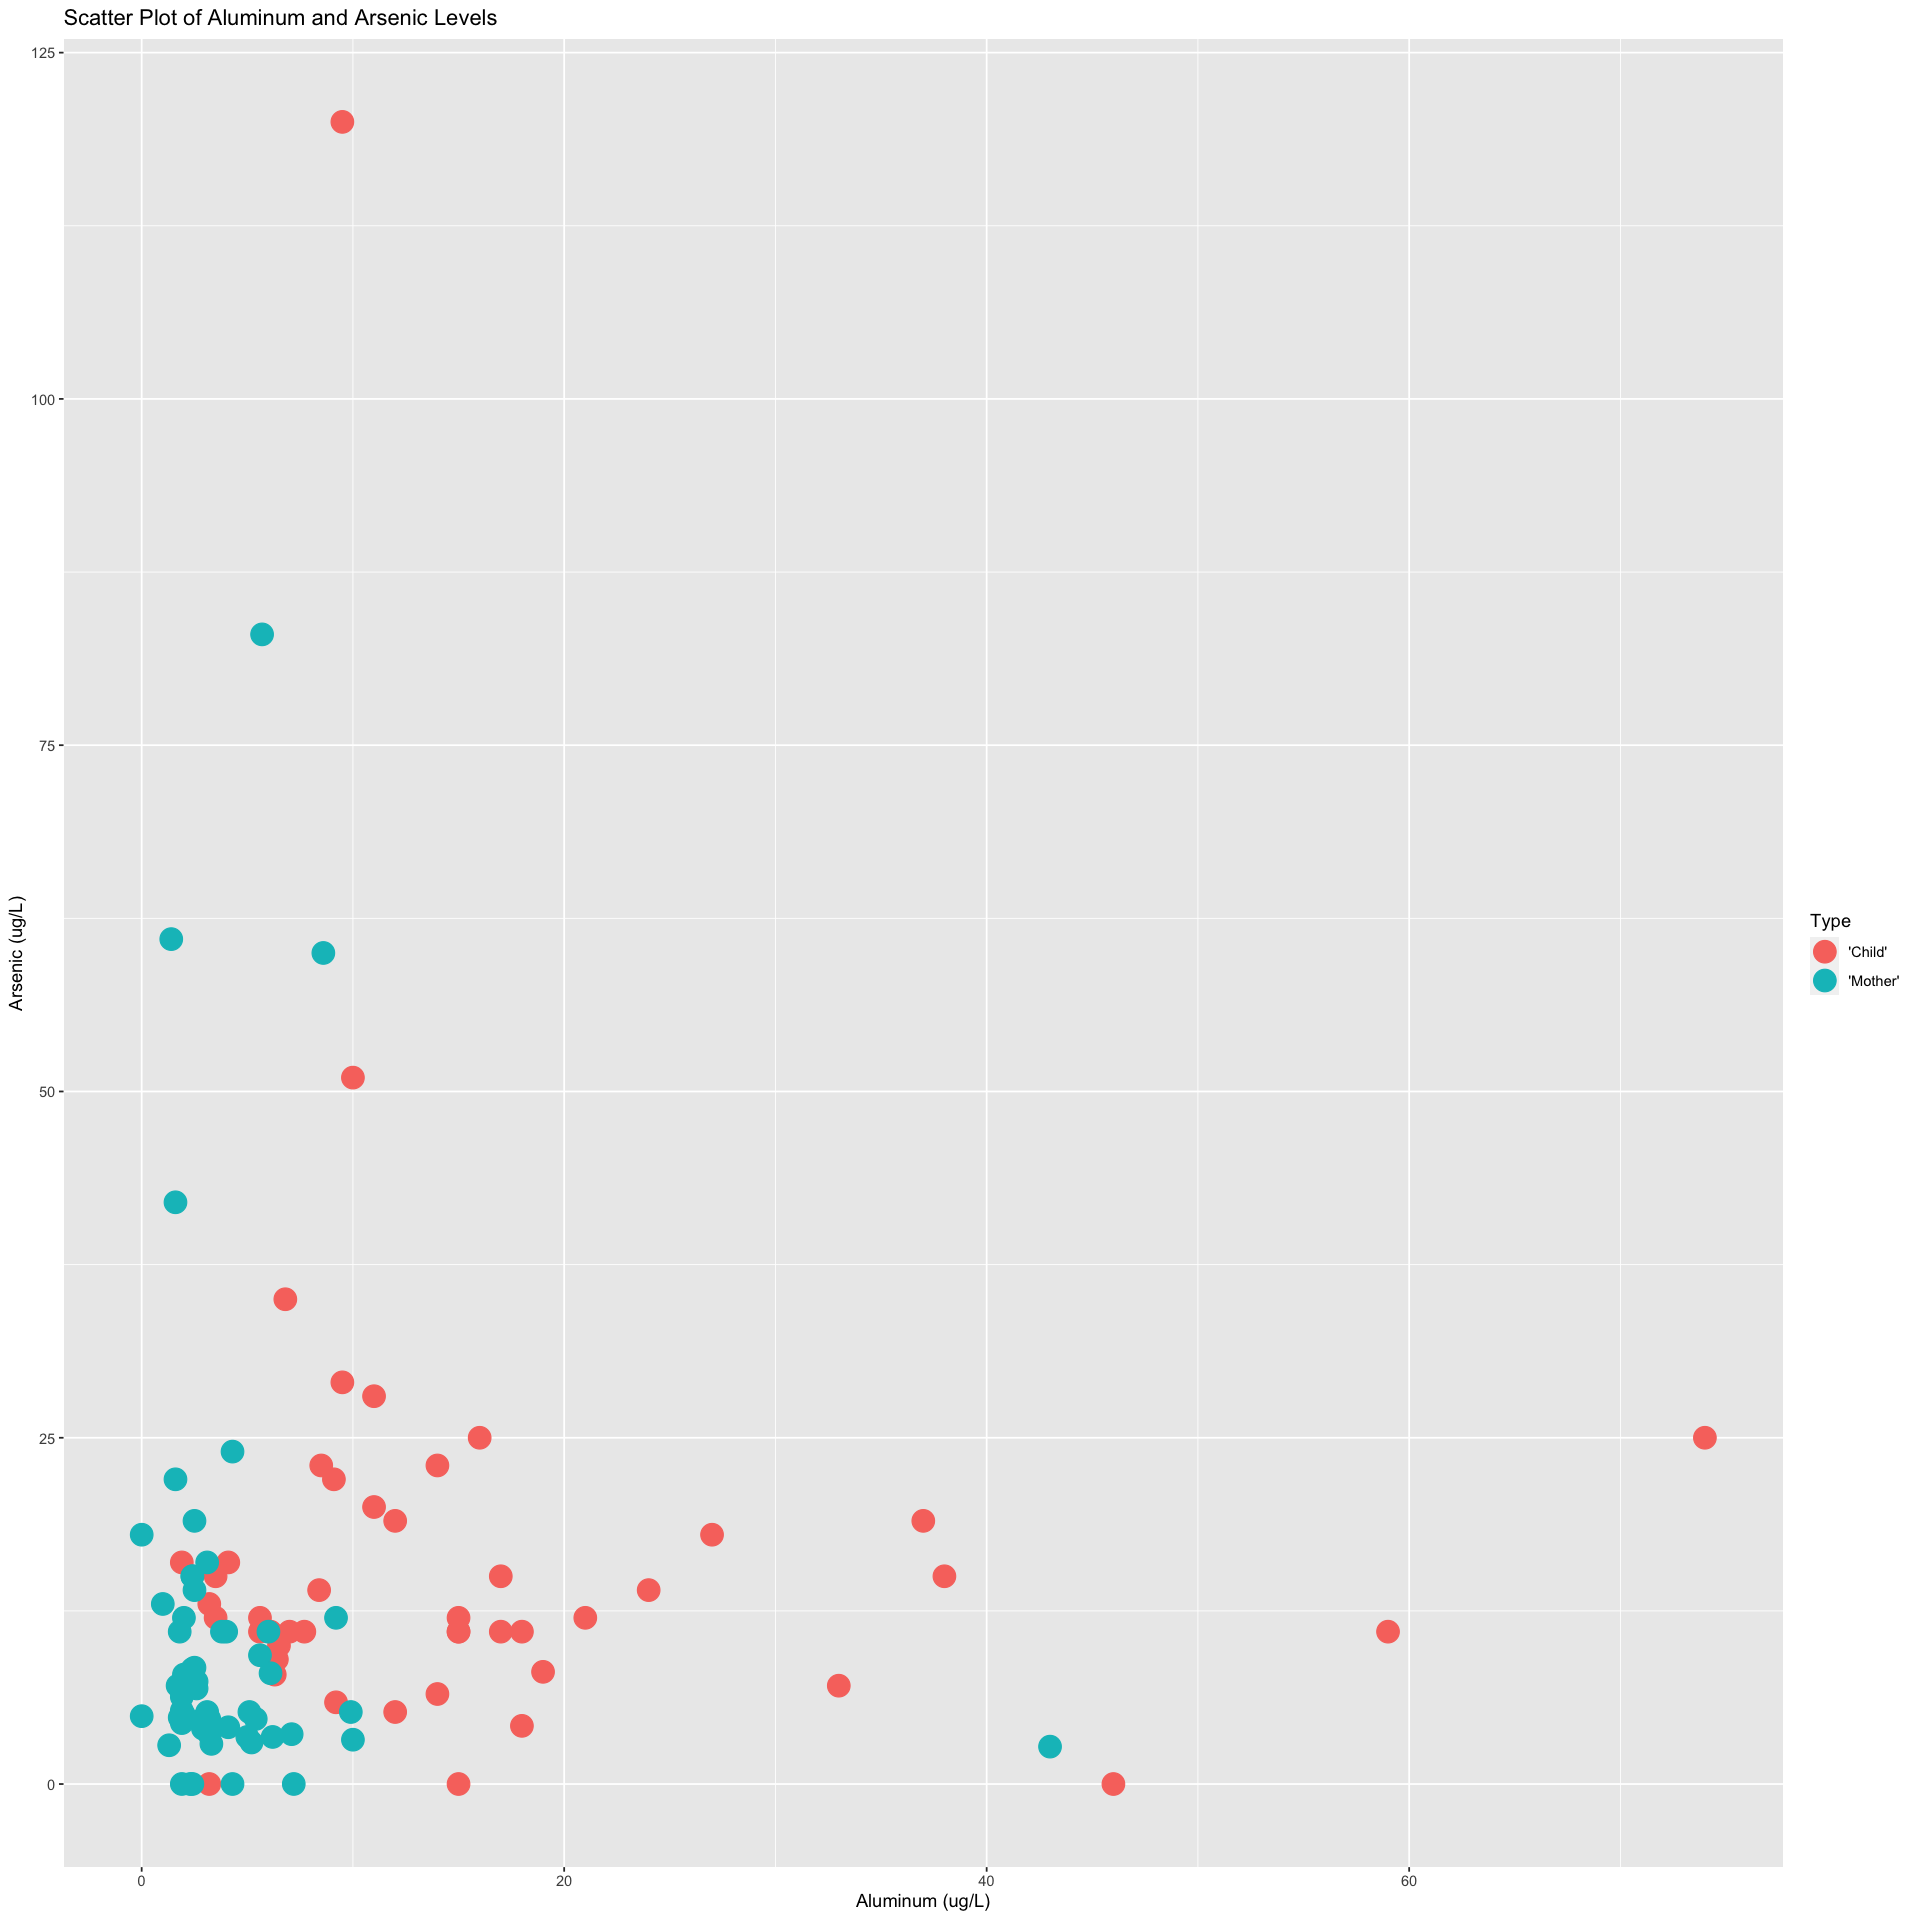

In [26]:
# Create scatterplot of Aluminum vs. Arsenic
ggplot(data, aes(x = Aluminum, y = Arsenic, color = Type)) +
  geom_point(size = 6) +
  labs(title = "Scatter Plot of Aluminum and Arsenic Levels",
       x = "Aluminum (ug/L)", y = "Arsenic (ug/L)")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 19. Scatterplot of Mercury vs. Lead<a class="anchor" id="PANR_page_19"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


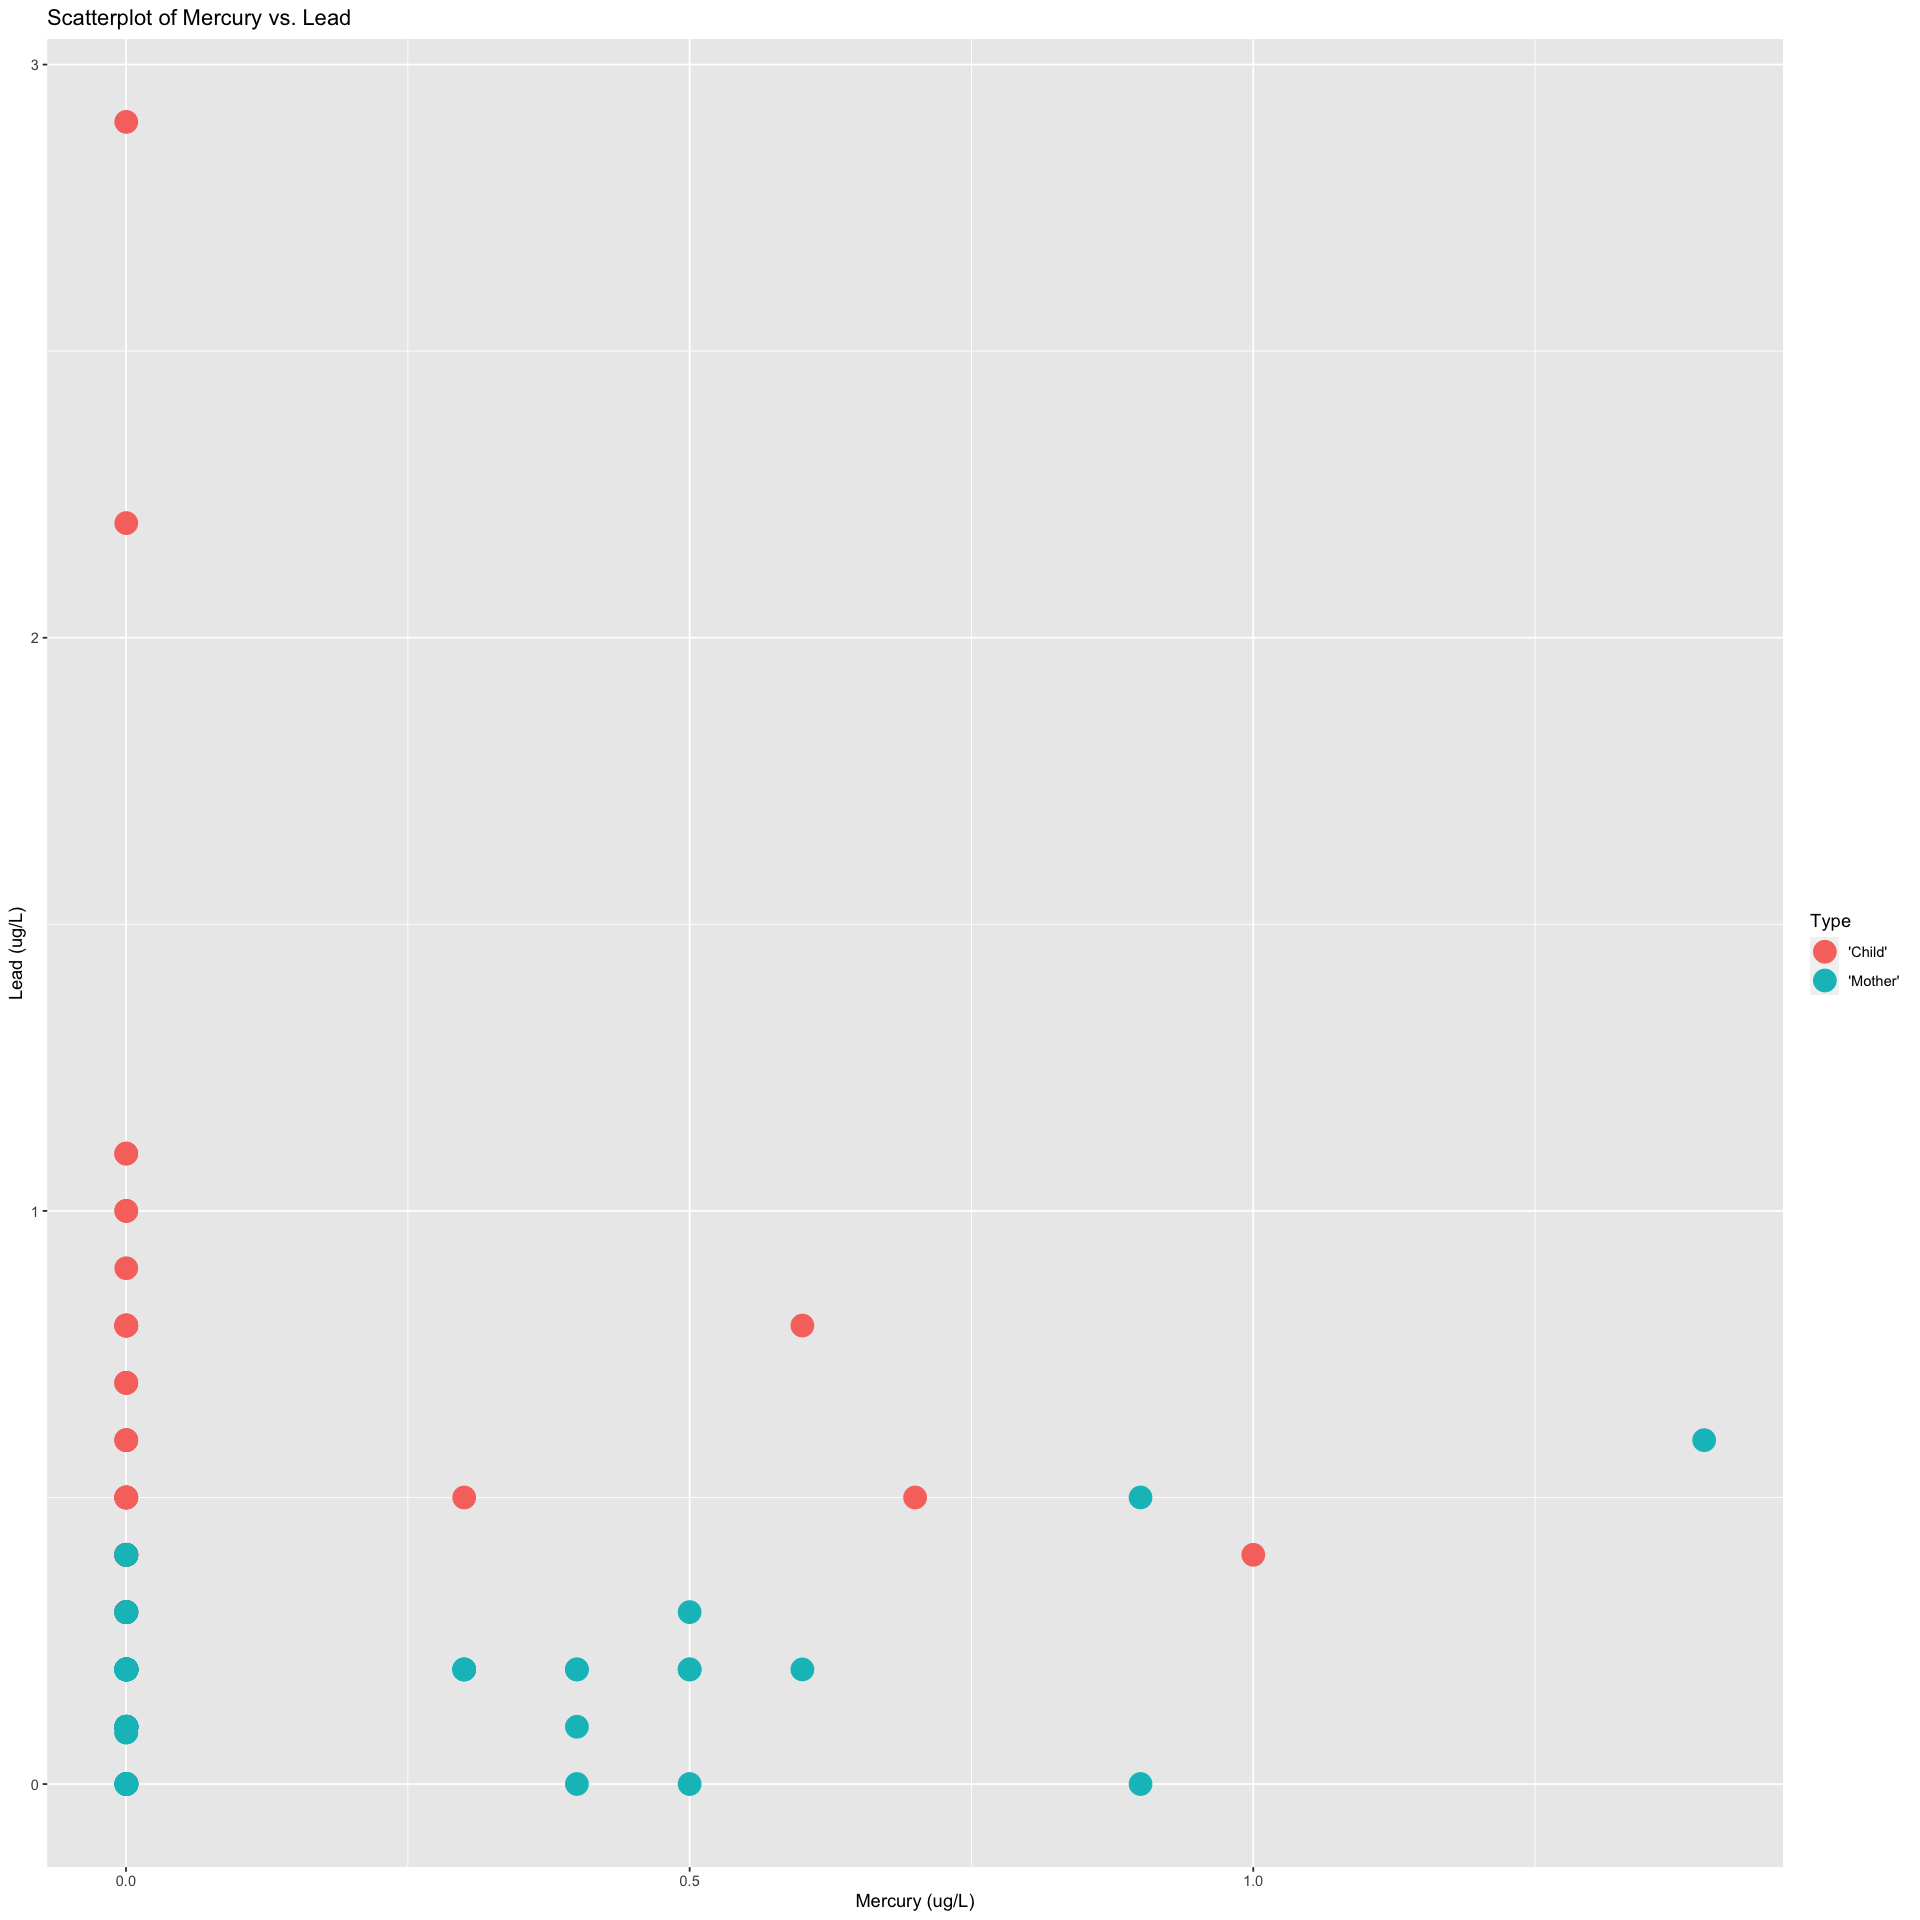

In [27]:
# Create scatterplot of Mercury vs. Lead
ggplot(data, aes(x = Mercury, y = Lead, color = Type)) + 
  geom_point(size = 6) +
  labs(x = "Mercury (ug/L)", y = "Lead (ug/L)", 
       title = "Scatterplot of Mercury vs. Lead")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 20. Scatterplot of Calcium vs. Magnesium<a class="anchor" id="PANR_page_20"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


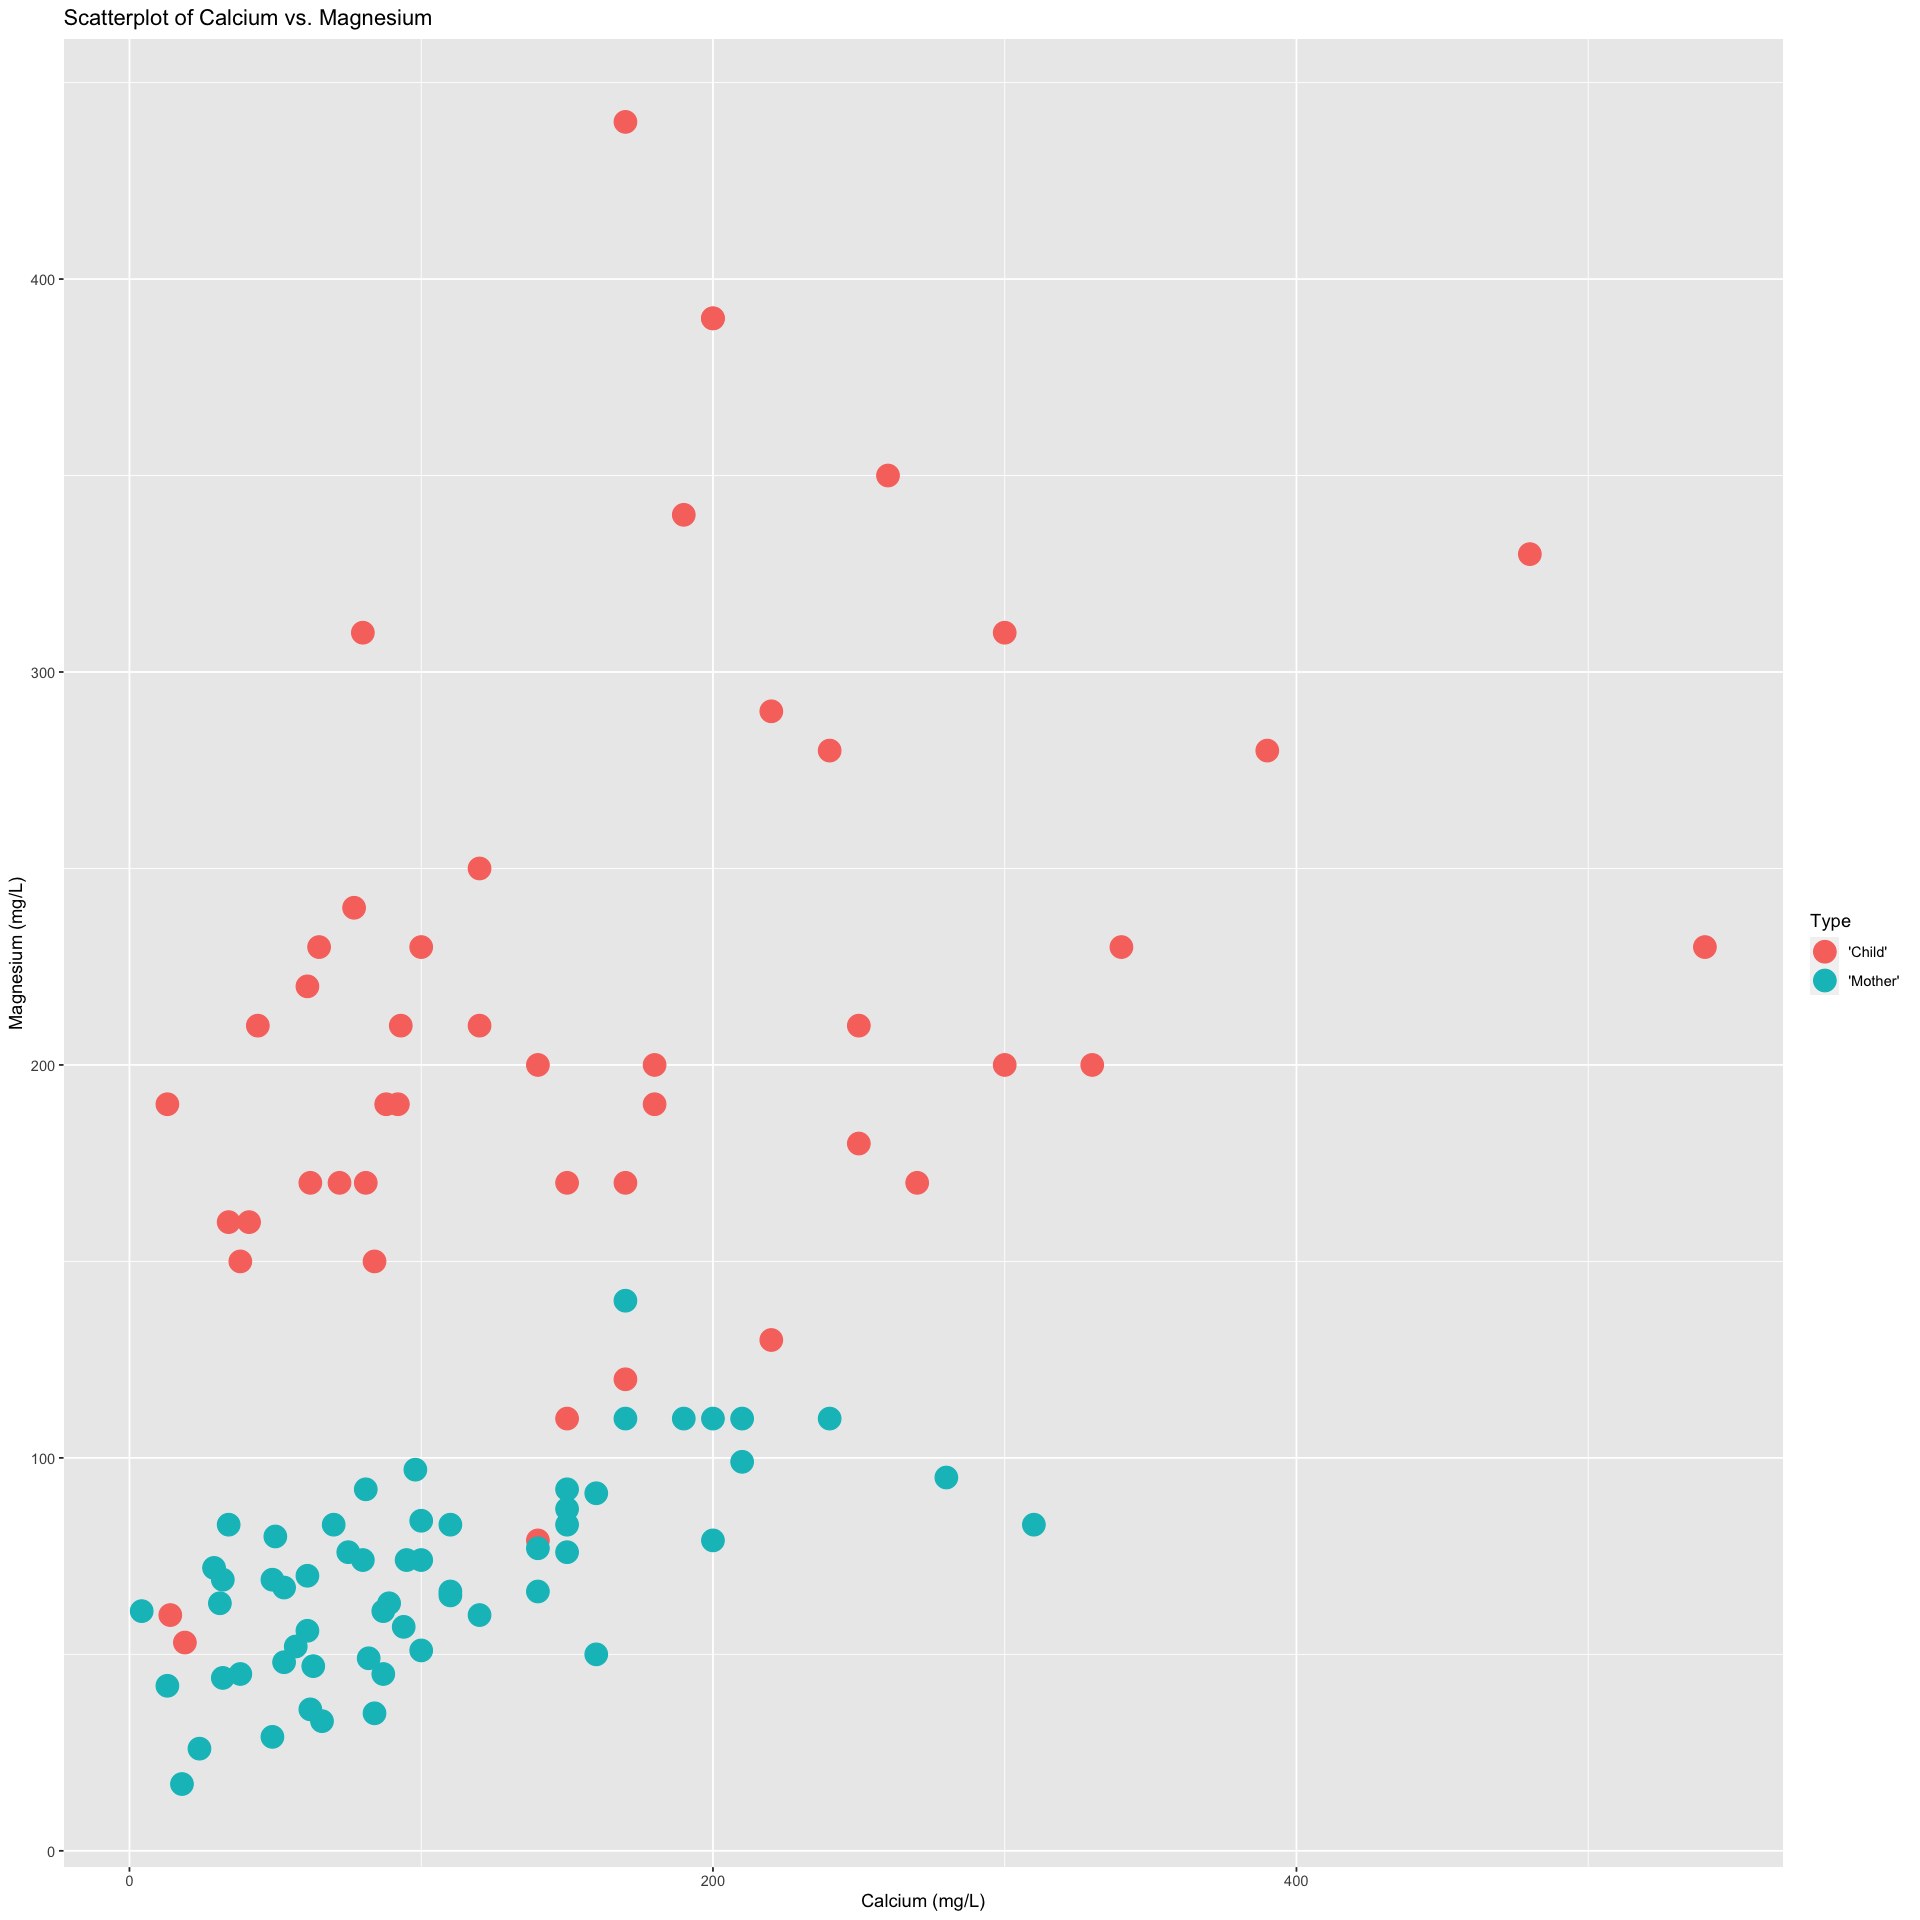

In [28]:
# Create scatterplot of Calcium vs. Magnesium
ggplot(data, aes(x = Calcium, y = Magnesium, color = Type)) + 
  geom_point(size = 6) +
  labs(x = "Calcium (mg/L)", y = "Magnesium (mg/L)", 
       title = "Scatterplot of Calcium vs. Magnesium")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 21. Principal Component Analysis (PCA)<a class="anchor" id="PANR_page_21"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Principal component analysis (PCA): 
PCA is a technique used to reduce the dimensionality of a data set by identifying the underlying structure in the data. This technique can be used to identify the most important elements that explain the majority of the variation in the data.

The steps to conduct a PCA on this dataset are as follows:

1. Load the required packages using the install_and_load_packages() function.
2. Read in the data into R using a suitable function such as read.csv().
3. Extract the relevant columns that contain the numerical data.
4. Remove any missing values from the data.
5. Scale the data to have zero mean and unit variance.
6. Compute the principal components using the prcomp() function.
7. Determine the proportion of variance explained by each principal component and create a scree plot.
8. Plot the data in the first two principal components to visualize any patterns or clusters.
9. Interpret the results and draw conclusions about the data.

Here is some R code that performs these steps:

In [29]:
# We've already loaded the required packages and read in the data.
# Notice that we have ID Number, Status and Type in this dataset and we've already checked/removed any NaNs
data

ID Number,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,'ASD','Child',7.000000000,2.000000e-01,1.100000e+01,2.100000e+00,0.0007071068,1.131371e-04,1.414214e-04,4.3,9.899495e-05,2.000000e-01,0.0004242641,4.900000e+00,0.0008485281,1.131371e-04,0.0005656854,1.000000e-01,4.242641e-05,1.600000e+00,3.000000e-01,7.071068e-05,2.30,140.0,0.0004242641,0.0011313708,0.014,0.24000000,0.083,200,0.0007000000,0.130,1180,24,0.110,56,0.130,680,0.0002828427,0.660,175.0
3,'ASD','Child',19.000000000,2.000000e-01,8.100000e+00,8.000000e+00,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,1.000000e+00,0.0002121320,2.900000e+00,0.0004242641,5.656854e-05,0.0002828427,6.000000e-01,2.121320e-05,1.000000e+00,2.000000e-01,3.535534e-05,4.90,81.0,0.0002121320,0.0005656854,0.018,0.20000000,0.170,170,0.0050000000,0.180,360,120,0.094,290,0.170,860,0.0005000000,0.480,76.0
5,'ASD','Child',9.200000000,5.656854e-05,5.900000e+00,4.700000e+00,0.0003535534,2.000000e-01,7.071068e-05,11.0,4.949747e-05,5.000000e-01,0.0002121320,9.400000e+00,0.0004242641,5.656854e-05,0.0002828427,3.000000e-01,2.121320e-05,8.400000e+00,6.000000e-01,3.535534e-05,2.90,300.0,0.0006000000,0.0030000000,0.021,0.60000000,0.170,310,0.0040000000,0.170,1860,120,0.110,240,0.370,1050,0.0006000000,0.750,58.6
6,'ASD','Child',8.400000000,5.656854e-05,1.400000e+01,3.000000e+00,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,9.000000e-01,0.0002121320,1.500000e+01,0.0004242641,5.656854e-05,0.0002828427,4.000000e-01,2.121320e-05,1.400000e+00,3.000000e-01,3.535534e-05,8.60,200.0,0.0010000000,0.0005656854,0.024,0.43000000,0.061,390,0.0050000000,0.043,150,120,0.069,190,0.330,630,0.0004000000,0.240,54.3
8,'ASD','Child',5.600000000,2.828427e-05,1.100000e+01,3.800000e+00,0.0001767767,2.828427e-05,3.535534e-05,4.5,2.474874e-05,4.000000e-01,1.0000000000,2.500000e+00,0.0002121320,2.828427e-05,0.0001414214,4.000000e-01,1.060660e-05,6.000000e-01,3.000000e-01,1.767767e-05,1.30,62.0,0.0010000000,0.0002828427,0.022,0.03535534,0.220,170,0.0070000000,0.085,910,180,0.140,190,0.120,1290,0.0008000000,0.270,30.6
10,'ASD','Child',17.000000000,6.000000e-01,1.500000e+01,3.100000e+00,0.0003535534,5.656854e-05,7.071068e-05,10.0,4.949747e-05,5.000000e-01,0.0002121320,5.200000e+00,0.0004242641,5.656854e-05,0.0002828427,2.000000e-01,2.121320e-05,5.000000e-01,1.000000e-01,3.535534e-05,4.50,250.0,0.0010000000,0.0005656854,0.019,0.53000000,0.120,180,0.0020000000,0.110,1200,54,0.180,330,0.240,800,0.0005000000,1.100,70.6
12,'ASD','Child',9.500000000,5.656854e-05,1.200000e+02,4.200000e+00,0.0003535534,5.656854e-05,2.000000e-01,5.7,4.949747e-05,3.000000e-01,0.0002121320,6.700000e+00,0.0004242641,5.656854e-05,0.0002828427,3.000000e-01,2.121320e-05,2.000000e-01,3.000000e-01,3.535534e-05,3.80,340.0,0.0005000000,0.0010000000,0.018,0.63000000,0.083,230,0.0020000000,0.100,1320,45,0.130,120,0.290,1090,0.0001414214,0.660,82.1
17,'ASD','Child',6.800000000,2.000000e-01,3.500000e+01,4.000000e+00,0.0007071068,1.131371e-04,1.414214e-04,3.3,3.300000e+01,4.000000e-01,0.0004242641,9.700000e+00,0.0008485281,1.131371e-04,0.0005656854,9.000000e-02,4.242641e-05,4.000000e+00,1.200000e+00,7.071068e-05,2.20,170.0,0.0010000000,0.0009000000,0.018,0.30000000,0.140,120,0.0004000000,0.140,260,14,0.089,91,0.350,670,0.0009000000,0.690,172.0
19,'ASD','Child',24.000000000,2.000000e-01,1.400000e+01,2.600000e+00,0.0003535534,5.656854e-05,7.071068e-05,4.4,4.949747e-05,5.000000e-01,0.0002121320,3.800000e+00,0.0004242641,5.65685

In [30]:
str(data)

tibble [105 × 42] (S3: tbl_df/tbl/data.frame)
 $ ID Number : num [1:105] 1 3 5 6 8 10 12 17 19 20 ...
 $ Status    : chr [1:105] "'ASD'" "'ASD'" "'ASD'" "'ASD'" ...
 $ Type      : chr [1:105] "'Child'" "'Child'" "'Child'" "'Child'" ...
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 

In [31]:
# Step 3: Extract the relevant columns
numerical_data <- data[, 4:42]

In [32]:
str(numerical_data)

tibble [105 × 39] (S3: tbl_df/tbl/data.frame)
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 0.000212 1 ...
 $ Nickel    : num [1:105] 4.9 2.9 9.4 15 2.5 5.2 6.7 9.7 3.8 1.3 ...
 $ Palladium : num [1:105] 0.000849 0.000424 0.000424 0.000424 0.000212 ...
 $ Platinum  : num [1:105] 1.

In [33]:
head(numerical_data)

Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,2.000000e-01,11.0,2.1,0.0007071068,1.131371e-04,1.414214e-04,4.3,9.899495e-05,0.2,0.0004242641,4.9,0.0008485281,1.131371e-04,0.0005656854,0.1,4.242641e-05,1.6,0.3,7.071068e-05,2.3,140,0.0004242641,0.0011313708,0.014,0.24000000,0.083,200,7e-04,0.130,1180,24,0.110,56,0.13,680,0.0002828427,0.66,175.0
19.0,2.000000e-01,8.1,8.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,1.0,0.0002121320,2.9,0.0004242641,5.656854e-05,0.0002828427,0.6,2.121320e-05,1.0,0.2,3.535534e-05,4.9,81,0.0002121320,0.0005656854,0.018,0.20000000,0.170,170,5e-03,0.180,360,120,0.094,290,0.17,860,0.0005000000,0.48,76.0
9.2,5.656854e-05,5.9,4.7,0.0003535534,2.000000e-01,7.071068e-05,11.0,4.949747e-05,0.5,0.0002121320,9.4,0.0004242641,5.656854e-05,0.0002828427,0.3,2.121320e-05,8.4,0.6,3.535534e-05,2.9,300,0.0006000000,0.0030000000,0.021,0.60000000,0.170,310,4e-03,0.170,1860,120,0.110,240,0.37,1050,0.0006000000,0.75,58.6
8.4,5.656854e-05,14.0,3.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,0.9,0.0002121320,15.0,0.0004242641,5.656854e-05,0.0002828427,0.4,2.121320e-05,1.4,0.3,3.535534e-05,8.6,200,0.0010000000,0.0005656854,0.024,0.43000000,0.061,390,5e-03,0.043,150,120,0.069,190,0.33,630,0.0004000000,0.24,54.3
5.6,2.828427e-05,11.0,3.8,0.0001767767,2.828427e-05,3.535534e-05,4.5,2.474874e-05,0.4,1.0000000000,2.5,0.0002121320,2.828427e-05,0.0001414214,0.4,1.060660e-05,0.6,0.3,1.767767e-05,1.3,62,0.0010000000,0.0002828427,0.022,0.03535534,0.220,170,7e-03,0.085,910,180,0.140,190,0.12,1290,0.0008000000,0.27,30.6
17.0,6.000000e-01,15.0,3.1,0.0003535534,5.656854e-05,7.071068e-05,10.0,4.949747e-05,0.5,0.0002121320,5.2,0.0004242641,5.656854e-05,0.0002828427,0.2,2.121320e-05,0.5,0.1,3.535534e-05,4.5,250,0.0010000000,0.0005656854,0.019,0.53000000,0.120,180,2e-03,0.110,1200,54,0.180,330,0.24,800,0.0005000000,1.10,70.6


In [34]:
# Step 4: Remove missing values (checking again here)
numerical_data <- na.omit(numerical_data)

In [35]:
# Step 5: Scale the data
scaled_data <- scale(numerical_data)

In [36]:
str(scaled_data)

 num [1:105, 1:39] -0.1968 0.8002 -0.014 -0.0805 -0.3131 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:39] "Aluminum" "Antimony" "Arsenic" "Barium" ...
 - attr(*, "scaled:center")= Named num [1:39] 9.37 5.91e-02 1.37e+01 2.72 4.58e-04 ...
  ..- attr(*, "names")= chr [1:39] "Aluminum" "Antimony" "Arsenic" "Barium" ...
 - attr(*, "scaled:scale")= Named num [1:39] 1.20e+01 1.35e-01 1.67e+01 2.53 1.68e-04 ...
  ..- attr(*, "names")= chr [1:39] "Aluminum" "Antimony" "Arsenic" "Barium" ...


In [37]:
scaled_data

Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
-0.19680025,1.04087370,-0.16132926,-0.244644721,1.4874343,-0.19533821,-0.67658199,-0.318698323,-0.09808543,-0.43125267,-0.4096221,0.33290898,1.4874343,1.4874343,1.4874343,-0.7433461,1.4874343,0.13857576,0.34091841,-0.2379794,-0.048629495,0.08082109,0.2220244,0.37765988,-0.14828680,-0.08222307,-0.120596038,0.69770093,-0.63677769,1.06080700,0.66373870,-0.57812062,0.705845163,-0.744390298,-0.463425830,-0.259690343,-0.1993155,0.64356264,0.930522033
0.80024636,1.04087370,-0.33514697,2.090597797,-0.6231144,-0.19537327,-0.67714960,3.124757168,-0.09810080,1.55031858,-0.4104608,-0.44997078,-0.6231144,-0.6231144,-0.6231144,2.9592421,-0.6231144,-0.18645712,-0.01708136,-0.2388744,1.366706544,-0.51466729,-0.4475482,-0.68938269,0.31649272,-0.30031419,1.234440629,0.37554351,1.73571267,1.99383376,-1.07592346,1.93155029,0.350276985,1.338952864,-0.085045487,0.155902162,0.6778847,0.03989328,-0.702317234
-0.01400837,-0.43621958,-0.46700869,0.784445202,-0.6231144,-0.07145868,-0.67714960,1.653194993,-0.09810080,0.31183655,-0.4104608,2.09438845,-0.6231144,-0.6231144,-0.6231144,0.7376891,-0.6231144,3.82228165,1.41491771,-0.2388744,0.277986514,1.69570481,0.7767165,3.90242251,0.66507736,1.88059700,1.234440629,1.87894481,1.18397073,1.80722840,2.10638536,1.93155029,0.705845163,0.893794069,1.806856230,0.594583138,1.0818317,0.94539731,-0.989301105
-0.08047814,-0.43621958,0.01848218,0.111578714,-0.6231144,-0.19537327,-0.67714960,3.124757168,-0.09810080,1.30262217,-0.4104608,4.28645179,-0.6231144,-0.6231144,-0.6231144,1.4782068,-0.6231144,0.03023147,0.34091841,-0.2388744,3.380838599,0.68640248,2.0392748,-0.68938269,1.01366199,0.95370974,-0.463248989,2.73803127,1.73571267,-0.56265957,-1.52144669,1.93155029,-0.205298293,0.448635273,1.428475886,-0.375132705,0.2739378,-0.76499919,-1.060222406
-0.31312235,-0.43642853,-0.16132926,0.428221767,-1.6783887,-0.19539080,-0.67743341,-0.259835836,-0.09810849,0.06414014,3.5422571,-0.60654673,-1.6783887,-1.6783887,-1.6783887,1.4782068,-1.6783887,-0.40314570,0.34091841,-0.2393220,-0.592989510,-0.70643473,2.0392748,-1.22290397,0.78127224,-1.19800265,2.013197334,0.37554351,2.83919656,0.22108291,0.09092311,3.50009461,1.372535498,0.448635273,-0.558020916,1.148706477,1.8897255,-0.66438763,-1.451114231
0.63407193,3.99589607,0.07841932,0.151159096,-0.6231144,-0.19537327,-0.67714960,1.358882558,-0.09810080,0.31183655,-0.4104608,0.45034095,-0.6231144,-0.6231144,-0.6231144,-0.0028285,-0.6231144,-0.45731784,-0.37508113,-0.2388744,1.148962538,1.19105364,2.0392748,-0.68938269,0.43268760,1.49893754,0.455683924,0.48292932,0.08048684,0.68759629,0.70616948,0.20615154,2.261455943,1.695079900,0.577120114,0.017371327,0.6778847,2.11919884,-0.791381194
0.01091780,-0.43621958,6.37181941,0.586543294,-0.6231144,-0.19537327,0.92773899,0.093339087,-0.09810080,-0.18355626,-0.4104608,1.03750077,-0.6231144,-0.6231144,-0.6231144,0.7376891,-0.6231144,-0.61983428,0.34091841,-0.2388744,0.767910528,2.09942574,0.4610770,0.12985733,0.31649272,2.04416534,-0.120596038,1.01985835,0.08048684,0.50099094,0.96075419,-0.02913011,1.150305386,-0.174587040,1.050095543,0.686937028,-0.7705827,0.64356264,-0.601707946
-0.21341769,1.04087370,1.27716219,0.507382531,1.4874343,-0.19533821,-0.67658199,-0.613010758,10.14929394,0.06414014,-0.4096221,2.21182041,1.4874343,1.4874343,1.4874343,-0.8173979,1.4874343,1.43870725,3.56291632,-0.2379794,-0.103065496,0.38361178,2.0392748,-0.05877093,0.31649272,0.24491361,0.767186606,-0.16138553,-0.80230027,1.24741235,-1.28807738,-0.83954467,0.239161929,-0.432779141,1.617666058,-0.282778815,2.2936724,0.74417420,0.881042055
1.21568245,1.04087370,0.01848218,-0.046742813,-0.6231144,-0.19537327,-0.67714960,-0.289267079,-0.09810080,

In [38]:
# Step 6: Compute the principal components there are two ways to compute scaled and unscaled let's try both
pca <- prcomp(scaled_data)

pca2 <- princomp(scaled_data)

In [39]:
pca

Standard deviations (1, .., p=39):
 [1] 3.709565e+00 2.038434e+00 1.856344e+00 1.503550e+00 1.336785e+00
 [6] 1.315191e+00 1.121361e+00 1.069611e+00 9.769995e-01 9.484380e-01
[11] 8.982218e-01 8.690626e-01 8.273735e-01 7.820903e-01 7.725903e-01
[16] 7.470101e-01 6.732947e-01 6.570042e-01 6.232489e-01 5.805111e-01
[21] 5.707750e-01 5.385261e-01 4.625745e-01 4.533173e-01 4.226163e-01
[26] 4.041572e-01 3.632532e-01 3.463832e-01 3.125467e-01 2.736080e-01
[31] 2.358829e-01 2.265657e-01 1.850939e-01 1.570375e-01 1.171891e-01
[36] 1.647378e-15 2.710137e-16 2.710137e-16 2.710137e-16

Rotation (n x k) = (39 x 39):
                    PC1          PC2          PC3          PC4          PC5
Aluminum    0.157270803  0.058937088 -0.184618643  0.118760775 -0.101226071
Antimony    0.133718198  0.077309096 -0.173546786 -0.070809008  0.017568781
                    PC6          PC7          PC8          PC9          PC10
Aluminum    0.259048291 -0.030904071  0.147884861 -0.350670518  0.0324134319
Antim

In [40]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.7096 2.0384 1.85634 1.50355 1.33678 1.31519 1.12136
Proportion of Variance 0.3528 0.1065 0.08836 0.05797 0.04582 0.04435 0.03224
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.06961 0.97700 0.94844 0.89822 0.86906 0.82737 0.78209
Proportion of Variance 0.02934 0.02448 0.02306 0.02069 0.01937 0.01755 0.01568
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.77259 0.74701 0.67329 0.65700 0.62325 0.58051 0.57077
Proportion of Variance 0.01531 0.01431 0.01162 0.01107 0.00996 0.00864 0.00835
                          PC22    PC23    PC24    PC25    PC26    PC27    PC28
Standard deviation     0.53853 0.46257 0.45332 0.42262 0.40416 0.36325 0.34638
Proportion of Variance 0.00744 0.00549 0.00527 0.00458 0.00419 0.00338 0.00308
                         PC29   

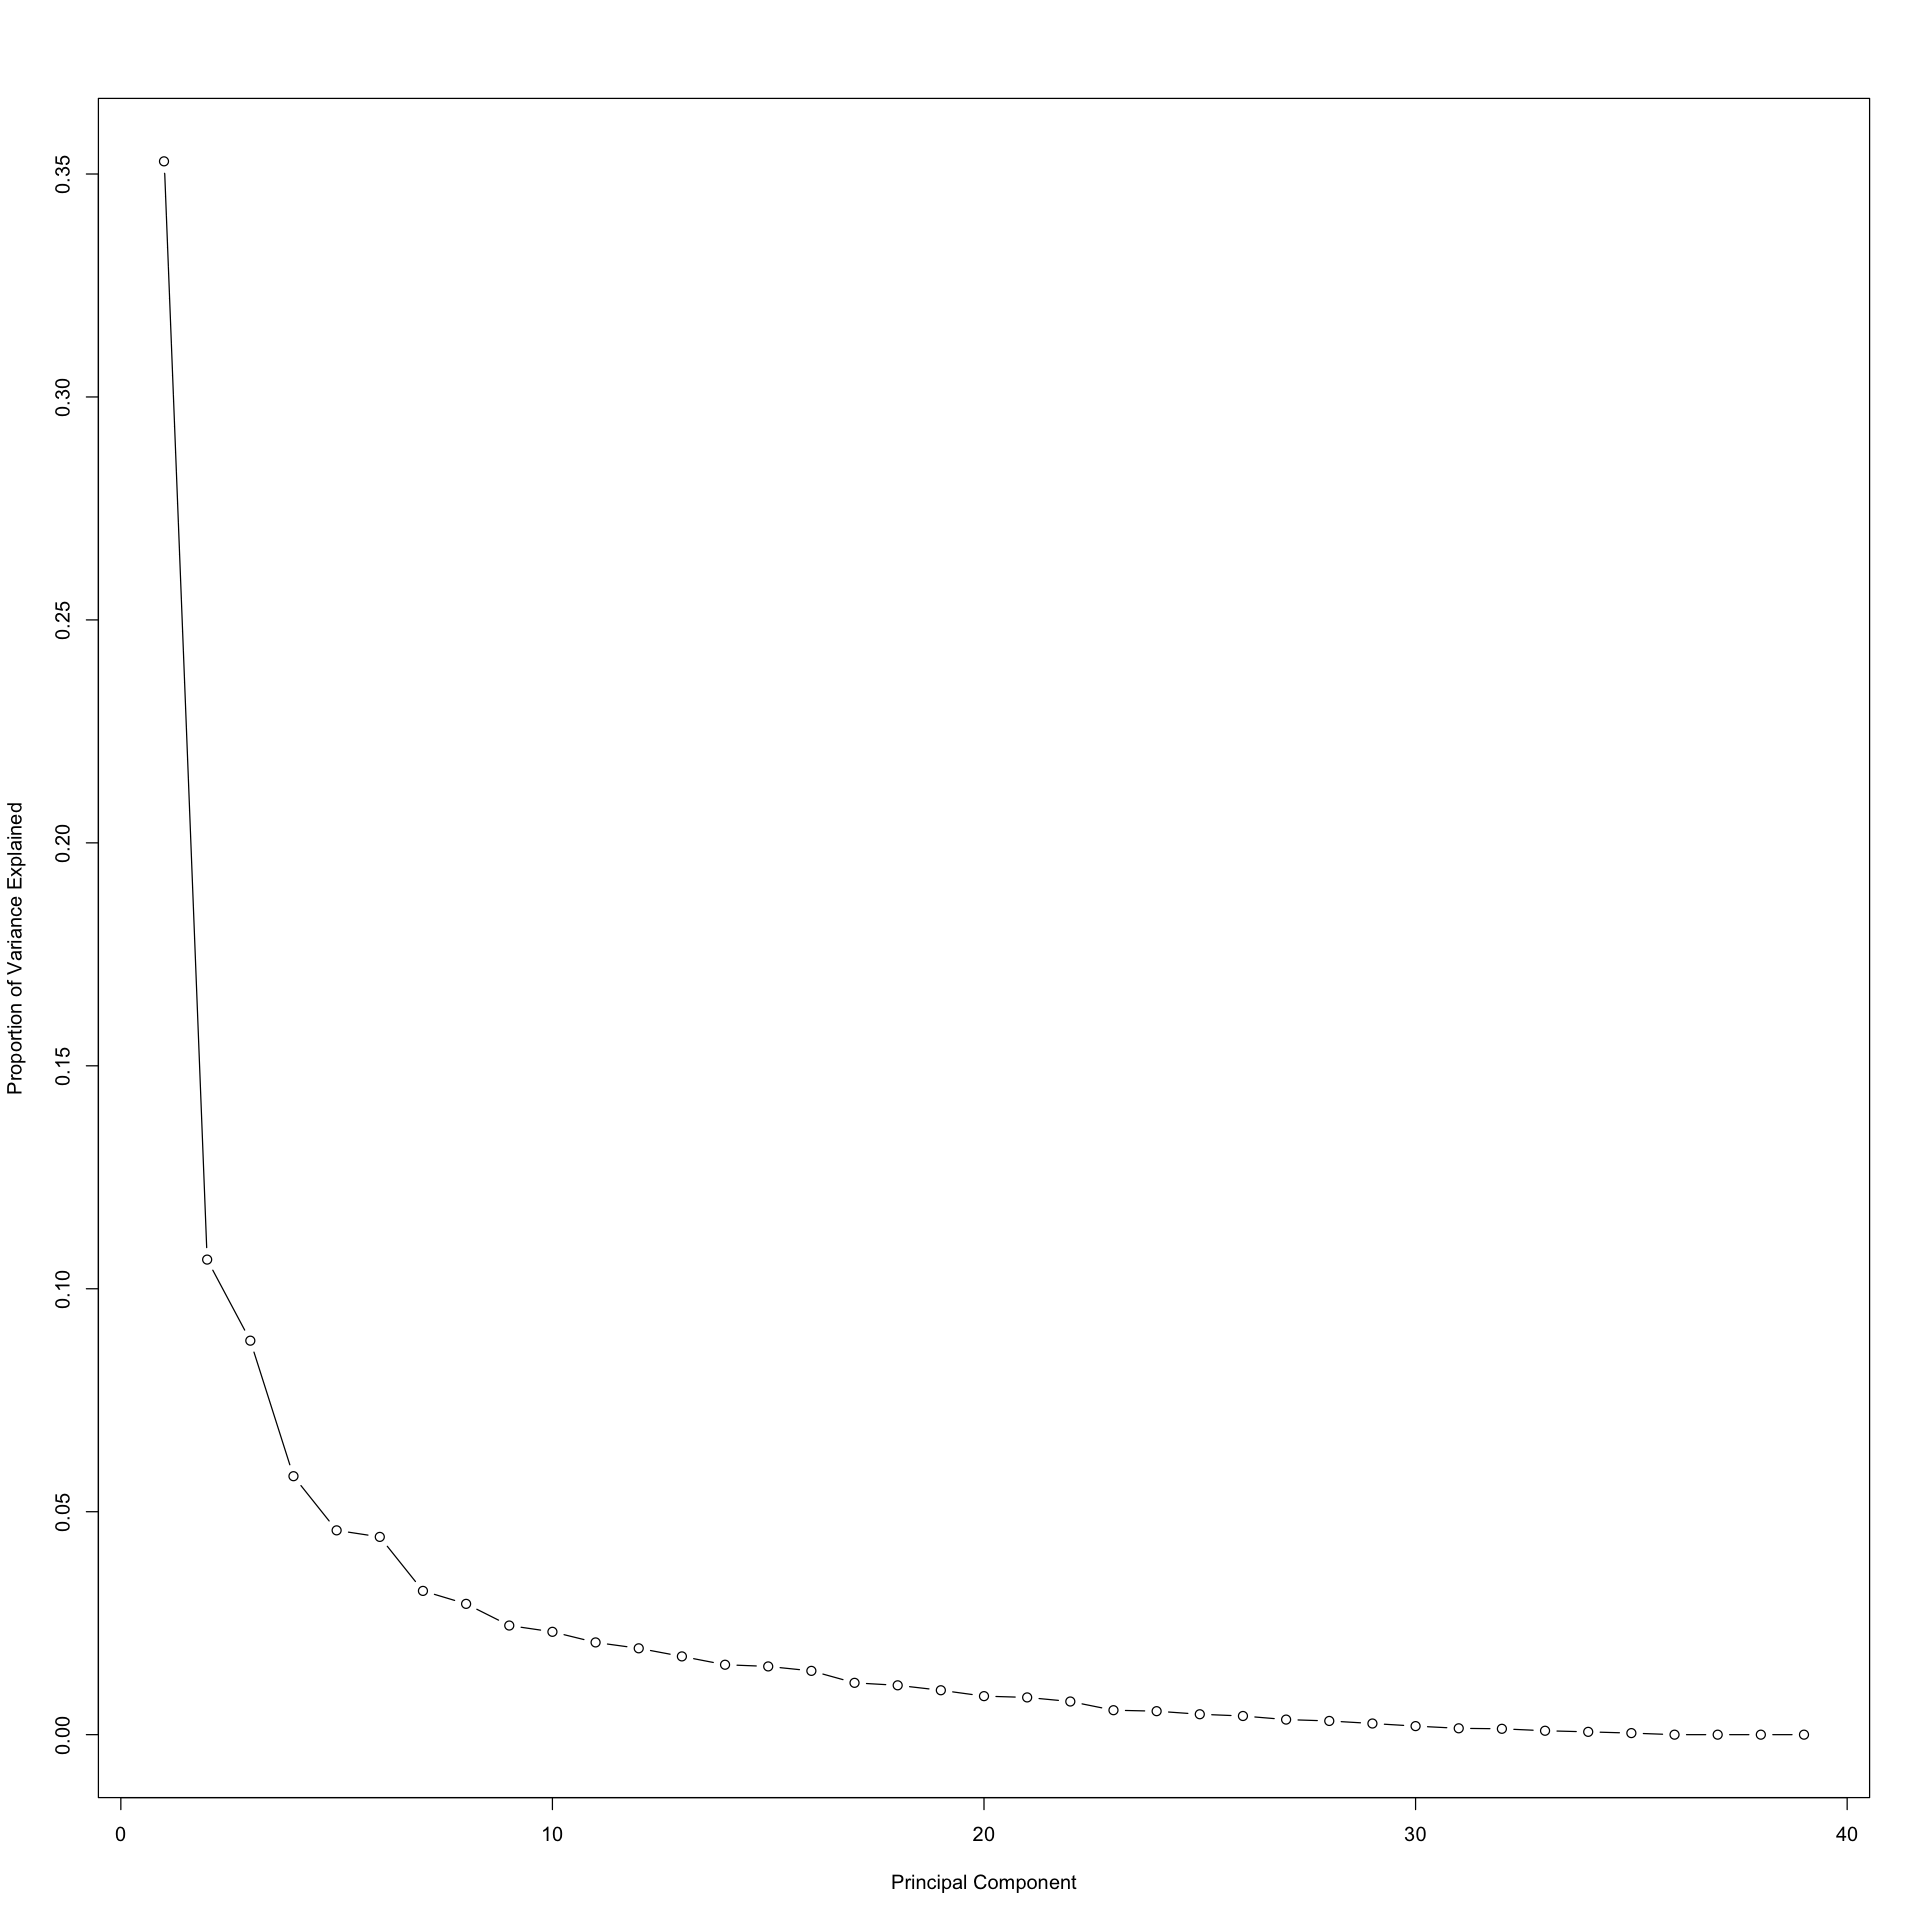

In [41]:
# Step 7: Determine the proportion of variance explained and create a scree plot
prop_var <- pca$sdev^2/sum(pca$sdev^2)
plot(prop_var, xlab = "Principal Component", ylab = "Proportion of Variance Explained", type = "b")


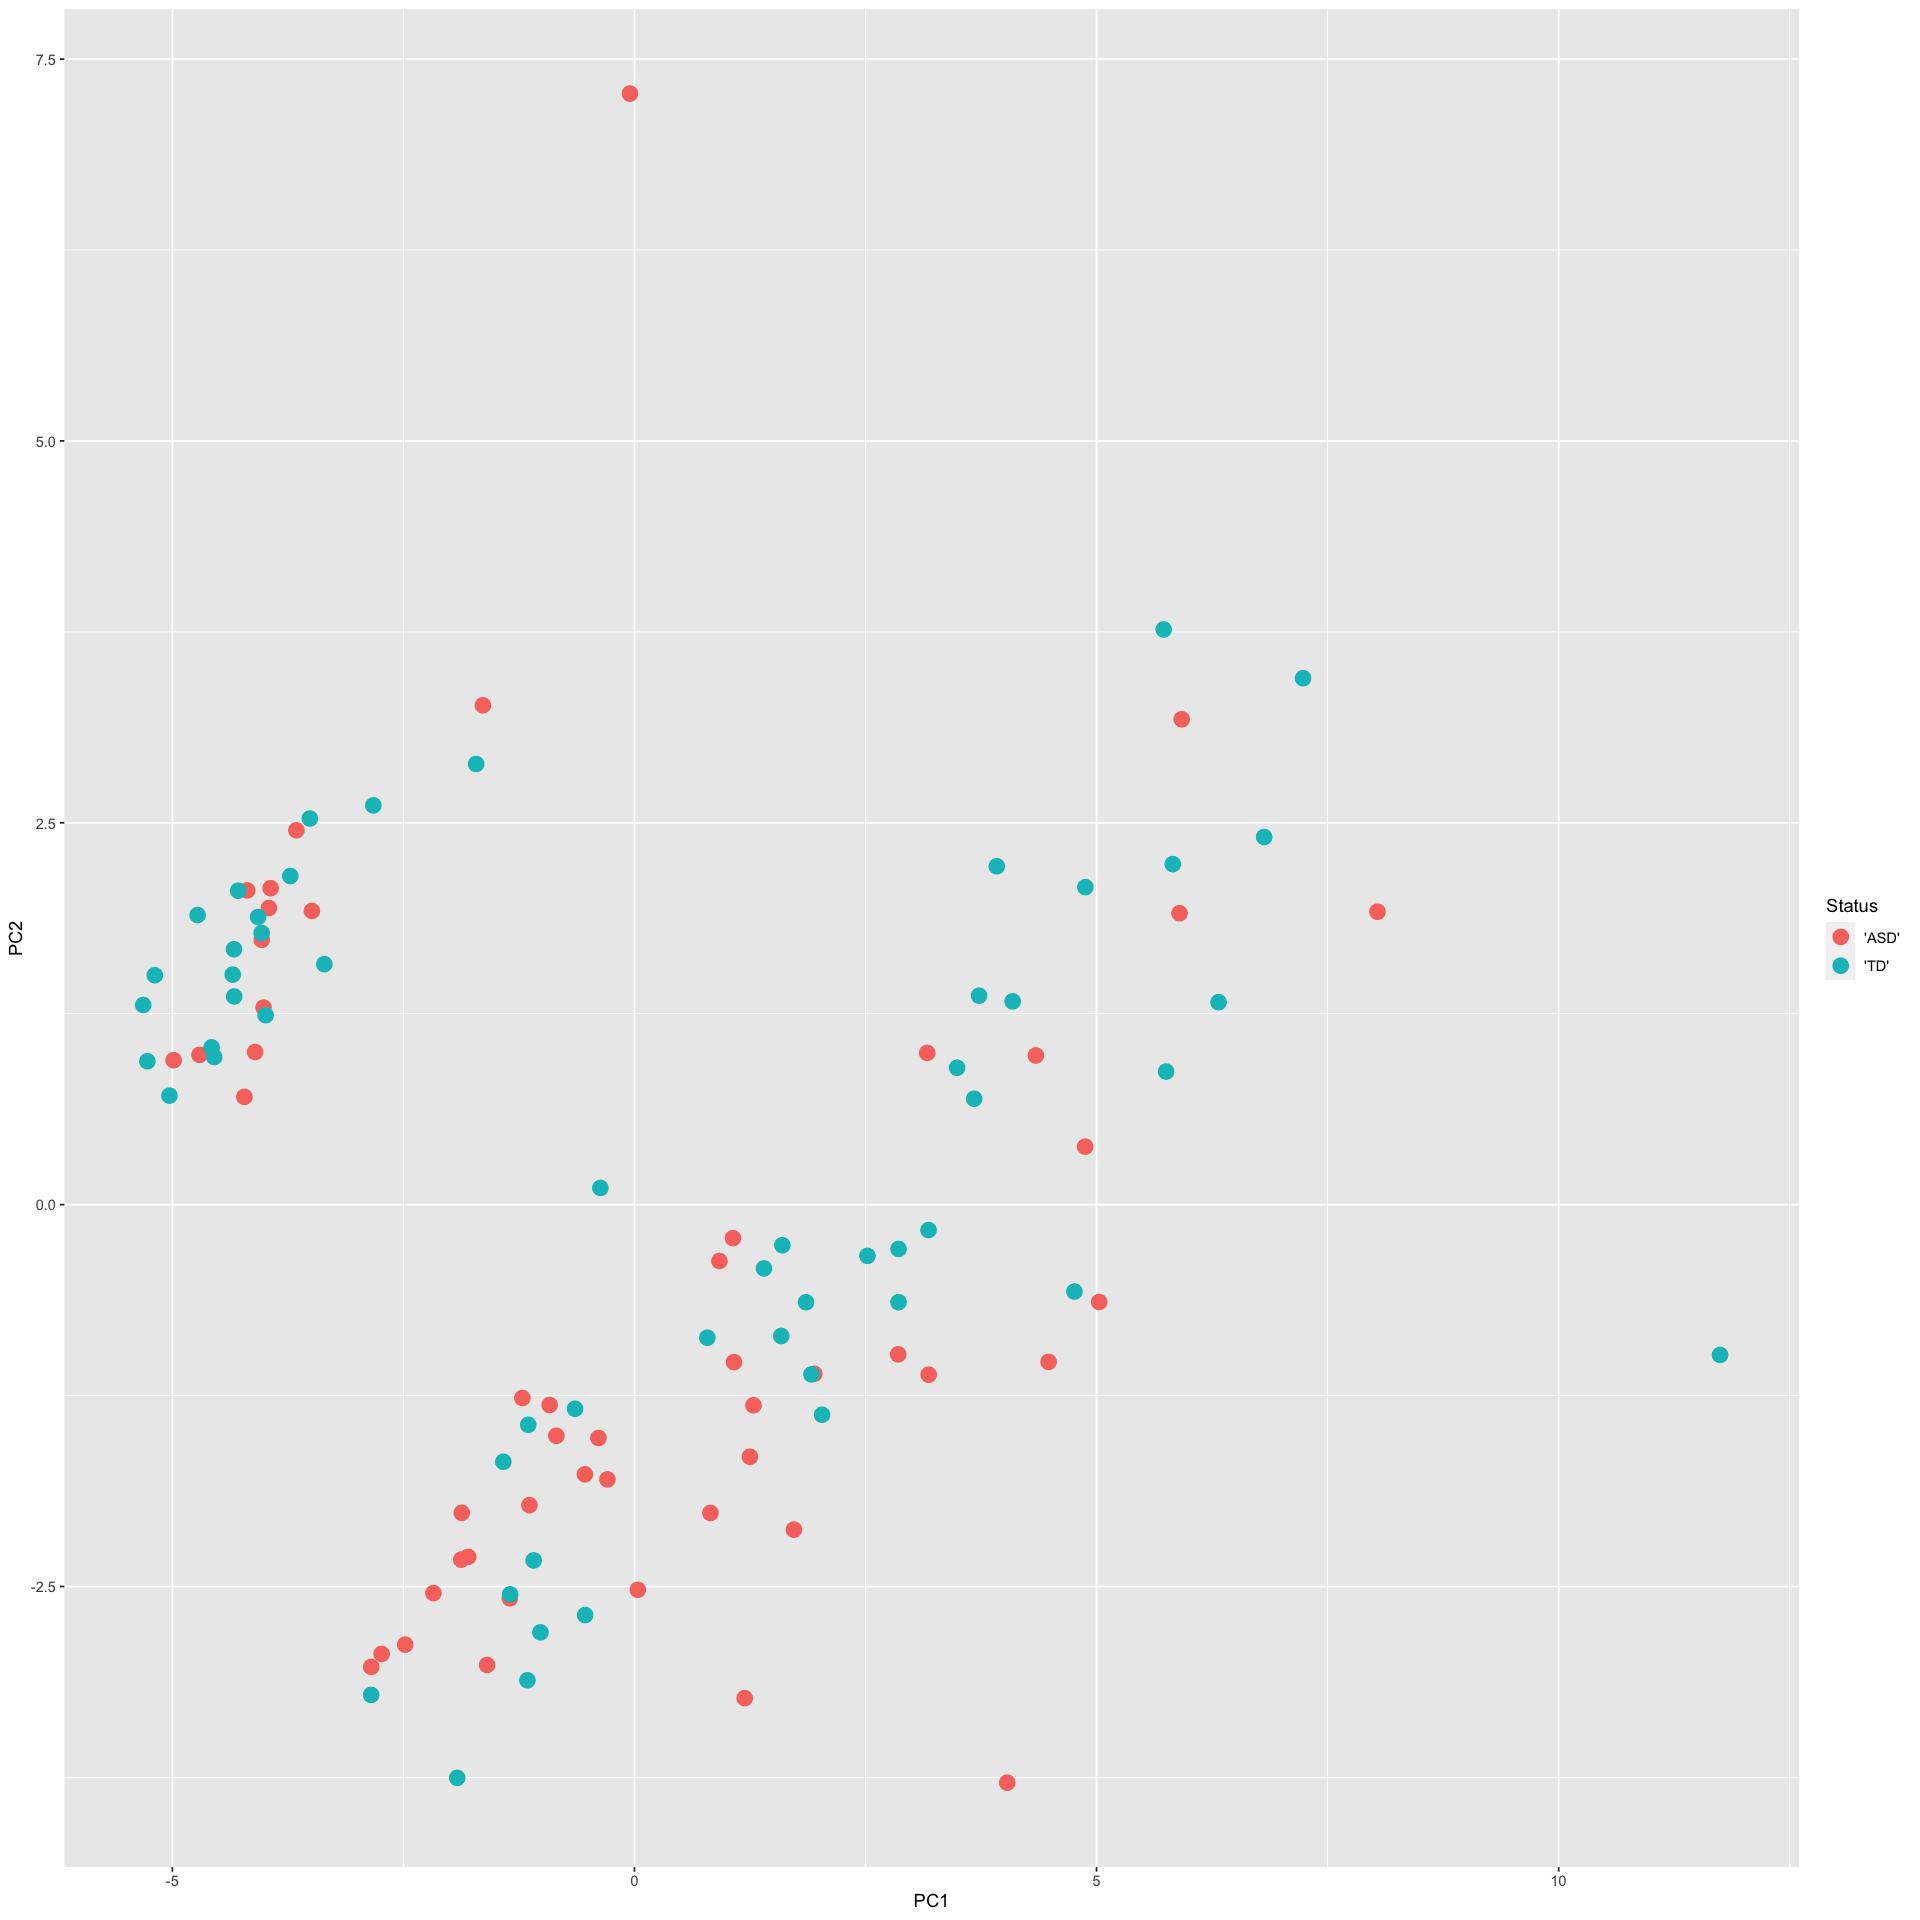

In [42]:
# Step 8: Plot the data in the first two principal components using ggplot2
pc_df <- data.frame(PC1 = pca$x[, 1], PC2 = pca$x[, 2], Status = data$Status)
ggplot(pc_df, aes(x = PC1, y = PC2, color = Status)) + geom_point(size = 4)

In [43]:
pca2

Call:
princomp(x = scaled_data)

Standard deviations:
      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
3.691858e+00 2.028704e+00 1.847483e+00 1.496373e+00 1.330404e+00 1.308913e+00 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.116009e+00 1.064505e+00 9.723360e-01 9.439109e-01 8.939344e-01 8.649143e-01 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
8.234242e-01 7.783572e-01 7.689025e-01 7.434444e-01 6.700808e-01 6.538682e-01 
     Comp.19      Comp.20      Comp.21      Comp.22      Comp.23      Comp.24 
6.202740e-01 5.777402e-01 5.680505e-01 5.359555e-01 4.603665e-01 4.511535e-01 
     Comp.25      Comp.26      Comp.27      Comp.28      Comp.29      Comp.30 
4.205990e-01 4.022281e-01 3.615193e-01 3.447298e-01 3.110549e-01 2.723020e-01 
     Comp.31      Comp.32      Comp.33      Comp.34      Comp.35      Comp.36 
2.347569e-01 2.254842e-01 1.842104e-01 1.562879e-01 1.166297e-01 2.003804e-08

In [44]:
summary(pca2)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     3.6918578 2.0287039 1.84748349 1.49637284 1.33040406
Proportion of Variance 0.3528428 0.1065439 0.08835934 0.05796569 0.04582036
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.30891331 1.11600862 1.06450511 0.97233597 0.94391086
Proportion of Variance 0.04435199 0.03224233 0.02933505 0.02447508 0.02306499
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.89393436 0.86491430 0.82342422 0.77835718 0.76890247
Proportion of Variance 0.02068724 0.01936589 0.01755249 0.01568373 0.01530502
                          Comp.16    Comp.17    Comp.18     Comp.19    Comp.20
Standard deviation     0.74344443 0.67008085 0.65386817 0.620273954 0.57774017
Proportion of Variance 0.01430831 0.01162374 0.01106807 0.009959979 0.00864085
                           Comp.21     Co

In Step 7, we plot a scree plot to determine the number of principal components to retain. In this plot, we can see how much variance is explained by each principal component. The scree plot should have a sharp drop-off after the first few components, indicating that most of the variance is explained by these components. In this case, we can see that the first few components explain a large proportion of the variance, so we might choose to retain these components.

In Step 8, we plot the data in the first two principal components using the ggplot2 package. This can help us to visualize any patterns or clusters in the data. In this case, we color the points based on the Status variable to see if there are any differences in the data based on this variable. We can see that there is some separation between the ASD and TD groups, which suggests that there may be differences in the underlying structure of the data based on the Status variable.

Finally, in Step 9, we interpret the results and draw conclusions based on our analysis. This may involve looking at the loadings of each principal component to see which variables are most strongly associated with each component, as well as examining any patterns or clusters in the data. We can use this information to better understand the structure of the data and make informed decisions about how to analyze it further.

Interpreting the results of a principal component analysis (PCA) involves examining the loadings of each principal component to see which variables are most strongly associated with each component, as well as examining any patterns or clusters in the data.

Loadings represent the correlation between each variable and the principal component. A high positive loading indicates that a variable is positively associated with the principal component, while a high negative loading indicates that a variable is negatively associated with the principal component. A low loading indicates that a variable is not strongly associated with the principal component.

To interpret the loadings, we can examine the variables with the highest and lowest loadings for each principal component. These variables can give us insight into the underlying structure of the data and help us to identify any underlying patterns or relationships.

In addition to examining the loadings, we can also visualize the data in the first two principal components to identify any patterns or clusters. This can help us to better understand the structure of the data and identify any subgroups or relationships.

Once we have a better understanding of the structure of the data, we can use this information to make informed decisions about how to analyze it further. For example, we may decide to use the principal components as new variables in a subsequent analysis, or we may use the information from the PCA to guide our choice of statistical methods.

In conclusion, interpreting the results of a PCA involves examining the loadings of each principal component and identifying any patterns or clusters in the data. This information can help us to better understand the underlying structure of the data and make informed decisions about how to analyze it further.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 22. Conduct feature selection after PCA<a class="anchor" id="PANR_page_22"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


One way to conduct feature selection after PCA is to look at the loadings of each principal component and select the variables that have the highest absolute loadings for the components that explain the most variance in the data. Another way is to use a statistical method such as a regularization method like Lasso or Ridge regression to select the most important features that contribute to the variance in the data.

To select features based on PCA loadings, you can use the following steps:

In [45]:
# let's use our pca2 for this
summary(pca2)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     3.6918578 2.0287039 1.84748349 1.49637284 1.33040406
Proportion of Variance 0.3528428 0.1065439 0.08835934 0.05796569 0.04582036
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.30891331 1.11600862 1.06450511 0.97233597 0.94391086
Proportion of Variance 0.04435199 0.03224233 0.02933505 0.02447508 0.02306499
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.89393436 0.86491430 0.82342422 0.77835718 0.76890247
Proportion of Variance 0.02068724 0.01936589 0.01755249 0.01568373 0.01530502
                          Comp.16    Comp.17    Comp.18     Comp.19    Comp.20
Standard deviation     0.74344443 0.67008085 0.65386817 0.620273954 0.57774017
Proportion of Variance 0.01430831 0.01162374 0.01106807 0.009959979 0.00864085
                           Comp.21     Co

To use a regularization method like Lasso or Ridge regression to select the most important features that contribute to the variance in the data from the PCA, you can use the glmnet package in R. 
















In [46]:
# Load the required library
install.packages("glmnet")
library(glmnet)


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpiqLSGb/downloaded_packages


In [47]:
# Get the loadings matrix
loadings <- abs(pca2$loadings)

In [48]:
loadings


Loadings:
           Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Aluminum   0.157         0.185  0.119  0.101  0.259         0.148  0.351 
Antimony   0.134         0.174                0.205  0.231  0.331  0.134 
           Comp.10 Comp.11 Comp.12 Comp.13 Comp.14 Comp.15 Comp.16 Comp.17
Aluminum                   0.103   0.126           0.208   0.302   0.123  
Antimony   0.332   0.175   0.205           0.195           0.245   0.159  
           Comp.18 Comp.19 Comp.20 Comp.21 Comp.22 Comp.23 Comp.24 Comp.25
Aluminum           0.142   0.362                   0.254   0.301          
Antimony   0.332                   0.279           0.147           0.284  
           Comp.26 Comp.27 Comp.28 Comp.29 Comp.30 Comp.31 Comp.32 Comp.33
Aluminum   0.236   0.282                           0.161                  
Antimony           0.136                   0.143           0.124   0.189  
           Comp.34 Comp.35 Comp.36 Comp.37 Comp.38 Comp.39
Aluminum   0.134                 

In [49]:
# Sum the absolute values of the loadings for each variable
variable_importance <- apply(loadings, 1, sum)


In [50]:
# Sort the variables by importance
variable_order <- order(variable_importance, decreasing = TRUE)

In [51]:
# Select the top n variables based on importance (unsure how ID Number got back into the PCA)
n <- 10
selected_variables <- colnames(data)[variable_order[1:n]]
selected_variables

[1] "Phosphorus" "Status"     "Copper"     "Beryllium"  "Lithium"   
 [6] "Sodium"     "ID Number"  "Calcium"    "Cobalt"     "Uranium"

In [52]:
# Get the loadings matrix
loadings2 <- pca2$loadings

# Select the top 5 variables for PC1 and PC2
top_vars_pc1 <- names(sort(abs(loadings2[, 1]), decreasing = TRUE)[1:5])
top_vars_pc2 <- names(sort(abs(loadings2[, 2]), decreasing = TRUE)[1:5])

# Print the top variables for PC1 and PC2
cat("Top variables for PC1:", paste(top_vars_pc1, collapse = ", "), "\n")
cat("Top variables for PC2:", paste(top_vars_pc2, collapse = ", "))


Top variables for PC1: Cesium, Selenium, Creatinine, Magnesium, Sulfur 
Top variables for PC2: Beryllium, Thorium, Palladium, Platinum, Tellurium

To select features by importance in PCA, you can use the loadings matrix generated by the PCA. The loadings matrix shows the correlations between the original variables and the principal components. The larger the absolute value of the loading, the greater the contribution of that variable to that principal component.

To select the most important features, you can choose the variables with the largest absolute loadings for the principal components with the highest variance. One common method is to select the top k variables with the largest absolute loadings for the top n principal components that explain a significant amount of variance.

Here's an example code that selects the top 3 variables with the largest absolute loadings for the top 2 principal components that explain at least 80% of the variance:

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 23. Group Comparison using MANOVA after PCA<a class="anchor" id="PANR_page_23"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


After conducting a PCA on the data, we may be interested in comparing groups based on the principal components. One way to do this is to use a multivariate analysis of variance (MANOVA), which allows us to test for differences in the mean scores of multiple dependent variables (in this case, the principal components) across multiple groups.

Here are the steps to conduct a MANOVA on the principal components:

0. Remove extra quotes from the Status and Type column
1. Extract the relevant principal components from the PCA output.
2. Create a new dataset that includes the principal components and the grouping variable.
3. Run a MANOVA using the manova() function.
4. Examine the output to see if there are any significant differences between the groups.

Here is some R code that performs these steps:

In [53]:
# Remove the extra quotes from the Status column
data$Status <- gsub("'", "", data$Status)

# Remove the extra quotes from the Type column
data$Type <- gsub("'", "", data$Type)

# Check the updated data
head(data)

ID Number,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASD,Child,7.0,2.000000e-01,11.0,2.1,0.0007071068,1.131371e-04,1.414214e-04,4.3,9.899495e-05,0.2,0.0004242641,4.9,0.0008485281,1.131371e-04,0.0005656854,0.1,4.242641e-05,1.6,0.3,7.071068e-05,2.3,140,0.0004242641,0.0011313708,0.014,0.24000000,0.083,200,7e-04,0.130,1180,24,0.110,56,0.13,680,0.0002828427,0.66,175.0
3,ASD,Child,19.0,2.000000e-01,8.1,8.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,1.0,0.0002121320,2.9,0.0004242641,5.656854e-05,0.0002828427,0.6,2.121320e-05,1.0,0.2,3.535534e-05,4.9,81,0.0002121320,0.0005656854,0.018,0.20000000,0.170,170,5e-03,0.180,360,120,0.094,290,0.17,860,0.0005000000,0.48,76.0
5,ASD,Child,9.2,5.656854e-05,5.9,4.7,0.0003535534,2.000000e-01,7.071068e-05,11.0,4.949747e-05,0.5,0.0002121320,9.4,0.0004242641,5.656854e-05,0.0002828427,0.3,2.121320e-05,8.4,0.6,3.535534e-05,2.9,300,0.0006000000,0.0030000000,0.021,0.60000000,0.170,310,4e-03,0.170,1860,120,0.110,240,0.37,1050,0.0006000000,0.75,58.6
6,ASD,Child,8.4,5.656854e-05,14.0,3.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,0.9,0.0002121320,15.0,0.0004242641,5.656854e-05,0.0002828427,0.4,2.121320e-05,1.4,0.3,3.535534e-05,8.6,200,0.0010000000,0.0005656854,0.024,0.43000000,0.061,390,5e-03,0.043,150,120,0.069,190,0.33,630,0.0004000000,0.24,54.3
8,ASD,Child,5.6,2.828427e-05,11.0,3.8,0.0001767767,2.828427e-05,3.535534e-05,4.5,2.474874e-05,0.4,1.0000000000,2.5,0.0002121320,2.828427e-05,0.0001414214,0.4,1.060660e-05,0.6,0.3,1.767767e-05,1.3,62,0.0010000000,0.0002828427,0.022,0.03535534,0.220,170,7e-03,0.085,910,180,0.140,190,0.12,1290,0.0008000000,0.27,30.6
10,ASD,Child,17.0,6.000000e-01,15.0,3.1,0.0003535534,5.656854e-05,7.071068e-05,10.0,4.949747e-05,0.5,0.0002121320,5.2,0.0004242641,5.656854e-05,0.0002828427,0.2,2.121320e-05,0.5,0.1,3.535534e-05,4.5,250,0.0010000000,0.0005656854,0.019,0.53000000,0.120,180,2e-03,0.110,1200,54,0.180,330,0.24,800,0.0005000000,1.10,70.6


In [54]:
# Step 1: Extract the principal components
pcs <- pca$x[, 1:2] # example using the first two components

In [55]:
# Step 2: Create a new dataset
pc_data <- data.frame(pcs, Status = data$Status)

In [56]:
# Step 3: Run a MANOVA
manova_output <- manova(pcs ~ Status, data = pc_data)

In [57]:
# Step 4: Examine the output
summary(manova_output)

           Df   Pillai approx F num Df den Df Pr(>F)
Status      1 0.040309   2.1421      2    102 0.1227
Residuals 103                                       

In Step 1, we extract the first two principal components from the PCA output. These components will be used as the dependent variables in the MANOVA.

In Step 2, we create a new data.frame that includes the principal components and the grouping variable (Status in this case). We use the data.frame() function to convert the matrix of principal components to a data.frame.

In Step 3, we run the manova() function on the new data.frame, specifying the principal components as the dependent variables and the grouping variable as the independent variable.

In Step 4, we examine the output of the MANOVA to see if there are any significant differences between the groups. The output includes the Wilks' lambda statistic, which tests whether there are significant differences between the groups, as well as the F-statistic and p-value for the overall MANOVA.

The MANOVA summary output you provided contains the results of a test for differences in the mean scores of the principal components across groups. Specifically, the output shows the results of a MANOVA with one independent variable (Status) and two dependent variables (the first two principal components).

How to interpret the output:

- The Df column shows the degrees of freedom for the independent variable (Status) and the residuals.
- The Pillai column shows the Pillai's trace statistic, which is a multivariate test statistic that measures the overall effect of the independent variable on the dependent variables. In this case, the Pillai's trace statistic is 0.040309.
- The approx F column shows the approximate F-statistic for the independent variable. This is the ratio of the Pillai's trace statistic to its degrees of freedom. In this case, the approximate F-statistic is 2.1421.
- The num Df and den Df columns show the numerator and denominator degrees of freedom for the F-statistic, respectively. In this case, there are 2 numerator degrees of freedom (corresponding to the two principal components) and 102 denominator degrees of freedom (corresponding to the number of observations minus the number of groups).
- The Pr(>F) column shows the p-value for the F-statistic, which tests whether there are significant differences in the mean scores of the principal components across groups. In this case, the p-value is 0.1227, which is greater than 0.05 (the typical threshold for statistical significance).

Based on this output, we can conclude that there is no significant difference in the mean scores of the first two principal components across the groups (ASD, TD, Mother). The p-value of 0.1227 is greater than the typical threshold for statistical significance (0.05), indicating that we do not have sufficient evidence to reject the null hypothesis of no difference.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 24. Group Comparison using ttest after PCA<a class="anchor" id="PANR_page_24"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [58]:
# Count the number of observations in each group
table(data$Status)


ASD  TD 
 50  55 

In [59]:
# Extract the first principal component (PC1)
PC1 <- pca$x[, 1]

In [60]:
# Subset the data for the ASD and TD groups
ASD <- PC1[data$Status == "ASD"]
TD <- PC1[data$Status == "TD"]

In [61]:
# Check that both groups have at least one observation
if (length(ASD) < 1 | length(TD) < 1) {
  stop("Not enough observations in one or both groups")
}

In [62]:
# Perform a t-test
ttest_output <- t.test(ASD, TD)

In [63]:
# Examine the output
summary(ttest_output)

            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

In [64]:
ttest_output


	Welch Two Sample t-test

data:  ASD and TD
t = -0.41849, df = 101.14, p-value = 0.6765
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.729037  1.126595
sample estimates:
 mean of x  mean of y 
-0.1577822  0.1434384 


The t-test results show that a Welch Two Sample t-test was performed to compare the means of the ASD and TD groups.

The t value represents the calculated t-statistic for the test, which in this case is -0.41849. The df value represents the degrees of freedom for the test, which is calculated using a Welch-Satterthwaite approximation due to unequal variances between the groups. In this case, the df value is 101.14.

The p-value is the probability of obtaining a t-statistic as extreme as the one observed under the null hypothesis that the means of the two groups are equal. In this case, the p-value is 0.6765, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in means between the ASD and TD groups.

The alternative hypothesis is that the true difference in means between the two groups is not equal to zero, which is a two-tailed test. The 95 percent confidence interval represents the range of values within which we can be 95% confident that the true difference in means lies. In this case, the confidence interval ranges from -1.729037 to 1.126595, which includes zero, further supporting the conclusion that there is no significant difference in means between the two groups.

The sample estimates represent the means of the ASD and TD groups, which are -0.1577822 and 0.1434384, respectively.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 25. Group Comparison using ANOVA after PCA<a class="anchor" id="PANR_page_25"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Group comparison using a ANOVA:
statistical tests such as t-tests or ANOVA can be used to compare the mean levels of different elements between different groups (ASD vs TD, children vs mothers). This can help identify the elements that are significantly different between the groups.

To conduct a group comparison using ANOVA after PCA, we can use the principal component scores as the dependent variable and the grouping variable as the independent variable.

In [65]:
# Conduct an ANOVA on the principal component scores
anova_output <- aov(pcs ~ Status, data = pc_data)

# View the ANOVA results
summary(anova_output)

 Response PC1 :
             Df  Sum Sq Mean Sq F value Pr(>F)
Status        1    2.38  2.3764  0.1713 0.6798
Residuals   103 1428.75 13.8714               

 Response PC2 :
             Df Sum Sq Mean Sq F value  Pr(>F)  
Status        1  16.70 16.7017  4.1409 0.04443 *
Residuals   103 415.44  4.0334                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The ANOVA results are reporting the effect of the Status variable (ASD vs TD) on the two principal components PC1 and PC2 of the autism data.

For PC1, the ANOVA table shows that the F-statistic is 0.1713 with a p-value of 0.6798. The F-statistic tests the null hypothesis that there is no difference in the mean principal component scores between the ASD and TD groups, while the p-value indicates the probability of obtaining such an F-statistic assuming that the null hypothesis is true. In this case, the p-value is not significant (greater than 0.05), indicating that there is no significant difference in the mean PC1 scores between the two groups.

For PC2, the ANOVA table shows that the F-statistic is 4.1409 with a p-value of 0.04443, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis that there is no difference in the mean principal component scores between the two groups for PC2. The Status variable has a significant effect on PC2.

Overall, these results suggest that the two groups (ASD vs TD) differ significantly in their PC2 scores, but not in their PC1 scores. The significant effect of Status on PC2 may indicate that this component is capturing some meaningful variation in the data related to the diagnostic status of the subjects.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 26. Group Comparison using ANOVA for Aluminum, Lead, Arsenic<a class="anchor" id="PANR_page_26"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [66]:
str(data)

tibble [105 × 42] (S3: tbl_df/tbl/data.frame)
 $ ID Number : num [1:105] 1 3 5 6 8 10 12 17 19 20 ...
 $ Status    : chr [1:105] "ASD" "ASD" "ASD" "ASD" ...
 $ Type      : chr [1:105] "Child" "Child" "Child" "Child" ...
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 0.000212 1 ...
 

In [67]:
head(data)

ID Number,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASD,Child,7.0,2.000000e-01,11.0,2.1,0.0007071068,1.131371e-04,1.414214e-04,4.3,9.899495e-05,0.2,0.0004242641,4.9,0.0008485281,1.131371e-04,0.0005656854,0.1,4.242641e-05,1.6,0.3,7.071068e-05,2.3,140,0.0004242641,0.0011313708,0.014,0.24000000,0.083,200,7e-04,0.130,1180,24,0.110,56,0.13,680,0.0002828427,0.66,175.0
3,ASD,Child,19.0,2.000000e-01,8.1,8.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,1.0,0.0002121320,2.9,0.0004242641,5.656854e-05,0.0002828427,0.6,2.121320e-05,1.0,0.2,3.535534e-05,4.9,81,0.0002121320,0.0005656854,0.018,0.20000000,0.170,170,5e-03,0.180,360,120,0.094,290,0.17,860,0.0005000000,0.48,76.0
5,ASD,Child,9.2,5.656854e-05,5.9,4.7,0.0003535534,2.000000e-01,7.071068e-05,11.0,4.949747e-05,0.5,0.0002121320,9.4,0.0004242641,5.656854e-05,0.0002828427,0.3,2.121320e-05,8.4,0.6,3.535534e-05,2.9,300,0.0006000000,0.0030000000,0.021,0.60000000,0.170,310,4e-03,0.170,1860,120,0.110,240,0.37,1050,0.0006000000,0.75,58.6
6,ASD,Child,8.4,5.656854e-05,14.0,3.0,0.0003535534,5.656854e-05,7.071068e-05,16.0,4.949747e-05,0.9,0.0002121320,15.0,0.0004242641,5.656854e-05,0.0002828427,0.4,2.121320e-05,1.4,0.3,3.535534e-05,8.6,200,0.0010000000,0.0005656854,0.024,0.43000000,0.061,390,5e-03,0.043,150,120,0.069,190,0.33,630,0.0004000000,0.24,54.3
8,ASD,Child,5.6,2.828427e-05,11.0,3.8,0.0001767767,2.828427e-05,3.535534e-05,4.5,2.474874e-05,0.4,1.0000000000,2.5,0.0002121320,2.828427e-05,0.0001414214,0.4,1.060660e-05,0.6,0.3,1.767767e-05,1.3,62,0.0010000000,0.0002828427,0.022,0.03535534,0.220,170,7e-03,0.085,910,180,0.140,190,0.12,1290,0.0008000000,0.27,30.6
10,ASD,Child,17.0,6.000000e-01,15.0,3.1,0.0003535534,5.656854e-05,7.071068e-05,10.0,4.949747e-05,0.5,0.0002121320,5.2,0.0004242641,5.656854e-05,0.0002828427,0.2,2.121320e-05,0.5,0.1,3.535534e-05,4.5,250,0.0010000000,0.0005656854,0.019,0.53000000,0.120,180,2e-03,0.110,1200,54,0.180,330,0.24,800,0.0005000000,1.10,70.6


In [68]:
names(data)

[1] "ID Number"  "Status"     "Type"       "Aluminum"   "Antimony"  
 [6] "Arsenic"    "Barium"     "Beryllium"  "Bismuth"    "Cadmium"   
[11] "Cesium"     "Gadolinium" "Lead"       "Mercury"    "Nickel"    
[16] "Palladium"  "Platinum"   "Tellurium"  "Thallium"   "Thorium"   
[21] "Tin"        "Tungsten"   "Uranium"    "Boron"      "Calcium"   
[26] "Chromium"   "Cobalt"     "Copper"     "Iron"       "Lithium"   
[31] "Magnesium"  "Manganese"  "Molybdenum" "Phosphorus" "Potassium" 
[36] "Selenium"   "Sodium"     "Strontium"  "Sulfur"     "Vanadium"  
[41] "Zinc"       "Creatinine"

One interesting ANOVA that can be performed on this dataset is to compare the mean heavy metal concentrations between ASD and TD children. We can subset the data to include only the heavy metals and the status column, and then perform a one-way ANOVA with the status column as the grouping variable for each heavy metal separately. For example, to compare the mean Aluminum concentration between ASD and TD children, we can use the following code:

In [69]:
# Subset the data to include only the heavy metals and status columns
heavy_metals_data <- data[, c("Status", "Aluminum", "Antimony", "Arsenic", "Barium", "Beryllium", "Bismuth", "Cadmium", "Cesium", "Gadolinium", "Lead", "Mercury", "Nickel", "Palladium", "Platinum", "Tellurium", "Thallium", "Thorium", "Tin", "Tungsten", "Uranium", "Boron", "Calcium", "Chromium", "Cobalt", "Copper", "Iron", "Lithium", "Magnesium", "Manganese", "Molybdenum", "Phosphorus", "Potassium", "Selenium", "Sodium", "Strontium", "Sulfur", "Vanadium", "Zinc")]

# Perform ANOVA for Aluminum
summary(aov(Aluminum ~ Status, data = heavy_metals_data))


             Df Sum Sq Mean Sq F value Pr(>F)
Status        1     21   20.78   0.142  0.707
Residuals   103  15044  146.06               

The ANOVA results suggest that there is no significant difference in the levels of heavy metals between the two groups based on the 'Status' variable. This is evidenced by the F value of 0.142 and a high p-value of 0.707, which indicates that the null hypothesis of no difference in means between the two groups cannot be rejected. The 'Residuals' row shows the remaining variability in the data that is not explained by the 'Status' variable.

In [70]:
# Perform ANOVA for Lead
summary(aov(Lead ~ Status, data = heavy_metals_data))

             Df Sum Sq Mean Sq F value Pr(>F)
Status        1   0.02 0.02005   0.122  0.728
Residuals   103  16.93 0.16438               

The ANOVA results for Lead indicate that there is no significant difference in Lead levels between the two groups (ASD and TD), as the p-value is greater than 0.05 (p=0.728). The mean square error (MSE) between groups is very small (0.02), and the majority of the variation (16.93) is within groups. Therefore, we can conclude that there is no significant difference in Lead levels between the ASD and TD groups.

In [71]:
# Perform ANOVA for Arsenic
summary(aov(Arsenic ~ Status, data = heavy_metals_data))

             Df Sum Sq Mean Sq F value Pr(>F)
Status        1      7    7.19   0.026  0.873
Residuals   103  28942  280.99               

For the Arsenic heavy metal, the ANOVA results show that there is no significant difference between the two groups (ASD and TD) with regard to their Arsenic levels, as indicated by the high p-value of 0.873. The F value is 0.026, which is much lower than the threshold for statistical significance, indicating that the differences observed are most likely due to chance.

The result of a clustering analysis, with three clusters represented by the three rows of data. Each column represents a different feature used in the clustering analysis. The Group.1 column is the index column indicating the cluster number. The values in each of the other columns represent the mean value of that feature within that cluster. For example, the first cluster (Group.1 = 1) has a mean value of 12.22747 for the Arsenic feature, while the second cluster (Group.1 = 2) has a mean value of 19.91383 for the same feature. 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# 27. Fisher's Discriminant Analysis and Support Vector Machines (SVM) - under construction<a class="anchor" id="PANR_page_27"></a>

[Back to Top](#PANR_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


To run Fisher's Discriminant Analysis and Support Vector Machines (SVM) in R on the autism dataset for Status and Type, we first need to prepare the data. We will need to convert the categorical variables "Status" and "Type" to numeric variables, as most machine learning algorithms require numeric data.

In [83]:
install.packages("MASS")
library(MASS)


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpiqLSGb/downloaded_packages


In [84]:

# Extract the scores from the PCA
scores <- pca$x[, 1:2]

In [85]:
nrow(pca$x)

[1] 105

In [86]:
nrow(data)

[1] 105

In [87]:
# Combine the scores with the response variable
data_lda <- data.frame(scores, response = data$Status)

In [88]:
# Perform FDA on the new data set
model_lda <- lda(response ~ ., data = data_lda)

In [89]:
# Evaluate the performance of the FDA model needs library(boot)
cv_lda <- cv.glm(data_lda, model_lda)

ERROR: Error in y - yhat: non-numeric argument to binary operator


In [90]:




# Print the cross-validation results
print(cv_lda)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': object 'cv_lda' not found
